## Libraries

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# For downloading and unzipping files
import urllib.request
import zipfile

# Create wrapper for StandardScaler
import typing

# Preprocessing
from sklearn.preprocessing import (
    LabelEncoder, 
    LabelBinarizer, 
    StandardScaler, 
    PolynomialFeatures
)
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import make_pipeline

# Models
from sklearn.linear_model import (
    LinearRegression,
    HuberRegressor,
    ElasticNet
)
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

# Set viewing limits
pd.set_option('display.max_rows', 110)
pd.set_option('display.max_columns', 110)

In [293]:
# !pip install sklearn_pandas

## Load data

In [3]:
# Load Green, Hand and Zhang (2017)'s SAS output
df_ghz = pd.read_csv("../data/GHZ_variables.csv")
df_ghz = df_ghz.reindex(sorted(df_ghz.columns), axis=1)
df_ghz

DATE  DLRET  DLSTCD  EXCHCD       RET  SHRCD  SHROUT         VOL  \
0        19720831    0.0     NaN       1  0.074380     10    1983       574.0   
1        19720831    0.0     NaN       1 -0.034009     11  154803     11351.0   
2        19720831    0.0     NaN       1 -0.009259     11   55986      3205.0   
3        19720831    0.0     NaN       1  0.057065     10   43672      5099.0   
4        19720831    0.0     NaN       1 -0.006818     10    9122       821.0   
...           ...    ...     ...     ...       ...    ...     ...         ...   
2484660  20201231    0.0   100.0       1  0.484472     11  242936   1707010.0   
2484661  20201231    0.0   100.0       1  0.109665     11   84977    341364.0   
2484662  20201231    0.0   100.0       1  0.076239     11   12552     12527.0   
2484663  20201231    0.0   100.0       3  0.122605     11   33482     21454.0   
2484664  20201231    0.0   100.0       3  0.243252     11  947901  11962716.0   

           absacc       acc  age       agr        bm     bm_ia  cashdebt  \
0             NaN       NaN    1       NaN  1.061653  0.482684  0.102208   
1             NaN       NaN    1       NaN  0.261613 -0.496146  0.306861   
2             NaN       NaN    1       NaN  0.258098 -0.499662  0.227341   
3             NaN       NaN    1       NaN  0.352464 -0.405295  0.159162   
4             NaN       NaN    1       NaN  0.623878 -0.133881  0.001132   
...           ...       ...  ...       ...       ...       ...       ...   
2484660  0.114561 -0.114561   10 -0.104613  2.487356 -1.381433  0.143174   
2484661  0.085746 -0.085746   37  0.145079 -0.187572 -0.134085  0.104231   
2484662  0.025098 -0.025098   10  0.134903  0.524944  0.287644  0.287272   
2484663  0.215401 -0.215401   10  0.062402  1.138777 -0.161772 -0.101122   
2484664  0.102016 -0.102016   10  0.153646  0.087404 -0.524859  0.050176   

            cashpr        cf       cfp    cfp_ia     chadv     chato  \
0       -11.278408       NaN -0.603533 -1.039648       NaN       NaN   
1        39.841745       NaN -0.218092  0.249543       NaN       NaN   
2        38.345684       NaN       NaN       NaN       NaN       NaN   
3        18.895218       NaN       NaN       NaN       NaN       NaN   
4         6.161076       NaN       NaN       NaN       NaN       NaN   
...            ...       ...       ...       ...       ...       ...   
2484660 -14.117559  0.097778  0.529986  0.964371       NaN -0.078000   
2484661  19.464647  0.152068  0.107541  0.030480  0.015726 -0.040350   
2484662   1.095352  0.088784  0.067275  0.127228       NaN -0.132276   
2484663 -13.505851  0.149903  0.242402  0.213002       NaN  0.269443   
2484664   8.295322  0.075099  0.031763 -0.046733 -0.930475  0.032441   

          chatoia    chcsho     chdrc   chempia     chinv   chobklg      chpm  \
0             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...           ...       ...       ...       ...       ...       ...       ...   
2484660 -0.070414  0.004225  0.000000 -0.481433       NaN       NaN  0.442773   
2484661 -0.068178  0.008004 -0.000810 -5.337869  0.001545  0.000000 -0.067577   
2484662 -0.093564  0.003637 -0.002202 -0.093379  0.013358 -0.007176 -0.000736   
2484663  0.225279  0.367046  0.062246  0.415898  0.076563       NaN -0.011075   
2484664  0.142861  0.048649  0.023383 -0.048550  0.013694       NaN  0.010410   

           chpmia      conv  convind  credrat  credrat_dwn    currat  \
0             NaN  0.209646        1      NaN            0  2.842788   
1             NaN  0.000000        0      NaN            0  1.579156   
2             NaN  0.130628        1      NaN            0  1.599795   
3

This data set is generated from the SAS code provided by Jeremiah Green. Updated his code to take in variables from `1975 through 2015` to `1972 through 2020`. We will not be using this data set in the modeling stage, as this was already performed by Gu, Kelly and Xiu (2020). Instead, this data set is used during the EDA stage to compare against the REIT database generated by me below.

In [5]:
# Load REIT output
df_reit = pd.read_csv("../data/REIT_variables.csv")
df_reit = df_reit.reindex(sorted(df_reit.columns), axis=1)
df_reit

DATE  DLRET  DLSTCD  EXCHCD       RET  SHRCD  SHROUT       VOL  \
0      19731231    0.0     NaN       2 -0.103448     18    1216     130.0   
1      19740131    0.0     NaN       2 -0.038462     18    1216      90.0   
2      19740228    0.0     NaN       2 -0.056000     18    1216     201.0   
3      19740329    0.0     NaN       2 -0.021978     18    1216     317.0   
4      19740430    0.0     NaN       2 -0.011236     18    1216     127.0   
...         ...    ...     ...     ...       ...    ...     ...       ...   
53574  20201231    0.0   100.0       1  0.068646     18  140297  279905.0   
53575  20201231    0.0   100.0       1  0.048077     18  273700  820684.0   
53576  20201231    0.0   100.0       1  0.038388     18  126029  162685.0   
53577  20201231    0.0   100.0       1  0.014843     18   68373   62651.0   
53578  20201231    0.0   100.0       1 -0.066538     18  152145  308007.0   

         absacc       acc  age       agr        bm      bm_ia  cashdebt  \
0           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
1           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
2           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
3           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
4           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
...         ...       ...  ...       ...       ...        ...       ...   
53574  0.007220 -0.007220   10  0.351768  0.936513  31.221905  0.067258   
53575  0.022184 -0.022184   11  0.192123  1.000662  31.286054       NaN   
53576  0.005845  0.005845   17 -0.021064  0.649617  30.935010       NaN   
53577  0.020063 -0.020063   10  0.173648  0.416669  30.702061       NaN   
53578  0.033566 -0.033566   10  0.055960  0.586663  30.872055       NaN   

          cashpr        cf       cfp    cfp_ia  chadv     chato   chatoia  \
0      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
1      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
2      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
3      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
4      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
...          ...       ...       ...       ...    ...       ...       ...   
53574  -1.177669  0.045633  0.097370 -5.075222    NaN -0.006569  0.180589   
53575 -16.823500  0.031993  0.264800 -4.907793    NaN  0.012783  0.199941   
53576  49.465483  0.058652  0.074527 -5.098065    NaN  0.011527  0.198685   
53577  17.666570  0.048496  0.026005 -5.146587    NaN -0.002787  0.184371   
53578  24.744203  0.039623  0.049451 -5.123141    NaN  0.006572  0.193730   

         chcsho    chdrc   chempia  chinv  chobklg      chpm    chpmia  \
0           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
1           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
2           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
3           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
4           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
...         ...      ...       ...    ...      ...       ...       ...   
53574  0.147048  0.00000       NaN    0.0      NaN -0.072535  2.230838   
53575  0.100167  0.00000       NaN    0.0      NaN  0.303554  2.606927   
53576 -0.003454  0.00164 -0.296044    0.0      NaN  0.181595  2.484968   
53577  0.102255  0.00000 -0.252565    0.0      NaN -0.089942  2.213431   
53578  0.002066  0.00000 -0.180288    0.0      NaN -0.082597  2.220776   

           conv  convind  credrat  credrat_dwn      currat  depr  divi  divo  \
0      0.694657        1      NaN            0         NaN   NaN   NaN   NaN   
1      0.694657        1      NaN            0         NaN   NaN   NaN   NaN   
2      0.694657        1      NaN            0         NaN   NaN   NaN   NaN   
3      0.694657        1      NaN            0     

Modified Green's code to take in REITs. The original SAS code takes in stocks with share codes (SHRCD) 10 and 11 only, i.e. ordinary common shares with no special status found. To take in REITs, i modified the SHRCD value to 18, i.e. ordinary common shares with REIT status. See below snapshot taken from [CRSP website](http://www.crsp.org/products/documentation/data-definitions-1).

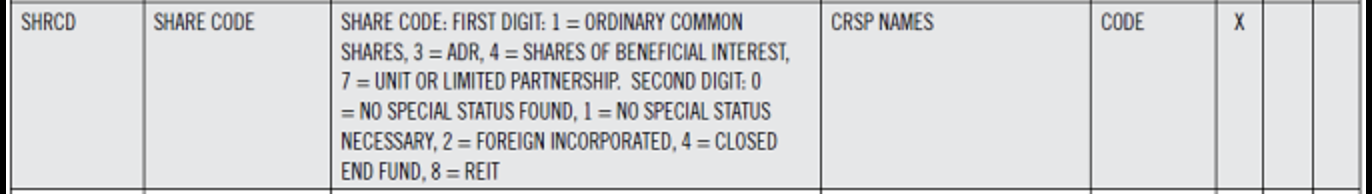

In [14]:
# Extract REIT-only permnos
reit_permnos = df_reit['permno'].unique()
len(reit_permnos)

473

In [5]:
df_ghz.describe()

DATE         DLRET        DLSTCD        EXCHCD           RET  \
count  2.484665e+06  2.484665e+06  20083.000000  2.484665e+06  2.463263e+06   
mean   1.996619e+07 -5.299889e-04    321.219439  2.268705e+00  1.237973e-02   
std    1.259153e+05  2.814903e-02    176.488374  9.021268e-01  1.876755e-01   
min    1.972083e+07 -1.000000e+00    100.000000  1.000000e+00 -1.870833e+00   
25%    1.986123e+07  0.000000e+00    231.000000  1.000000e+00 -6.666700e-02   
50%    1.997033e+07  0.000000e+00    233.000000  3.000000e+00  0.000000e+00   
75%    2.006103e+07  0.000000e+00    552.000000  3.000000e+00  7.339400e-02   
max    2.020123e+07  1.000000e+01    591.000000  3.000000e+00  2.400000e+01   

              SHRCD        SHROUT           VOL        absacc           acc  \
count  2.484665e+06  2.484665e+06  2.314907e+06  2.125488e+06  2.125488e+06   
mean   1.084273e+01  5.804829e+04  1.050396e+05  9.822026e-02 -2.626799e-02   
std    3.640593e-01  2.904042e+05  7.163725e+05  3.117618e-01  3.258108e-01   
min    1.000000e+01  8.000000e+00  0.000000e+00  0.000000e+00 -2.787134e+01   
25%    1.100000e+01  4.267000e+03  1.320000e+03  2.977278e-02 -7.829133e-02   
50%    1.100000e+01  1.188300e+04  7.373000e+03  6.386061e-02 -2.131386e-02   
75%    1.100000e+01  3.590000e+04  4.474800e+04  1.179278e-01  4.363764e-02   
max    1.100000e+01  2.920640e+07  2.012427e+08  2.122252e+02  2.122252e+02   

                age           agr            bm         bm_ia      cashdebt  \
count  2.484665e+06  2.285781e+06  2.483359e+06  2.483359e+06  2.393595e+06   
mean   1.137232e+01  2.179233e-01  7.442799e-01  4.435398e+01 -8.979545e-03   
std    9.967141e+00  4.996981e+00  2.668480e+00  2.223646e+03  2.231672e+00   
min    1.000000e+00 -1.000000e+00 -9.066391e+02 -2.769040e+04 -9.968317e+01   
25%    4.000000e+00 -2.035855e-02  3.135289e-01 -3.867841e-01  1.025489e-02   
50%    8.000000e+00  7.228707e-02  5.899983e-01  3.457781e-02  1.177408e-01   
75%    1.600000e+01  2.001574e-01  9.998441e-01  6.186019e-01  2.677126e-01   
max    4.900000e+01  1.264800e+03  2.438737e+02  1.937980e+05  1.538455e+03   

             cashpr            cf           cfp        cfp_ia          chadv  \
count  2.458565e+06  2.125488e+06  2.293415e+06  2.293415e+06  847642.000000   
mean   1.646913e+00  3.430589e-03  2.174835e-01 -8.747060e+00       0.049066   
std    1.942846e+03  6.249004e-01  3.565818e+01  1.484243e+03       0.265918   
min   -5.391944e+05 -2.380000e+02 -4.234092e+03 -9.780846e+04      -5.921042   
25%   -9.454226e+00 -3.443247e-02 -4.798642e-02 -2.957177e-01      -0.030389   
50%   -7.061348e-01  3.624243e-02  4.589913e-02  2.618628e-03       0.027451   
75%    4.770332e+00  1.039726e-01  1.203232e-01  1.480559e-01       0.128617   
max    2.748184e+05  3.554673e+00  2.662032e+04  2.580962e+04       5.476464   

              chato       chatoia        chcsho          chdrc       chempia  \
count  2.081024e+06  2.081024e+06  2.284221e+06  640172.000000  2.280912e+06   
mean  -8.596632e-03 -4.277310e-02  1.338740e+01       0.003943 -1.873673e-02   
std    3.409153e-01  3.598478e+00  2.955026e+03       0.056836  8.494477e+00   
min   -3.586339e+01 -3.247102e+02 -1.000000e+00      -2.152956 -1.791601e+02   
25%   -7.765891e-02 -7.869893e-02  0.000000e+00       0.000000 -2.006919e-01   
50%   -3.428140e-04  1.051844e-03  7.063662e-03       0.000000 -6.247664e-02   
75%    7.167350e-02  8.114101e-02  6.145872e-02       0.001250  3.281257e-02   
max    2.834919e+01  2.817801e+01  1.003861e+06       2.934271  2.104676e+03   

              chinv        chobklg          chpm        chpmia          conv  \
count  2.222415e+06  727480.000000  2.247579e+06  2.247579e+06  1.827350e+06   
mean   1.189988e-02       0.041249 -1.317115e-01  6.428083e-02  1.559261e-01   
std    7.072882e-02       0.606240  1.339385e+02  1.343963e+02  1.833578e+01   
min   -1.689015e+00     -69.852069 -2.701352e+04 -2.698539e+04  0.000000e+00   
25%   -2.021358e-03      -0.011245 -2

In [6]:
df_reit.describe()

DATE         DLRET      DLSTCD        EXCHCD           RET  \
count  5.357900e+04  53579.000000  439.000000  53579.000000  53465.000000   
mean   2.004856e+07     -0.000189  223.997722      1.357248      0.009545   
std    1.019215e+05      0.015142  144.110268      0.657597      0.108532   
min    1.973123e+07     -1.000000  100.000000      1.000000     -1.000000   
25%    1.997073e+07      0.000000  100.000000      1.000000     -0.031389   
50%    2.005093e+07      0.000000  231.000000      1.000000      0.008809   
75%    2.014063e+07      0.000000  233.000000      2.000000      0.050388   
max    2.020123e+07      0.826347  585.000000      3.000000      2.902777   

         SHRCD        SHROUT           VOL        absacc           acc  \
count  53579.0  5.357900e+04  5.335300e+04  46539.000000  46539.000000   
mean      18.0  7.144193e+04  1.291199e+05      0.044086     -0.030420   
std        0.0  1.230725e+05  3.171276e+05      0.062125      0.069840   
min       18.0  2.970000e+02  0.000000e+00      0.000005     -0.988550   
25%       18.0  9.605000e+03  3.419000e+03      0.019031     -0.046883   
50%       18.0  2.880200e+04  2.575300e+04      0.033787     -0.031545   
75%       18.0  8.297200e+04  1.254930e+05      0.049313     -0.013763   
max       18.0  1.456263e+06  9.708353e+06      1.020694      1.020694   

                age           agr            bm         bm_ia      cashdebt  \
count  53579.000000  49212.000000  53559.000000  53559.000000  17707.000000   
mean      11.486945      0.272558      0.919118    -26.118955      0.644396   
std        9.899332      2.746764      2.097366    435.345881      5.310936   
min        1.000000     -0.942767    -57.417085 -27689.720390    -27.977908   
25%        4.000000     -0.023851      0.468964    -27.236953      0.002590   
50%        8.000000      0.056803      0.714544     -0.052075      0.041293   
75%       17.000000      0.236410      1.065063      0.637192      0.141265   
max       48.000000    135.712332     35.017569   1634.583369     92.428094   

              cashpr            cf           cfp        cfp_ia        chadv  \
count   53401.000000  46539.000000  50375.000000  50375.000000  5361.000000   
mean       33.381080      0.053246      0.096121    -23.090038     0.058198   
std      3226.435937      0.065726      1.133461   1571.136425     0.156015   
min    -45435.321460     -0.971061    -48.369259 -97807.068340    -0.538997   
25%        -9.232525      0.031819      0.058604     -1.845500    -0.011040   
50%        -0.032788      0.055177      0.086755     -0.077437     0.036691   
75%        13.955539      0.075673      0.134195      0.131134     0.111807   
max    145456.426250      1.773889     27.675100    191.767692     0.897049   

              chato       chatoia        chcsho         chdrc       chempia  \
count  44890.000000  44890.000000  49191.000000  25849.000000  42033.000000   
mean      -0.001285      0.025600      0.175438      0.000571      0.145199   
std        0.070641      0.344227      1.257767      0.012522      8.349116   
min       -1.989621     -1.977032     -0.983792     -0.105097    -58.944491   
25%       -0.008784     -0.059163      0.000000      0.000000     -0.367562   
50%        0.000490      0.002040      0.015142      0.000000     -0.153554   
75%        0.008116      0.031151      0.137572      0.000000     -0.023321   
max        1.956498      1.961887     69.424000      0.543510    401.713679   

              chinv      chobklg          chpm        chpmia          conv  \
count  48660.000000  2808.000000  49176.000000  49176.000000  48838.000000   
mean       0.000147    -0.012662     -0.023227    -10.531987      0.029421   
std        0.026190     0.145011      5.306060     89.092941      0.111788   
min       -0.650651    -1.130902   -231.200000   -552.827941      0.000000   
25%        0.000000    -0.024999     -0.065243     -0.633354      0.000000   
50%        0.000000     0.000000     -0.001779    

In [7]:
df_reit.dtypes

DATE                 int64
DLRET              float64
DLSTCD             float64
EXCHCD               int64
RET                float64
SHRCD                int64
SHROUT               int64
VOL                float64
absacc             float64
acc                float64
age                  int64
agr                float64
bm                 float64
bm_ia              float64
cashdebt           float64
cashpr             float64
cf                 float64
cfp                float64
cfp_ia             float64
chadv              float64
chato              float64
chatoia            float64
chcsho             float64
chdrc              float64
chempia            float64
chinv              float64
chobklg            float64
chpm               float64
chpmia             float64
conv               float64
convind              int64
credrat            float64
credrat_dwn          int64
currat             float64
depr               float64
divi               float64
divo               float64
d

In [8]:
# Comparison of features missing values, non-REITs vs REITs
# in percentage, rounded to 2 decimal points
pd.DataFrame(
    zip(
        round(df_ghz.isnull().sum()/len(df_ghz)*100,2), 
        round(df_reit.isnull().sum()/len(df_reit)*100,2)
    ),
    columns = ['Non-REITs', 'REITs'],
    index = df_ghz.columns
)

Non-REITs  REITs
DATE                  0.00   0.00
DLRET                 0.00   0.00
DLSTCD               99.19  99.18
EXCHCD                0.00   0.00
RET                   0.86   0.21
SHRCD                 0.00   0.00
SHROUT                0.00   0.00
VOL                   6.83   0.42
absacc               14.46  13.14
acc                  14.46  13.14
age                   0.00   0.00
agr                   8.00   8.15
bm                    0.05   0.04
bm_ia                 0.05   0.04
cashdebt              3.67  66.95
cashpr                1.05   0.33
cf                   14.46  13.14
cfp                   7.70   5.98
cfp_ia                7.70   5.98
chadv                65.89  89.99
chato                16.25  16.22
chatoia              16.25  16.22
chcsho                8.07   8.19
chdrc                74.24  51.76
chempia               8.20  21.55
chinv                10.55   9.18
chobklg              70.72  94.76
chpm                  9.54   8.22
chpmia                9.54   8.22
conv                 26.45   8.85
convind               0.00   0.00
credrat              83.36  73.61
credrat_dwn           0.00   0.00
currat                3.45  24.32
depr                  4.46  92.76
divi                  8.00   8.15
divo                  8.00   8.15
dy                    0.27   1.91
egr                   8.02   8.17
ep                    0.04   0.02
fyear                 0.00   0.00
gma                   8.21   8.15
grGW                  8.00   8.15
grcapx               18.43  88.32
grltnoa              29.33  81.99
gvkey                 0.00   0.00
herf                  0.00   0.00
hire                  8.20  21.55
invest               11.25  66.23
lev                   0.31   0.02
lgr                   8.30   8.15
m1                    0.00   0.00
m2                    0.00   0.00
m3                    0.00   0.00
m4                    0.00   0.00
m5                    0.00   0.00
m6                    0.00   0.00
mve                   1.13   0.65
mve_f                 0.04   0.02
mve_ia                0.04   0.02
mve_m                 1.13   0.65
obklg                69.67  94.60
operprof              8.23   8.15
orgcap               27.14  90.08
pchcapx              10.60  87.69
pchcapx_ia           10.60  87.69
pchcurrat            11.47  32.55
pchdepr              12.44  93.86
pchgm_pchsale         9.33   8.20
pchquick             12.09  32.55
pchsale_pchinvt      26.98  94.38
pchsale_pchrect      11.86  24.30
pchsale_pchxsga      23.23  75.01
pchsaleinv           27.86  94.90
pctacc               14.46  13.14
permno                0.00   0.00
pps                   1.13   0.65
prc                   1.38   0.62
ps                    8.00   8.15
quick                 4.02  24.32
rd                    8.00   8.15
rd_mve               51.16  10.77
rd_sale              52.07  10.80
rdbias               62.31  97.74
realestate           61.64  95.53
roe                   8.02   8.15
roic                  4.07   0.02
salecash              0.80   0.31
saleinv              20.88  93.95
salerec               3.65  16.23
secured              47.38  14.03
securedind            0.00   0.00
sgr                   9.33   8.20
sic2                  0.00   0.00
sin                   0.00   0.00
sp                    0.30   0.02
spi                  13.09   8.77
spii                  0.00   0.00
tang                  4.25  68.02
tb                   11.69   7.60
woGW                  0.00   0.00

In [9]:
df_ghz.sic2.nunique(), df_ghz.sic2.unique()

(73,
 array([23, 53, 56, 67, 54, 27, 52, 57, 39, 33, 59,  8, 55, 22, 48, 20, 36,
        35, 50, 30, 34, 24, 13, 72, 87, 61, 15, 31, 37, 99, 80, 65, 78, 28,
        51, 73,  1, 26, 44, 32, 38, 58, 49, 10, 75, 14, 79, 25, 70, 45, 42,
        29, 62, 63, 47, 16,  7, 17, 21, 40, 60, 12, 64, 82, 41,  2, 84, 83,
        76, 89, 46, 81, 86]))

In [10]:
df_reit.sic2.nunique(), df_reit.sic2.unique()

(16, array([67, 76, 79, 70, 65, 61, 60, 99, 15, 73, 30, 38, 24, 58, 62, 63]))

In [11]:
df_reit.DATE.nunique()

565

In [12]:
df_reit.gvkey.nunique()

473

- Import risk free rate
- Import Welch and Goyal
- Create 16 SIC dummies
- Remove non-relevant features, e.g. gvkey, shrcd

## Download Fama French and risk-free rates

In [13]:

ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip"
# Download the file and save it
# We will name it fama_french.zip file
urllib.request.urlretrieve(ff_url,'fama_french.zip')
zip_file = zipfile.ZipFile('fama_french.zip', 'r')
# Next we extact the file data
# We will call it ff_factors.csv
zip_file.extractall()
# Make sure you close the file after extraction
zip_file.close()
ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows = 3,)
print(ff_factors.head())

  Unnamed: 0    Mkt-RF       SMB       HML        RF
0     192607      2.96     -2.38     -2.73      0.22
1     192608      2.64     -1.47      4.14      0.25
2     192609      0.36     -1.39      0.12      0.23
3     192610     -3.24     -0.13      0.65      0.32
4     192611      2.53     -0.16     -0.38      0.31


In [14]:
ff_factors.tail(100)

Unnamed: 0    Mkt-RF       SMB       HML  \
1140                              202107      1.27     -3.96     -1.75   
1141                              202108      2.90     -0.48     -0.13   
1142                              202109     -4.37      0.80      5.09   
1143   Annual Factors: January-December        NaN       NaN       NaN   
1144                                 NaN    Mkt-RF       SMB       HML   
1145                                1927     29.47     -2.83     -3.40   
1146                                1928     35.39      4.51     -6.17   
1147                                1929    -19.54    -30.69     11.65   
1148                                1930    -31.23     -5.34    -11.76   
1149                                1931    -45.11      3.64    -14.56   
1150                                1932     -9.39      4.56     10.83   
1151                                1933     57.05     45.46     32.39   
1152                                1934      3.02     25.60    -27.96   
1153                                1935     44.96     10.91      8.74   
1154                                1936     32.07     17.97     34.83   
1155                                1937    -34.96    -14.14     -4.09   
1156                                1938     28.48      9.29    -12.05   
1157                                1939      2.70      5.77    -18.98   
1158                                1940     -7.14      1.18     -1.60   
1159                                1941    -10.53     -4.04     11.13   
1160                                1942     16.20      5.09     19.96   
1161                                1943     27.96     33.29     38.47   
1162                                1944     20.97     17.53     16.46   
1163                                1945     38.38     25.14     10.88   
1164                                1946     -6.73     -3.99      3.11   
1165                                1947      2.95     -6.99      9.87   
1166                                1948      1.07     -9.11      3.74   
1167                                1949     19.12      3.75     -4.24   
1168                                1950     28.82      1.13     27.04   
1169                                1951     19.22     -5.22     -5.67   
1170                                1952     11.80     -6.76      3.31   
1171                                1953     -1.05     -1.16     -7.73   
1172                                1954     49.35     -2.06     26.04   
1173                                1955     23.75     -5.91      4.90   
1174                                1956      5.90     -0.90     -1.84   
1175                                1957    -13.16     -2.70     -6.18   
1176                                1958     43.45     14.51     13.48   
1177                                1959      9.76      5.46      1.78   
1178                                1960     -1.46     -2.72     -4.55   
1179                                1961     24.81      1.51      5.14   
1180                                1962    -12.90     -8.34      9.02   
1181                                1963     17.84     -6.06     15.45   
1182                                1964     12.54     -0.76      9.65   
1183                                1965     10.52     22.05      6.95   
1184                                1966    -13.51      2.93     -1.14   
1185                                1967     24.49     49.63     -7.30   
1186                                1968      8.79     24.17     18.49   
1187                                1969    -17.54    -14.12     -9.95   
1188                                1970     -6.49    -11.76     21.54   
1189                                1971     11.78      5.98    -11.26   
1190                                1972     13.05    -12.26      1.76   
1191                                1973    -26.18    -23.45     17.47   
1192                                1974    -35.75     -0.72      9.87   
1193                              

Remove Rows 1143 onwards

In [15]:
# Remove rows after 1143
ff_factors = ff_factors[:1143]

In [16]:
# Check
ff_factors.tail()

Unnamed: 0    Mkt-RF       SMB       HML        RF
1138     202105      0.29     -0.28      7.04      0.00
1139     202106      2.75      1.80     -7.76      0.00
1140     202107      1.27     -3.96     -1.75      0.00
1141     202108      2.90     -0.48     -0.13      0.00
1142     202109     -4.37      0.80      5.09      0.00

In [17]:
# Change column name
ff_factors.rename(columns={'Unnamed: 0':'date'}, inplace = True)
# Change ff_factors['date'] to datetime
ff_factors['date'] = pd.to_datetime(ff_factors['date'], format = "%Y%m")
# Check
ff_factors

date    Mkt-RF       SMB       HML        RF
0    1926-07-01      2.96     -2.38     -2.73      0.22
1    1926-08-01      2.64     -1.47      4.14      0.25
2    1926-09-01      0.36     -1.39      0.12      0.23
3    1926-10-01     -3.24     -0.13      0.65      0.32
4    1926-11-01      2.53     -0.16     -0.38      0.31
...         ...       ...       ...       ...       ...
1138 2021-05-01      0.29     -0.28      7.04      0.00
1139 2021-06-01      2.75      1.80     -7.76      0.00
1140 2021-07-01      1.27     -3.96     -1.75      0.00
1141 2021-08-01      2.90     -0.48     -0.13      0.00
1142 2021-09-01     -4.37      0.80      5.09      0.00

[1143 rows x 5 columns]

Oops...dates are set to start of month, whereas df_reit and df_ghz are set to month-end.

In [18]:
# Set date to month-end
ff_factors['date'] = ff_factors['date'] + pd.offsets.MonthEnd(0)
ff_factors

date    Mkt-RF       SMB       HML        RF
0    1926-07-31      2.96     -2.38     -2.73      0.22
1    1926-08-31      2.64     -1.47      4.14      0.25
2    1926-09-30      0.36     -1.39      0.12      0.23
3    1926-10-31     -3.24     -0.13      0.65      0.32
4    1926-11-30      2.53     -0.16     -0.38      0.31
...         ...       ...       ...       ...       ...
1138 2021-05-31      0.29     -0.28      7.04      0.00
1139 2021-06-30      2.75      1.80     -7.76      0.00
1140 2021-07-31      1.27     -3.96     -1.75      0.00
1141 2021-08-31      2.90     -0.48     -0.13      0.00
1142 2021-09-30     -4.37      0.80      5.09      0.00

[1143 rows x 5 columns]

In [19]:
ff_factors.dtypes

date      datetime64[ns]
Mkt-RF            object
SMB               object
HML               object
RF                object
dtype: object

In [20]:
# Convert variables to float, then divide by 100 to decimals
ff_factors['Mkt-RF'] = ff_factors['Mkt-RF'].astype(float) / 100
ff_factors['SMB'] = ff_factors['SMB'].astype(float)  / 100
ff_factors['HML'] = ff_factors['HML'].astype(float)  / 100
ff_factors['RF'] = ff_factors['RF'].astype(float)  / 100

# Check
ff_factors

date  Mkt-RF     SMB     HML      RF
0    1926-07-31  0.0296 -0.0238 -0.0273  0.0022
1    1926-08-31  0.0264 -0.0147  0.0414  0.0025
2    1926-09-30  0.0036 -0.0139  0.0012  0.0023
3    1926-10-31 -0.0324 -0.0013  0.0065  0.0032
4    1926-11-30  0.0253 -0.0016 -0.0038  0.0031
...         ...     ...     ...     ...     ...
1138 2021-05-31  0.0029 -0.0028  0.0704  0.0000
1139 2021-06-30  0.0275  0.0180 -0.0776  0.0000
1140 2021-07-31  0.0127 -0.0396 -0.0175  0.0000
1141 2021-08-31  0.0290 -0.0048 -0.0013  0.0000
1142 2021-09-30 -0.0437  0.0080  0.0509  0.0000

[1143 rows x 5 columns]

In [21]:
# For pd.merge to work, reset date to month-end, as some months (say, 2020-10-30) end on 
#  the last business day instead of the last calendar day
df_reit['DATE'] = pd.to_datetime(df_reit["DATE"], format = "%Y%m%d") + pd.offsets.MonthEnd(0)
df_reit

DATE  DLRET  DLSTCD  EXCHCD       RET  SHRCD  SHROUT       VOL  \
0     1973-12-31    0.0     NaN       2 -0.103448     18    1216     130.0   
1     1974-01-31    0.0     NaN       2 -0.038462     18    1216      90.0   
2     1974-02-28    0.0     NaN       2 -0.056000     18    1216     201.0   
3     1974-03-31    0.0     NaN       2 -0.021978     18    1216     317.0   
4     1974-04-30    0.0     NaN       2 -0.011236     18    1216     127.0   
...          ...    ...     ...     ...       ...    ...     ...       ...   
53574 2020-12-31    0.0   100.0       1  0.068646     18  140297  279905.0   
53575 2020-12-31    0.0   100.0       1  0.048077     18  273700  820684.0   
53576 2020-12-31    0.0   100.0       1  0.038388     18  126029  162685.0   
53577 2020-12-31    0.0   100.0       1  0.014843     18   68373   62651.0   
53578 2020-12-31    0.0   100.0       1 -0.066538     18  152145  308007.0   

         absacc       acc  age       agr        bm      bm_ia  cashdebt  \
0           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
1           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
2           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
3           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
4           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
...         ...       ...  ...       ...       ...        ...       ...   
53574  0.007220 -0.007220   10  0.351768  0.936513  31.221905  0.067258   
53575  0.022184 -0.022184   11  0.192123  1.000662  31.286054       NaN   
53576  0.005845  0.005845   17 -0.021064  0.649617  30.935010       NaN   
53577  0.020063 -0.020063   10  0.173648  0.416669  30.702061       NaN   
53578  0.033566 -0.033566   10  0.055960  0.586663  30.872055       NaN   

          cashpr        cf       cfp    cfp_ia  chadv     chato   chatoia  \
0      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
1      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
2      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
3      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
4      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
...          ...       ...       ...       ...    ...       ...       ...   
53574  -1.177669  0.045633  0.097370 -5.075222    NaN -0.006569  0.180589   
53575 -16.823500  0.031993  0.264800 -4.907793    NaN  0.012783  0.199941   
53576  49.465483  0.058652  0.074527 -5.098065    NaN  0.011527  0.198685   
53577  17.666570  0.048496  0.026005 -5.146587    NaN -0.002787  0.184371   
53578  24.744203  0.039623  0.049451 -5.123141    NaN  0.006572  0.193730   

         chcsho    chdrc   chempia  chinv  chobklg      chpm    chpmia  \
0           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
1           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
2           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
3           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
4           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
...         ...      ...       ...    ...      ...       ...       ...   
53574  0.147048  0.00000       NaN    0.0      NaN -0.072535  2.230838   
53575  0.100167  0.00000       NaN    0.0      NaN  0.303554  2.606927   
53576 -0.003454  0.00164 -0.296044    0.0      NaN  0.181595  2.484968   
53577  0.102255  0.00000 -0.252565    0.0      NaN -0.089942  2.213431   
53578  0.002066  0.00000 -0.180288    0.0      NaN -0.082597  2.220776   

           conv  convind  credrat  credrat_dwn      currat  depr  divi  divo  \
0      0.694657        1      NaN            0         NaN   NaN   NaN   NaN   
1      0.694657        1      NaN            0         NaN   NaN   NaN   NaN   
2      0.694657        1      NaN            0         NaN   NaN   NaN   NaN   
3      0.694657        1      NaN       

In [22]:
# Merge risk-free rate to df_reit
df_reit = pd.merge(
    left = df_reit,
    right = ff_factors[['date','RF']],
    how = 'left',
    left_on = 'DATE',
    right_on = 'date'
).drop(columns=('date'))

df_reit

DATE  DLRET  DLSTCD  EXCHCD       RET  SHRCD  SHROUT       VOL  \
0     1973-12-31    0.0     NaN       2 -0.103448     18    1216     130.0   
1     1974-01-31    0.0     NaN       2 -0.038462     18    1216      90.0   
2     1974-02-28    0.0     NaN       2 -0.056000     18    1216     201.0   
3     1974-03-31    0.0     NaN       2 -0.021978     18    1216     317.0   
4     1974-04-30    0.0     NaN       2 -0.011236     18    1216     127.0   
...          ...    ...     ...     ...       ...    ...     ...       ...   
53574 2020-12-31    0.0   100.0       1  0.068646     18  140297  279905.0   
53575 2020-12-31    0.0   100.0       1  0.048077     18  273700  820684.0   
53576 2020-12-31    0.0   100.0       1  0.038388     18  126029  162685.0   
53577 2020-12-31    0.0   100.0       1  0.014843     18   68373   62651.0   
53578 2020-12-31    0.0   100.0       1 -0.066538     18  152145  308007.0   

         absacc       acc  age       agr        bm      bm_ia  cashdebt  \
0           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
1           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
2           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
3           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
4           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
...         ...       ...  ...       ...       ...        ...       ...   
53574  0.007220 -0.007220   10  0.351768  0.936513  31.221905  0.067258   
53575  0.022184 -0.022184   11  0.192123  1.000662  31.286054       NaN   
53576  0.005845  0.005845   17 -0.021064  0.649617  30.935010       NaN   
53577  0.020063 -0.020063   10  0.173648  0.416669  30.702061       NaN   
53578  0.033566 -0.033566   10  0.055960  0.586663  30.872055       NaN   

          cashpr        cf       cfp    cfp_ia  chadv     chato   chatoia  \
0      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
1      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
2      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
3      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
4      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
...          ...       ...       ...       ...    ...       ...       ...   
53574  -1.177669  0.045633  0.097370 -5.075222    NaN -0.006569  0.180589   
53575 -16.823500  0.031993  0.264800 -4.907793    NaN  0.012783  0.199941   
53576  49.465483  0.058652  0.074527 -5.098065    NaN  0.011527  0.198685   
53577  17.666570  0.048496  0.026005 -5.146587    NaN -0.002787  0.184371   
53578  24.744203  0.039623  0.049451 -5.123141    NaN  0.006572  0.193730   

         chcsho    chdrc   chempia  chinv  chobklg      chpm    chpmia  \
0           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
1           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
2           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
3           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
4           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
...         ...      ...       ...    ...      ...       ...       ...   
53574  0.147048  0.00000       NaN    0.0      NaN -0.072535  2.230838   
53575  0.100167  0.00000       NaN    0.0      NaN  0.303554  2.606927   
53576 -0.003454  0.00164 -0.296044    0.0      NaN  0.181595  2.484968   
53577  0.102255  0.00000 -0.252565    0.0      NaN -0.089942  2.213431   
53578  0.002066  0.00000 -0.180288    0.0      NaN -0.082597  2.220776   

           conv  convind  credrat  credrat_dwn      currat  depr  divi  divo  \
0      0.694657        1      NaN            0         NaN   NaN   NaN   NaN   
1      0.694657        1      NaN            0         NaN   NaN   NaN   NaN   
2      0.694657        1      NaN            0         NaN   NaN   NaN   NaN   
3      0.694657        1      NaN       

## Merge with Welch and Goyal (2008) data

In [23]:
# Import Welch and Goyal (2008) macroeconomic time series
df_macro = pd.read_excel('../data/goyal_PredictorData2020.xlsx')
df_macro

/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


yyyymm    Index        D12        E12       b/m     tbl     AAA     BAA  \
0     187101     4.44   0.260000   0.400000       NaN     NaN     NaN     NaN   
1     187102     4.50   0.260000   0.400000       NaN     NaN     NaN     NaN   
2     187103     4.61   0.260000   0.400000       NaN     NaN     NaN     NaN   
3     187104     4.74   0.260000   0.400000       NaN     NaN     NaN     NaN   
4     187105     4.86   0.260000   0.400000       NaN     NaN     NaN     NaN   
...      ...      ...        ...        ...       ...     ...     ...     ...   
1795  202008  3500.31  59.128628  98.556667  0.235975  0.0010  0.0225  0.0327   
1796  202009  3363.00  58.851237  98.220000  0.241482  0.0011  0.0231  0.0336   
1797  202010  3269.96  58.660440  96.856667  0.253146  0.0010  0.0235  0.0344   
1798  202011  3621.63  58.469643  95.493333  0.226352  0.0009  0.0230  0.0330   
1799  202012  3756.07  58.278846  94.130000  0.219195  0.0009  0.0226  0.0316   

         lty      ntis     Rfree      infl     ltr   corpr      svar  csp  \
0        NaN       NaN       NaN       NaN     NaN     NaN       NaN  NaN   
1        NaN       NaN  0.004967       NaN     NaN     NaN       NaN  NaN   
2        NaN       NaN  0.004525       NaN     NaN     NaN       NaN  NaN   
3        NaN       NaN  0.004252       NaN     NaN     NaN       NaN  NaN   
4        NaN       NaN  0.004643       NaN     NaN     NaN       NaN  NaN   
...      ...       ...       ...       ...     ...     ...       ...  ...   
1795  0.0065 -0.008504  0.000100  0.003153 -0.0349 -0.0488  0.000743  NaN   
1796  0.0068 -0.005698  0.000100  0.001393  0.0080  0.0041  0.004907  NaN   
1797  0.0079 -0.001895  0.000100  0.000415 -0.0238 -0.0190  0.003661  NaN   
1798  0.0087 -0.005262  0.000100 -0.000611  0.0093  0.0509  0.002492  NaN   
1799  0.0093 -0.000094  0.000100  0.000941 -0.0115  0.0000  0.000678  NaN   

      CRSP_SPvw  CRSP_SPvwx  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN  
...         ...         ...  
1795   0.072068    0.070308  
1796  -0.038151   -0.039366  
1797  -0.026409   -0.027507  
1798   0.109403    0.107623  
1799   0.041573    0.040138  

[1800 rows x 18 columns]

In [24]:
df_macro.dtypes

yyyymm          int64
Index         float64
D12           float64
E12           float64
b/m           float64
tbl           float64
AAA           float64
BAA           float64
lty           float64
ntis          float64
Rfree         float64
infl          float64
ltr           float64
corpr         float64
svar          float64
csp           float64
CRSP_SPvw     float64
CRSP_SPvwx    float64
dtype: object

In [25]:
# Change df_macro['yyyymm'] to datetime, and set it to month-end
df_macro['yyyymm'] = pd.to_datetime(df_macro['yyyymm'], format = "%Y%m") + pd.offsets.MonthEnd(0)
df_macro

yyyymm    Index        D12        E12       b/m     tbl     AAA  \
0    1871-01-31     4.44   0.260000   0.400000       NaN     NaN     NaN   
1    1871-02-28     4.50   0.260000   0.400000       NaN     NaN     NaN   
2    1871-03-31     4.61   0.260000   0.400000       NaN     NaN     NaN   
3    1871-04-30     4.74   0.260000   0.400000       NaN     NaN     NaN   
4    1871-05-31     4.86   0.260000   0.400000       NaN     NaN     NaN   
...         ...      ...        ...        ...       ...     ...     ...   
1795 2020-08-31  3500.31  59.128628  98.556667  0.235975  0.0010  0.0225   
1796 2020-09-30  3363.00  58.851237  98.220000  0.241482  0.0011  0.0231   
1797 2020-10-31  3269.96  58.660440  96.856667  0.253146  0.0010  0.0235   
1798 2020-11-30  3621.63  58.469643  95.493333  0.226352  0.0009  0.0230   
1799 2020-12-31  3756.07  58.278846  94.130000  0.219195  0.0009  0.0226   

         BAA     lty      ntis     Rfree      infl     ltr   corpr      svar  \
0        NaN     NaN       NaN       NaN       NaN     NaN     NaN       NaN   
1        NaN     NaN       NaN  0.004967       NaN     NaN     NaN       NaN   
2        NaN     NaN       NaN  0.004525       NaN     NaN     NaN       NaN   
3        NaN     NaN       NaN  0.004252       NaN     NaN     NaN       NaN   
4        NaN     NaN       NaN  0.004643       NaN     NaN     NaN       NaN   
...      ...     ...       ...       ...       ...     ...     ...       ...   
1795  0.0327  0.0065 -0.008504  0.000100  0.003153 -0.0349 -0.0488  0.000743   
1796  0.0336  0.0068 -0.005698  0.000100  0.001393  0.0080  0.0041  0.004907   
1797  0.0344  0.0079 -0.001895  0.000100  0.000415 -0.0238 -0.0190  0.003661   
1798  0.0330  0.0087 -0.005262  0.000100 -0.000611  0.0093  0.0509  0.002492   
1799  0.0316  0.0093 -0.000094  0.000100  0.000941 -0.0115  0.0000  0.000678   

      csp  CRSP_SPvw  CRSP_SPvwx  
0     NaN        NaN         NaN  
1     NaN        NaN         NaN  
2     NaN        NaN         NaN  
3     NaN        NaN         NaN  
4     NaN        NaN         NaN  
...   ...        ...         ...  
1795  NaN   0.072068    0.070308  
1796  NaN  -0.038151   -0.039366  
1797  NaN  -0.026409   -0.027507  
1798  NaN   0.109403    0.107623  
1799  NaN   0.041573    0.040138  

[1800 rows x 18 columns]

In [26]:
# Create term spread 'tms', which is 'lty' minus 'tbl'
df_macro['tms'] = df_macro['lty'] - df_macro['tbl']

# Create default spread 'dfy', which is 'BAA' minus 'AAA'
df_macro['dfy'] = df_macro['BAA'] - df_macro['AAA']

# Only retain Goyal's 8 macroeconomic variables per GKX (2020), then merge
to_retain = ['yyyymm','D12','E12','b/m','ntis','tbl','tms','dfy','svar']

# Merge Goyal variables to df_reit
df_reit = pd.merge(
    left = df_reit,
    right = df_macro[to_retain],
    how = 'left',
    left_on = 'DATE',
    right_on = 'yyyymm'
).drop(columns=('yyyymm'))

df_reit

DATE  DLRET  DLSTCD  EXCHCD       RET  SHRCD  SHROUT       VOL  \
0     1973-12-31    0.0     NaN       2 -0.103448     18    1216     130.0   
1     1974-01-31    0.0     NaN       2 -0.038462     18    1216      90.0   
2     1974-02-28    0.0     NaN       2 -0.056000     18    1216     201.0   
3     1974-03-31    0.0     NaN       2 -0.021978     18    1216     317.0   
4     1974-04-30    0.0     NaN       2 -0.011236     18    1216     127.0   
...          ...    ...     ...     ...       ...    ...     ...       ...   
53574 2020-12-31    0.0   100.0       1  0.068646     18  140297  279905.0   
53575 2020-12-31    0.0   100.0       1  0.048077     18  273700  820684.0   
53576 2020-12-31    0.0   100.0       1  0.038388     18  126029  162685.0   
53577 2020-12-31    0.0   100.0       1  0.014843     18   68373   62651.0   
53578 2020-12-31    0.0   100.0       1 -0.066538     18  152145  308007.0   

         absacc       acc  age       agr        bm      bm_ia  cashdebt  \
0           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
1           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
2           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
3           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
4           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
...         ...       ...  ...       ...       ...        ...       ...   
53574  0.007220 -0.007220   10  0.351768  0.936513  31.221905  0.067258   
53575  0.022184 -0.022184   11  0.192123  1.000662  31.286054       NaN   
53576  0.005845  0.005845   17 -0.021064  0.649617  30.935010       NaN   
53577  0.020063 -0.020063   10  0.173648  0.416669  30.702061       NaN   
53578  0.033566 -0.033566   10  0.055960  0.586663  30.872055       NaN   

          cashpr        cf       cfp    cfp_ia  chadv     chato   chatoia  \
0      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
1      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
2      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
3      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
4      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
...          ...       ...       ...       ...    ...       ...       ...   
53574  -1.177669  0.045633  0.097370 -5.075222    NaN -0.006569  0.180589   
53575 -16.823500  0.031993  0.264800 -4.907793    NaN  0.012783  0.199941   
53576  49.465483  0.058652  0.074527 -5.098065    NaN  0.011527  0.198685   
53577  17.666570  0.048496  0.026005 -5.146587    NaN -0.002787  0.184371   
53578  24.744203  0.039623  0.049451 -5.123141    NaN  0.006572  0.193730   

         chcsho    chdrc   chempia  chinv  chobklg      chpm    chpmia  \
0           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
1           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
2           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
3           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
4           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
...         ...      ...       ...    ...      ...       ...       ...   
53574  0.147048  0.00000       NaN    0.0      NaN -0.072535  2.230838   
53575  0.100167  0.00000       NaN    0.0      NaN  0.303554  2.606927   
53576 -0.003454  0.00164 -0.296044    0.0      NaN  0.181595  2.484968   
53577  0.102255  0.00000 -0.252565    0.0      NaN -0.089942  2.213431   
53578  0.002066  0.00000 -0.180288    0.0      NaN -0.082597  2.220776   

           conv  convind  credrat  credrat_dwn      currat  depr  divi  divo  \
0      0.694657        1      NaN            0         NaN   NaN   NaN   NaN   
1      0.694657        1      NaN            0         NaN   NaN   NaN   NaN   
2      0.694657        1      NaN            0         NaN   NaN   NaN   NaN   
3      0.694657        1      NaN       

In [27]:
df_macro

yyyymm    Index        D12        E12       b/m     tbl     AAA  \
0    1871-01-31     4.44   0.260000   0.400000       NaN     NaN     NaN   
1    1871-02-28     4.50   0.260000   0.400000       NaN     NaN     NaN   
2    1871-03-31     4.61   0.260000   0.400000       NaN     NaN     NaN   
3    1871-04-30     4.74   0.260000   0.400000       NaN     NaN     NaN   
4    1871-05-31     4.86   0.260000   0.400000       NaN     NaN     NaN   
...         ...      ...        ...        ...       ...     ...     ...   
1795 2020-08-31  3500.31  59.128628  98.556667  0.235975  0.0010  0.0225   
1796 2020-09-30  3363.00  58.851237  98.220000  0.241482  0.0011  0.0231   
1797 2020-10-31  3269.96  58.660440  96.856667  0.253146  0.0010  0.0235   
1798 2020-11-30  3621.63  58.469643  95.493333  0.226352  0.0009  0.0230   
1799 2020-12-31  3756.07  58.278846  94.130000  0.219195  0.0009  0.0226   

         BAA     lty      ntis     Rfree      infl     ltr   corpr      svar  \
0        NaN     NaN       NaN       NaN       NaN     NaN     NaN       NaN   
1        NaN     NaN       NaN  0.004967       NaN     NaN     NaN       NaN   
2        NaN     NaN       NaN  0.004525       NaN     NaN     NaN       NaN   
3        NaN     NaN       NaN  0.004252       NaN     NaN     NaN       NaN   
4        NaN     NaN       NaN  0.004643       NaN     NaN     NaN       NaN   
...      ...     ...       ...       ...       ...     ...     ...       ...   
1795  0.0327  0.0065 -0.008504  0.000100  0.003153 -0.0349 -0.0488  0.000743   
1796  0.0336  0.0068 -0.005698  0.000100  0.001393  0.0080  0.0041  0.004907   
1797  0.0344  0.0079 -0.001895  0.000100  0.000415 -0.0238 -0.0190  0.003661   
1798  0.0330  0.0087 -0.005262  0.000100 -0.000611  0.0093  0.0509  0.002492   
1799  0.0316  0.0093 -0.000094  0.000100  0.000941 -0.0115  0.0000  0.000678   

      csp  CRSP_SPvw  CRSP_SPvwx     tms     dfy  
0     NaN        NaN         NaN     NaN     NaN  
1     NaN        NaN         NaN     NaN     NaN  
2     NaN        NaN         NaN     NaN     NaN  
3     NaN        NaN         NaN     NaN     NaN  
4     NaN        NaN         NaN     NaN     NaN  
...   ...        ...         ...     ...     ...  
1795  NaN   0.072068    0.070308  0.0055  0.0102  
1796  NaN  -0.038151   -0.039366  0.0057  0.0105  
1797  NaN  -0.026409   -0.027507  0.0069  0.0109  
1798  NaN   0.109403    0.107623  0.0078  0.0100  
1799  NaN   0.041573    0.040138  0.0084  0.0090  

[1800 rows x 20 columns]

## Create monthly returns excess of risk-free rate

In [28]:
# Minus risk free rate (RF) from returns (RET)
df_reit['RET'] = df_reit['RET'] - df_reit['RF']

## Drop unnecessary columns

In [29]:
# Drop unnecessary columns
to_drop = ['DLRET', 'DLSTCD', 'EXCHCD', 'SHRCD', 'SHROUT','VOL', 'cf', 'chadv', 'chato', 'chdrc', 
          'chobklg', 'chpm', 'conv', 'credrat', 'credrat_dwn', 'fyear', 'grGW',
          'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'mve_f', 'mve_m',
          'obklg', 'pchcapx', 'permno', 'pps', 'prc', 'rdbias', 'spi',
          'spii', 'woGW', 'RF']
df_reit = df_reit.drop(columns = to_drop)
df_reit

DATE       RET    absacc       acc  age       agr        bm  \
0     1973-12-31 -0.109848       NaN       NaN    1       NaN  0.982730   
1     1974-01-31 -0.044762       NaN       NaN    1       NaN  0.982730   
2     1974-02-28 -0.061800       NaN       NaN    1       NaN  0.982730   
3     1974-03-31 -0.027578       NaN       NaN    1       NaN  0.982730   
4     1974-04-30 -0.018736       NaN       NaN    1       NaN  0.982730   
...          ...       ...       ...       ...  ...       ...       ...   
53574 2020-12-31  0.068546  0.007220 -0.007220   10  0.351768  0.936513   
53575 2020-12-31  0.047977  0.022184 -0.022184   11  0.192123  1.000662   
53576 2020-12-31  0.038288  0.005845  0.005845   17 -0.021064  0.649617   
53577 2020-12-31  0.014743  0.020063 -0.020063   10  0.173648  0.416669   
53578 2020-12-31 -0.066638  0.033566 -0.033566   10  0.055960  0.586663   

           bm_ia  cashdebt     cashpr       cfp    cfp_ia   chatoia    chcsho  \
0       0.211526  0.092696  -3.571059       NaN       NaN       NaN       NaN   
1       0.211526  0.092696  -3.571059       NaN       NaN       NaN       NaN   
2       0.211526  0.092696  -3.571059       NaN       NaN       NaN       NaN   
3       0.211526  0.092696  -3.571059       NaN       NaN       NaN       NaN   
4       0.211526  0.092696  -3.571059       NaN       NaN       NaN       NaN   
...          ...       ...        ...       ...       ...       ...       ...   
53574  31.221905  0.067258  -1.177669  0.097370 -5.075222  0.180589  0.147048   
53575  31.286054       NaN -16.823500  0.264800 -4.907793  0.199941  0.100167   
53576  30.935010       NaN  49.465483  0.074527 -5.098065  0.198685 -0.003454   
53577  30.702061       NaN  17.666570  0.026005 -5.146587  0.184371  0.102255   
53578  30.872055       NaN  24.744203  0.049451 -5.123141  0.193730  0.002066   

        chempia  chinv    chpmia  convind      currat  depr  divi  divo  \
0           NaN    NaN       NaN        1         NaN   NaN   NaN   NaN   
1           NaN    NaN       NaN        1         NaN   NaN   NaN   NaN   
2           NaN    NaN       NaN        1         NaN   NaN   NaN   NaN   
3           NaN    NaN       NaN        1         NaN   NaN   NaN   NaN   
4           NaN    NaN       NaN        1         NaN   NaN   NaN   NaN   
...         ...    ...       ...      ...         ...   ...   ...   ...   
53574       NaN    0.0  2.230838        1  992.665126   NaN   0.0   0.0   
53575       NaN    0.0  2.606927        1         NaN   NaN   0.0   0.0   
53576 -0.296044    0.0  2.484968        0    1.487114   NaN   0.0   0.0   
53577 -0.252565    0.0  2.213431        0    5.767630   NaN   0.0   0.0   
53578 -0.180288    0.0  2.220776        0    1.280017   NaN   0.0   0.0   

             dy       egr        ep       gma  grcapx   grltnoa   gvkey  \
0      0.087263       NaN  0.106788       NaN     NaN       NaN    8985   
1      0.087263       NaN  0.106788       NaN     NaN       NaN    8985   
2      0.087263       NaN  0.106788       NaN     NaN       NaN    8985   
3      0.087263       NaN  0.106788       NaN     NaN       NaN    8985   
4      0.087263       NaN  0.106788       NaN     NaN       NaN    8985   
...         ...       ...       ...       ...     ...       ...     ...   
53574  0.105744  0.047935  0.081965  0.079416     NaN -0.001633  183606   
53575  0.133203  0.218486  0.081187  0.037601     NaN       NaN  183780   
53576  0.037837  0.062489  0.081955  0.036715     NaN       NaN  146140   
53577  0.018423  0.215841  0.015247  0.048216     NaN       NaN  183833   
53578  0.026821 -0.035770  0.007560  0.026464     NaN       NaN  185018   

           herf      hire  invest       lev       lgr        mve       mve_ia  \
0      0.164591       NaN     NaN  2.193716       NaN   9.777471   -77.464772   
1      0.164591       NaN     NaN  2.193716       NaN   9.668271   -77.464772   
2      0.164591       NaN     NaN  2.193716       NaN   9.629051   -77.464772   
3      0.164

To keep

Firm-specific variables
0. gvkey: Compustat permanent identifier
1. absacc: Absolute value of _acc_
2. acc: Annual income before extraordinary items (ib) minus operating cash flows (oancf) divided by average total assets (at); if oancf is missing then set to change in act - change in che - change in lct+ change in dlc+ change in txp-dp 
3. age: Number of years since first Compustat coverage 
4. agr: Annual percent change in total assets (at) 
5. bm: Book value of equity (ceq) divided by end of fiscal year-end market capitalization 
6. bm_ia: Industry adjusted book-to-market ratio 
7. cashdebt: Earnings before depreciation and extraordinary items (ib+dp) divided by avg. total liabilities (lt) 
8. cfp: Operating cash flows divided by fiscal-year-end market capitalization 
9. cfp_ia: Industry adjusted _cfp_
10. chatoia: 2-digit SIC - fiscal-year mean-adjusted change in sales (sale) divided by average total assets (at) 
11. chcsho: Annual percent change in shares outstanding (csho) 
12. chempia: Industry-adjusted change in number of employees 
13. chinv: Change in inventory (inv) scaled by average total assets (at) 
14. chpmia: 2-digit SIC - fiscal-year mean adjusted change in income before extraordinary items (ib) divided by sales (sale) 
15. convind: An indicator equal to 1 if company has convertible debt obligations 
16. currat: Current assets / current liabilities 
17. depr: Depreciation divided by PP&E 
18. divi: An indicator variable equal to 1 if company pays dividends but did not in prior year
19. divo: An indicator variable equal to 1 if company does not pay dividend but did in prior year 
20. dy: Total dividends (dvt) divided by market capitalization at fiscal year-end 
21. egr: Annual percent change in book value of equity (ceq) 
22. ep: Annual income before extraordinary items (ib) divided by end of fiscal year market cap
23. gma: Revenues (revt) minus cost of goods sold (cogs) divided by lagged total assets (at) 
24. grCAPX: Percent change in capital expenditures from yeart-2 to year t
25. grltnoa: Growth in long-term net operating assets
26. herf: 2-digit SIC - fiscal-year sales concentration (sum of squared percent of sales in industry for each company). 
27. hire: Percent change in number of employees (emp)
28. invest: Annual change in gross property, plant, and equipment (ppegt) + annual change in inventories (invt) all scaled by lagged total assets (at) 
29. lev: Total liabilities (lt) divided by fiscal year-end market capitalization 
30. lgr: Annual percent change in total liabilities (lt) 
31. mve: Natural log of market capitalization at end of month t-1 
32. mve_ia: 2-digit SIC industry-adjusted fiscal year-end market capitalization 
33. operprof: Revenue minus cost of goods sold - SG&A expense - interest expense divided by lagged common shareholders’ equity 
34. orgcap: Capitalized SG&A expenses 
35. pchcapx_ia: 	2-digit SIC - fiscal-year mean-adjusted percent change in capital expenditures (capx)
36. pchcurrat: Percent change in _currat_
37. pchdepr: Percent change in _depr_
38. pchgm_pchsale: Percent change in gross margin (sale-cogs) minus percent change in sales (sale) 
39. pchquick: Percent change in _quick_
40. pchsale_pchinvt: Annual percent change in sales (sale) minus annual percent change in inventory (invt)
41. pchsale_pchrect: Annual percent change in sales (sale) minus annual percent change in receivables (rect) 
42. pchsale_pchxsga: Annual percent change in sales (sale) minus annual percent change in SG&A (xsga)
43. pchsaleinv: Percent change in _saleinv_
44. pctacc: Same as acc except that the numerator is divided by the absolute value of ib; if ib= 0 then ib set to 0.01 for denominator 
45. ps: Sum of 9 indicator variables to form fundamental health score 
46. quick: (current assets - inventory) / current liabilities 
47. rd: An indicator variable equal to 1 if R&D expense as a percentage of total assets has an increase greater than 5%
48. rd_mve: R&D expense divided by end-of-fiscal-year market capitalization 
49. rd_sale: R&D expense divided by sales (xrd/sale) 
50. realestate: Buildings and capitalized leases divided by gross PP&E 
51. roe
52. roic: Annual earnings before interest and taxes (ebit) minus nonoperating income (nopi) divided by non-cash enterprise value (ceq+lt-che) 
53. salecash: Annual sales divided by cash and cash equivalents 
54. saleinv: Annual sales divided by total inventory 
55. salerec: Annual sales divided by accounts receivable 
56. secured: Total liability scaled secured debt 
57. securedind: An indicator equal to 1 if company has secured debt obligations 
58. sgr: Annual percent change in sales (sale) 
59. sin: An indicator variable equal to 1 if a company’s primary industry classification is in smoke or tobacco, beer or alcohol, or gaming 
60. sp: Annual revenue (sale) divided by fiscal year-end market capitalization 
61. tang: Cash holdings + 0.715 × receivables +0.547 × inventory + 0.535 × PPE/ totl assets 
62. tb: Tax income, calculated from current tax expense divided by maximum federal tax rate, divided by income before extraordinary items 

Macro variables
1. D12: market-wide dividend-price ratio
2. E12: market-wide earnings-price ratio (ep)
3. b/m: market-wide book-to-market ratio
4. ntis: net equity expansion
5. tbl: Treasury-bill rate
6. tms: term spread
7. dfy: default spread
8. svar: stock variance

In [30]:
			
# To standard scale
cont_var = ['absacc', 'acc', 'age', 'agr', 'bm', 'bm_ia', 'cashdebt', 'cashpr',
            'cfp', 'cfp_ia', 'chatoia', 'chcsho', 'chempia', 'chinv', 'chpmia', 
            'currat', 'depr', 'dy', 'egr', 'ep', 'gma', 'grcapx', 'grltnoa',
            'herf', 'hire', 'invest', 'lev', 'lgr', 'mve_ia', 'operprof', 'orgcap',
            'pchcapx_ia', 'pchcurrat', 'pchdepr', 'pchgm_pchsale', 'pchquick', 
            'pchsale_pchinvt', 'pchsale_pchrect', 'pchsale_pchxsga', 'pchsaleinv',
            'pctacc', 'ps', 'quick', 'rd_mve', 'rd_sale', 'realestate',
            'roe', 'roic', 'salecash', 'saleinv', 'salerec', 'secured', 'sgr', 'sp', 'tang',
            'tb'] 

# To dummify
nom_var = ['DATE', 'gvkey', 'sic2']
# To leave untouched - Goyal's macro variables
untouch_var = ['convind', 'divi', 'divo', 'rd', 'securedind', 'sin', ## binary
             'D12', 'E12', 'b/m', 'ntis', 'tbl', 'tms', 'dfy', 'svar'] ## macro

In [31]:
# Confirm binary indicators
df_reit.loc[:,df_reit.max() == 1]

convind  divi  divo      herf   rd  securedind  sin
0            1   NaN   NaN  0.164591  NaN           0    0
1            1   NaN   NaN  0.164591  NaN           0    0
2            1   NaN   NaN  0.164591  NaN           0    0
3            1   NaN   NaN  0.164591  NaN           0    0
4            1   NaN   NaN  0.164591  NaN           0    0
...        ...   ...   ...       ...  ...         ...  ...
53574        1   0.0   0.0  0.009340  0.0           1    0
53575        1   0.0   0.0  0.009340  0.0           1    0
53576        0   0.0   0.0  0.009340  0.0           1    0
53577        0   0.0   0.0  0.009340  0.0           1    0
53578        0   0.0   0.0  0.009340  0.0           1    0

[53579 rows x 7 columns]

## Data preprocessing

### Fill NAs
For missing features, I replace with the cross-sectional median at each month for each stock, respectively. 


In [32]:
# Group by date first, then fill NaN values with median
for i in cont_var:
    df_reit[i] = df_reit.groupby(['DATE'])[i].transform(lambda x: x.fillna(x.median()))

In [33]:
pd.DataFrame(
    round(df_reit.isnull().sum()/len(df_reit)*100,2),
    columns = ['Percent missing'],
    index = df_reit.columns
)

Percent missing
DATE                        0.00
RET                         0.21
absacc                      0.79
acc                         0.79
age                         0.00
agr                         0.02
bm                          0.00
bm_ia                       0.00
cashdebt                    0.00
cashpr                      0.00
cfp                         0.79
cfp_ia                      0.79
chatoia                     0.02
chcsho                      0.02
chempia                     0.02
chinv                       0.02
chpmia                      0.02
convind                     0.00
currat                      0.04
depr                        0.06
divi                        8.15
divo                        8.15
dy                          0.00
egr                         0.02
ep                          0.00
gma                         0.02
grcapx                      0.41
grltnoa                     0.08
gvkey                       0.00
herf                        0.00
hire                        0.02
invest                      0.02
lev                         0.00
lgr                         0.02
mve                         0.65
mve_ia                      0.00
operprof                    0.02
orgcap                      0.20
pchcapx_ia                  0.20
pchcurrat                   0.08
pchdepr                     0.20
pchgm_pchsale               0.02
pchquick                    0.08
pchsale_pchinvt             1.15
pchsale_pchrect             0.08
pchsale_pchxsga             0.20
pchsaleinv                  4.35
pctacc                      0.79
ps                          0.02
quick                       0.04
rd                          8.15
rd_mve                      0.00
rd_sale                     0.00
realestate                  2.99
roe                         0.02
roic                        0.00
salecash                    0.00
saleinv                     0.90
salerec                     0.04
secured                     1.51
securedind                  0.00
sgr                         0.02
sic2                        0.00
sin                         0.00
sp                          0.00
tang                        0.04
tb                          0.00
D12                         0.00
E12                         0.00
b/m                         0.00
ntis                        0.00
tbl                         0.00
tms                         0.00
dfy                         0.00
svar                        0.00

Most features are fixed for NaN values, with the exception of some indicators such as _divi_ and _divo_.

In [34]:
# Fill the remaining NaN with zeros
df_reit.fillna(0, inplace = True)

### Groupby standard scale
Unlike the usual standard scaling across time, we need to standard scale continuous stock-level features period by period. Therefore, i need to create a wrapper and use groupby() to apply these functions.

In [35]:
# # Combine list of original continuous variables and new interaction terms
# # Do NOT scale dummies
# to_scale = cont_var + inter_var
# len(to_scale)

In [36]:
# Create wrapper to apply StandardScaler() to multiple groups
#    Code is from https://stackoverflow.com/questions/55601928/apply-multiple-standardscalers-to-individual-groups

class SklearnWrapper:
    def __init__(self, transformation: typing.Callable):
        self.transformation = transformation
        self._group_transforms = []
        # Start with -1 and for each group up the pointer by one
        self._pointer = -1

    def _call_with_function(self, df: pd.DataFrame, function: str):
        # If pointer >= len we are making a new apply, reset _pointer
        if self._pointer >= len(self._group_transforms):
            self._pointer = -1
        self._pointer += 1
        return pd.DataFrame(
            getattr(self._group_transforms[self._pointer], function)(df.values),
            columns=df.columns,
            index=df.index,
        )

    def fit(self, df):
        self._group_transforms.append(self.transformation.fit(df.values))
        return self

    def transform(self, df):
        return self._call_with_function(df, "transform")

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)

    def inverse_transform(self, df):
        return self._call_with_function(df, "inverse_transform")

In [37]:
# Create custom fuction scaler 
scaler = SklearnWrapper(StandardScaler())

# Fit and transform data (holding state)
df_reit[cont_var] = df_reit.groupby("DATE")[cont_var].apply(scaler.fit_transform)
df_reit

DATE       RET    absacc       acc       age       agr        bm  \
0     1973-12-31 -0.109848  0.000000  0.000000  0.000000  0.000000  0.000000   
1     1974-01-31 -0.044762  0.000000  0.000000  0.000000  0.000000  0.000000   
2     1974-02-28 -0.061800  0.000000  0.000000  0.000000  0.000000  0.000000   
3     1974-03-31 -0.027578  0.000000  0.000000  0.000000  0.000000  0.000000   
4     1974-04-30 -0.018736  0.000000  0.000000  0.000000  0.000000  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
53574 2020-12-31  0.068546 -0.910030  0.470505 -0.570225  0.921311  0.630421   
53575 2020-12-31  0.047977 -0.445177  0.104112 -0.490990  0.273672  0.768150   
53576 2020-12-31  0.038288 -0.952729  0.790387 -0.015580 -0.591176  0.014453   
53577 2020-12-31  0.014743 -0.511078  0.156054 -0.570225  0.198725 -0.485691   
53578 2020-12-31 -0.066638 -0.091611 -0.174566 -0.570225 -0.278706 -0.120711   

          bm_ia  cashdebt    cashpr       cfp    cfp_ia   chatoia    chcsho  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
53574  0.217178  0.721695 -0.133295  0.131666 -0.128514 -0.071861  0.179029   
53575  0.231934 -0.074324 -0.145271  1.502628  0.089673  0.589279  0.005333   
53576  0.151184 -0.074324 -0.094529 -0.055380 -0.158282  0.546383 -0.378585   
53577  0.097599 -0.074324 -0.118870 -0.452693 -0.221514  0.057369  0.013070   
53578  0.136703 -0.074324 -0.113452 -0.260710 -0.190960  0.377109 -0.358131   

        chempia    chinv    chpmia  convind    currat      depr  divi  divo  \
0      0.000000  0.00000  0.000000        1  0.000000  0.000000   0.0   0.0   
1      0.000000  0.00000  0.000000        1  0.000000  0.000000   0.0   0.0   
2      0.000000  0.00000  0.000000        1  0.000000  0.000000   0.0   0.0   
3      0.000000  0.00000  0.000000        1  0.000000  0.000000   0.0   0.0   
4      0.000000  0.00000  0.000000        1  0.000000  0.000000   0.0   0.0   
...         ...      ...       ...      ...       ...       ...   ...   ...   
53574 -0.216949 -0.12562  0.080941        1  2.625686 -0.094763   0.0   0.0   
53575 -0.216949 -0.12562  0.143142        1 -0.197930 -0.094763   0.0   0.0   
53576 -0.277519 -0.12562  0.122972        0 -0.202473 -0.094763   0.0   0.0   
53577 -0.079795 -0.12562  0.078062        0 -0.190259 -0.094763   0.0   0.0   
53578  0.248898 -0.12562  0.079277        0 -0.203064 -0.094763   0.0   0.0   

             dy       egr        ep       gma    grcapx   grltnoa   gvkey  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    8985   
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    8985   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    8985   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    8985   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    8985   
...         ...       ...       ...       ...       ...       ...     ...   
53574  0.044316  0.077607  0.346756  0.537297 -0.073423 -0.270562  183606   
53575  0.151019  0.148935  0.341920 -0.429776 -0.073423 -0.205280  183780   
53576 -0.219563  0.083694  0.346691 -0.450280 -0.073423 -0.205280  146140   
53577 -0.295005  0.147829 -0.067791 -0.184274 -0.073423 -0.205280  183833   
53578 -0.262373  0.042601 -0.115556 -0.687344 -0.073423 -0.205280  185018   

           herf      hire    invest       lev       lgr        mve    mve_ia  \
0      0.000000  0.000000  0.000000  0.000000  0.000000   9.777471  0.000000   
1      0.000000  0.000000  0.000000  0.000000  0.000000   9.668271  

In [38]:
df_reit.describe()

RET        absacc           acc           age           agr  \
count  53579.000000  53579.000000  53579.000000  5.357900e+04  5.357900e+04   
mean       0.007169      0.000448     -0.003807 -1.757575e-17 -5.019719e-18   
std        0.108481      0.983713      0.983706  9.999160e-01  9.998973e-01   
min       -1.002400     -3.391165     -9.382772 -3.161123e+00 -4.353518e+00   
25%       -0.033774     -0.411102     -0.263727 -7.854998e-01 -3.719763e-01   
50%        0.006220     -0.157232      0.000000 -2.788719e-01 -1.775483e-01   
75%        0.048030      0.090596      0.241870  5.668245e-01  5.414917e-02   
max        2.902677     11.025946     10.736876  3.090035e+00  1.190550e+01   

                 bm         bm_ia      cashdebt        cashpr           cfp  \
count  5.357900e+04  5.357900e+04  5.357900e+04  5.357900e+04  53579.000000   
mean   2.943969e-18  2.857406e-17  5.534642e-18  1.642158e-18      0.013569   
std    9.999160e-01  9.999160e-01  9.999160e-01  9.999160e-01      0.990569   
min   -9.305319e+00 -1.344530e+01 -1.077336e+01 -1.255899e+01    -12.215611   
25%   -4.273143e-01 -2.202044e-01 -1.575553e-01 -7.873989e-02     -0.162122   
50%   -1.216001e-01 -1.079888e-01 -1.066928e-01  2.836700e-02     -0.003374   
75%    2.508174e-01  8.469413e-02 -7.384418e-02  1.079624e-01      0.114971   
max    1.141562e+01  1.308319e+01  1.252907e+01  1.344832e+01     11.848395   

             cfp_ia       chatoia        chcsho       chempia         chinv  \
count  53579.000000  5.357900e+04  5.357900e+04  5.357900e+04  5.357900e+04   
mean      -0.003397 -1.425932e-17 -1.682564e-18  5.636694e-18  9.639518e-18   
std        0.984295  9.997853e-01  9.993092e-01  9.997853e-01  9.942629e-01   
min      -12.172234 -1.197080e+01 -6.217360e+00 -1.202315e+01 -1.260731e+01   
25%       -0.168598 -1.678448e-01 -3.500507e-01 -1.749707e-01 -8.814202e-02   
50%       -0.025476  1.747142e-02 -2.253640e-01 -1.087211e-01 -2.773298e-03   
75%        0.134036  1.831626e-01 -3.811044e-02 -1.740351e-02  6.428301e-02   
max       12.679262  1.278919e+01  1.314554e+01  1.330366e+01  1.205890e+01   

             chpmia       convind        currat          depr          divi  \
count  5.357900e+04  53579.000000  53579.000000  53579.000000  53579.000000   
mean   2.571246e-17      0.120644     -0.000336      0.000187      0.017693   
std    9.998973e-01      0.325716      0.997851      0.995829      0.131836   
min   -1.307670e+01      0.000000     -2.969190     -7.122072      0.000000   
25%   -1.221802e-01      0.000000     -0.235745     -0.102914      0.000000   
50%    3.180380e-02      0.000000     -0.193542     -0.087771      0.000000   
75%    1.271519e-01      0.000000     -0.121791     -0.053991      0.000000   
max    1.223606e+01      1.000000     13.037690     13.238916      1.000000   

               divo            dy           egr            ep           gma  \
count  53579.000000  5.357900e+04  5.357900e+04  5.357900e+04  5.357900e+04   
mean       0.017302 -5.269410e-18 -1.448544e-18 -3.918903e-18  3.298613e-17   
std        0.130394  9.999160e-01  9.998973e-01  9.999160e-01  9.998973e-01   
min        0.000000 -6.664222e+00 -1.315220e+01 -1.230963e+01 -1.058898e+01   
25%        0.000000 -3.830353e-01 -2.415294e-01 -1.016111e-01 -4.171559e-01   
50%        0.000000 -1.583184e-01 -9.085583e-02  1.014609e-01 -7.973854e-02   
75%        0.000000  1.509817e-01  7.505990e-02  2.309765e-01  2.878838e-01   
max        1.000000  1.280998e+01  1.278906e+01  1.239688e+01  1.206255e+01   

             grcapx       grltnoa          gvkey          herf          hire  \
count  53579.000000  53579.000000   53579.000000  53579.000000  5.357900e+04   
mean      -0.000635     -0.002725   50677.290151     -0.000224  3.531934e-18   
std        0.995435      0.995769   58793.172603      0.999720  9.997293e-01   
min      -11.618780    -11.597697    1257.000000     -4.812884 -5.552143e+00   
25%       -0.123571     -0.125259   13142.000000     -0.

### Transform macro variables
**_to check with Jireh_** Initially I wanted to standard scale the macroeconomic variables over time so that it can work for neural networks and other algorithms that can go nuts without standard scaling. But what does standard scaling macro variables over time means?? It sounds illogical.

It might be better to transform some of them by natural logs: it brings the values 'down to earth' and it means something real: that we are dealing with proportionate changes instead of absolute levels.

In [39]:
# Macro-economic variables
macro_var = ['D12', 'E12', 'b/m', 'ntis', 'tbl', 'tms', 'dfy', 'svar'] 


D12           E12
count  53579.000000  53579.000000
mean      26.231083     61.887671
std       15.072157     35.561017
min        3.380000      6.860000
25%       15.218333     31.900000
50%       21.471000     53.383333
75%       37.380677     89.283333
max       59.683412    139.470000

<AxesSubplot:>

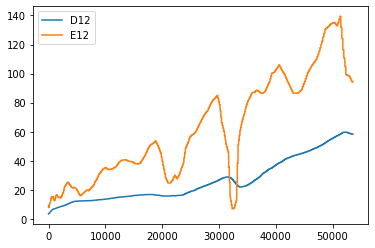

In [40]:
# Analyse D12 and E12 (dividend ratio and earnings ratio)
display(df_reit[['D12', 'E12']].describe())
df_reit[['D12','E12']].plot()

D12           E12
count  53579.000000  53579.000000
mean       3.104489      3.921780
std        0.576097      0.685734
min        1.217876      1.925707
25%        2.722501      3.462606
50%        3.066703      3.977499
75%        3.621154      4.491815
max        4.089054      4.937850

<AxesSubplot:>

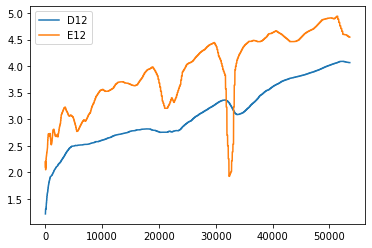

In [41]:
display(np.log(df_reit[['D12', 'E12']]).describe())
np.log(df_reit[['D12','E12']]).plot()

Natural logging seems okay

In [42]:
# Transform D12 and E12
df_reit['D12'] = np.log(df_reit['D12'])
df_reit['E12'] = np.log(df_reit['E12'])

b/m
count  53579.000000
mean       0.302528
std        0.134744
min        0.120510
25%        0.238061
50%        0.285372
75%        0.334099
max        1.206530

<AxesSubplot:>

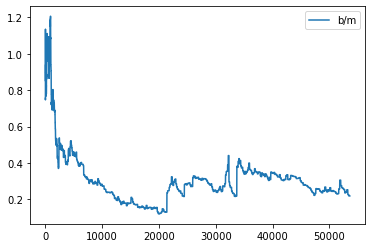

In [43]:
# Check book-to-market ratio
display(df_reit[['b/m']].describe())
df_reit[['b/m']].plot()

Looks well-behaved, no need for standard scaling

ntis
count  53579.000000
mean       0.002053
std        0.019901
min       -0.055953
25%       -0.012562
50%        0.005041
75%        0.015667
max        0.045727

<AxesSubplot:>

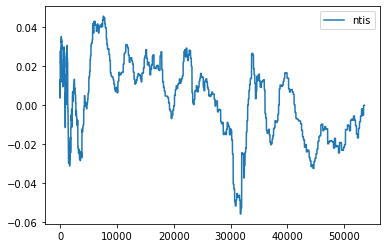

In [44]:
# Check net equity expansion
display(df_reit[['ntis']].describe())
df_reit[['ntis']].plot()

Looks well-behaved, no need for standard scaling

tbl           tms           dfy
count  53579.000000  53579.000000  53579.000000
mean       0.028674      0.020765      0.009737
std        0.025619      0.013205      0.003817
min        0.000100     -0.036500      0.005500
25%        0.002700      0.010000      0.007200
50%        0.023300      0.020000      0.009000
75%        0.049600      0.032100      0.011100
max        0.163000      0.045500      0.033800

<AxesSubplot:>

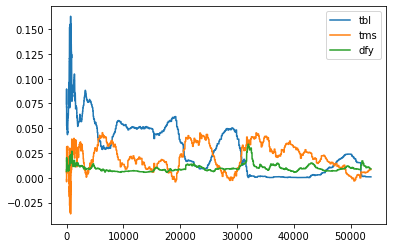

In [45]:
# Check Treasury rates, term spreads, default spreads
display(df_reit[['tbl','tms','dfy']].describe())
df_reit[['tbl','tms','dfy']].plot()

Looks well-behaved, no need for standard scaling

svar
count  53579.000000
mean       0.002818
std        0.006208
min        0.000150
25%        0.000743
50%        0.001384
75%        0.002705
max        0.073153

<AxesSubplot:>

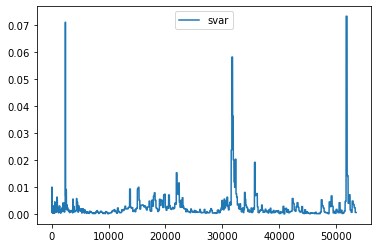

In [46]:
# Check stock variance
display(df_reit[['svar']].describe())
df_reit[['svar']].plot()

Looks well-behaved, no need for standard scaling

In [47]:
df_reit[macro_var]

D12       E12       b/m      ntis     tbl     tms     dfy  \
0      1.217876  2.099244  0.755588  0.013007  0.0745 -0.0019  0.0080   
1      1.223775  2.107381  0.751446  0.011627  0.0777 -0.0037  0.0065   
2      1.229641  2.115452  0.747098  0.010919  0.0712  0.0036  0.0068   
3      1.235471  2.123458  0.815184  0.010400  0.0796 -0.0013  0.0061   
4      1.241269  2.138497  0.824858  0.009657  0.0833 -0.0017  0.0062   
...         ...       ...       ...       ...     ...     ...     ...   
53574  4.065239  4.544677  0.219195 -0.000094  0.0009  0.0084  0.0090   
53575  4.065239  4.544677  0.219195 -0.000094  0.0009  0.0084  0.0090   
53576  4.065239  4.544677  0.219195 -0.000094  0.0009  0.0084  0.0090   
53577  4.065239  4.544677  0.219195 -0.000094  0.0009  0.0084  0.0090   
53578  4.065239  4.544677  0.219195 -0.000094  0.0009  0.0084  0.0090   

           svar  
0      0.005358  
1      0.003410  
2      0.001878  
3      0.001694  
4      0.001729  
...         ...  
53574  0.000678  
53575  0.000678  
53576  0.000678  
53577  0.000678  
53578  0.000678  

[53579 rows x 8 columns]

### Polynomial features
We do not conduct a wholesale conversion of all features to interaction terms...that would create more than 5000 variables. Instead, we only create interactions between the 62 stock-level characteristics and 8 macroeconomic state variables, i.e. 62 x 8 =  496 variables. This is not possible using the PolynomialFeatures(), so we have to custom create this set of interaction variables. 

In [48]:
df_reit.shape

(53579, 75)

In [49]:
# Stock-level variables
stock_var = ['absacc', 'acc', 'age', 'agr', 'bm', 'bm_ia', 'cashdebt', 'cashpr',
            'cfp', 'cfp_ia', 'chatoia', 'chcsho', 'chempia', 'chinv', 'chpmia', 
            'currat', 'depr', 'dy', 'egr', 'ep', 'gma', 'grcapx', 'grltnoa',
            'herf', 'hire', 'invest', 'lev', 'lgr', 'mve_ia', 'operprof', 'orgcap',
            'pchcapx_ia', 'pchcurrat', 'pchdepr', 'pchgm_pchsale', 'pchquick', 
            'pchsale_pchinvt', 'pchsale_pchrect', 'pchsale_pchxsga', 'pchsaleinv',
            'pctacc', 'ps', 'quick', 'rd_mve', 'rd_sale', 'realestate',
            'roe', 'roic', 'salecash', 'saleinv', 'salerec', 'secured', 'sgr', 'sp', 'tang',
            'tb', 'convind', 'divi', 'divo', 'rd', 'securedind', 'sin'] 


# Custom function
def create_inter(df, variables_1, variables_2, inter_var):
    for i in variables_1:
        for j in variables_2:
            df[f'{i}X{j}'] = df[i] * df[j]
            inter_var.append(f'{i}X{j}')

# Create interaction terms
inter_var = []
create_inter(df_reit, stock_var, macro_var, inter_var)

In [50]:
len(inter_var)

496

In [51]:
df_reit.shape

(53579, 571)

### Lagged returns

Need to negative lag by one for target variable, as we are using features at time(t) to predict returns at time(t+1)


In [52]:
df_reit

DATE       RET    absacc       acc       age       agr        bm  \
0     1973-12-31 -0.109848  0.000000  0.000000  0.000000  0.000000  0.000000   
1     1974-01-31 -0.044762  0.000000  0.000000  0.000000  0.000000  0.000000   
2     1974-02-28 -0.061800  0.000000  0.000000  0.000000  0.000000  0.000000   
3     1974-03-31 -0.027578  0.000000  0.000000  0.000000  0.000000  0.000000   
4     1974-04-30 -0.018736  0.000000  0.000000  0.000000  0.000000  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
53574 2020-12-31  0.068546 -0.910030  0.470505 -0.570225  0.921311  0.630421   
53575 2020-12-31  0.047977 -0.445177  0.104112 -0.490990  0.273672  0.768150   
53576 2020-12-31  0.038288 -0.952729  0.790387 -0.015580 -0.591176  0.014453   
53577 2020-12-31  0.014743 -0.511078  0.156054 -0.570225  0.198725 -0.485691   
53578 2020-12-31 -0.066638 -0.091611 -0.174566 -0.570225 -0.278706 -0.120711   

          bm_ia  cashdebt    cashpr       cfp    cfp_ia   chatoia    chcsho  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
53574  0.217178  0.721695 -0.133295  0.131666 -0.128514 -0.071861  0.179029   
53575  0.231934 -0.074324 -0.145271  1.502628  0.089673  0.589279  0.005333   
53576  0.151184 -0.074324 -0.094529 -0.055380 -0.158282  0.546383 -0.378585   
53577  0.097599 -0.074324 -0.118870 -0.452693 -0.221514  0.057369  0.013070   
53578  0.136703 -0.074324 -0.113452 -0.260710 -0.190960  0.377109 -0.358131   

        chempia    chinv    chpmia  convind    currat      depr  divi  divo  \
0      0.000000  0.00000  0.000000        1  0.000000  0.000000   0.0   0.0   
1      0.000000  0.00000  0.000000        1  0.000000  0.000000   0.0   0.0   
2      0.000000  0.00000  0.000000        1  0.000000  0.000000   0.0   0.0   
3      0.000000  0.00000  0.000000        1  0.000000  0.000000   0.0   0.0   
4      0.000000  0.00000  0.000000        1  0.000000  0.000000   0.0   0.0   
...         ...      ...       ...      ...       ...       ...   ...   ...   
53574 -0.216949 -0.12562  0.080941        1  2.625686 -0.094763   0.0   0.0   
53575 -0.216949 -0.12562  0.143142        1 -0.197930 -0.094763   0.0   0.0   
53576 -0.277519 -0.12562  0.122972        0 -0.202473 -0.094763   0.0   0.0   
53577 -0.079795 -0.12562  0.078062        0 -0.190259 -0.094763   0.0   0.0   
53578  0.248898 -0.12562  0.079277        0 -0.203064 -0.094763   0.0   0.0   

             dy       egr        ep       gma    grcapx   grltnoa   gvkey  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    8985   
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    8985   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    8985   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    8985   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    8985   
...         ...       ...       ...       ...       ...       ...     ...   
53574  0.044316  0.077607  0.346756  0.537297 -0.073423 -0.270562  183606   
53575  0.151019  0.148935  0.341920 -0.429776 -0.073423 -0.205280  183780   
53576 -0.219563  0.083694  0.346691 -0.450280 -0.073423 -0.205280  146140   
53577 -0.295005  0.147829 -0.067791 -0.184274 -0.073423 -0.205280  183833   
53578 -0.262373  0.042601 -0.115556 -0.687344 -0.073423 -0.205280  185018   

           herf      hire    invest       lev       lgr        mve    mve_ia  \
0      0.000000  0.000000  0.000000  0.000000  0.000000   9.777471  0.000000   
1      0.000000  0.000000  0.000000  0.000000  0.000000   9.668271  

In [53]:
# First, sort dates in ascending order, just to be sure
df_reit.sort_values('DATE', ascending = True, inplace = True)

# Group by stock ('gvkey'), then shift returns
df_reit['ret_lag'] = df_reit.groupby('gvkey')['RET'].shift(-1)

# Check
df_reit[['DATE','gvkey','RET','ret_lag']].head(20)

DATE  gvkey       RET   ret_lag
0  1973-12-31   8985 -0.109848 -0.044762
1  1974-01-31   8985 -0.044762 -0.061800
2  1974-02-28   8985 -0.061800 -0.027578
3  1974-03-31   8985 -0.027578 -0.018736
4  1974-04-30   8985 -0.018736  0.043864
5  1974-05-31   8985  0.043864 -0.174539
6  1974-06-30   8985 -0.174539  0.107865
7  1974-07-31   8985  0.107865 -0.242364
8  1974-08-31   8985 -0.242364 -0.221215
9  1974-09-30   8985 -0.221215  0.099067
11 1974-10-31   9625  0.215953 -0.108848
10 1974-10-31   8985  0.099067 -0.286155
12 1974-11-30   8985 -0.286155 -0.331324
13 1974-11-30   9625 -0.108848 -0.158923
14 1974-12-31   8985 -0.331324  0.834200
15 1974-12-31   9625 -0.158923  0.394200
16 1975-01-31   8985  0.834200 -0.128648
17 1975-01-31   9625  0.394200 -0.121947
18 1975-02-28   8985 -0.128648  0.277951
19 1975-02-28   9625 -0.121947  0.131138

Looks good. The latest month for each stock/gvkey will now have NaN values. Drop them. Also to drop original column of unlagged returns.

In [54]:
# The latest month for each stock/gvkey will have NaNs. Drop them.
df_reit.dropna(subset=['ret_lag'], inplace = True)

# Drop original column of unlagged monthly returns 'RET'
df_reit.drop(columns='RET', inplace = True)

### Fixed effects for Panel data 

In addition, we need to create SIC2 dummies, gvkey dummies and date time dummies. This is effectively panel regression, to account for industry fixed effects, firm fixed effects and time fixed effects.

Macroeconomic variables will also be standard-scaled over time.

In [55]:
# To dummify
nom_var = ['DATE', 'gvkey', 'sic2']

# To standard scale
macro_var = ['D12', 'E12', 'b/m', 'ntis', 'tbl', 'tms', 'dfy', 'svar'] 

In [56]:
df_reit['DATE'].nunique(), df_reit['gvkey'].nunique(), df_reit['sic2'].nunique()

(564, 473, 16)

In [57]:
df_reit['DATE'].nunique() + df_reit['gvkey'].nunique() + df_reit['sic2'].nunique()

1053

In [58]:
# Instantiate
mapper = DataFrameMapper(
#         [([macro], StandardScaler()) for macro in macro_var] +
        [([nom], LabelBinarizer()) for nom in nom_var],
        df_out=True
)

# Create dummies
binarized = mapper.fit_transform(df_reit)
binarized

DATE_1973-12-31T00:00:00.000000000  DATE_1974-01-31T00:00:00.000000000  \
0                                       1                                   0   
1                                       0                                   1   
2                                       0                                   0   
3                                       0                                   0   
4                                       0                                   0   
...                                   ...                                 ...   
53284                                   0                                   0   
53280                                   0                                   0   
53279                                   0                                   0   
53278                                   0                                   0   
53281                                   0                                   0   

       DATE_1974-02-28T00:00:00.000000000  DATE_1974-03-31T00:00:00.000000000  \
0                                       0                                   0   
1                                       0                                   0   
2                                       1                                   0   
3                                       0                                   1   
4                                       0                                   0   
...                                   ...                                 ...   
53284                                   0                                   0   
53280                                   0                                   0   
53279                                   0                                   0   
53278                                   0                                   0   
53281                                   0                                   0   

       DATE_1974-04-30T00:00:00.000000000  DATE_1974-05-31T00:00:00.000000000  \
0                                       0                                   0   
1                                       0                                   0   
2                                       0                                   0   
3                                       0                                   0   
4                                       1                                   0   
...                                   ...                                 ...   
53284                                   0                                   0   
53280                                   0                                   0   
53279                                   0                                   0   
53278                                   0                                   0   
53281                                   0                                   0   

       DATE_1974-06-30T00:00:00.000000000  DATE_1974-07-31T00:00:00.000000000  \
0                                       0                                   0   
1                                       0                                   0   
2                                       0                                   0   
3                                       0                                   0   
4                                       0                                   0   
...                                   ...                                 ...   
53284                                   0                                   0   
53280                                   0                                   0   
53279                                   0                                   0   
53278                                   0                                   0   
53281                                   0                                   0   

       DATE_1974-08-31T00:00:00.000000000  DATE_1974-09-30T00:00:00.000000000  \
0                                 

In [59]:
# Merge, then drop 'gvkey' and 'sic2' columns
df_reit = pd.merge(
    df_reit,
    binarized,
    left_index = True,
    right_index = True
)

df_reit.drop(columns = ['gvkey','sic2'], inplace = True)

# Set DATE as index
df_reit.set_index('DATE', inplace = True)
df_reit.sort_index(inplace = True)

## Model set up
### Create y and X

In [60]:
y = df_reit['ret_lag']
y

DATE
1973-12-31   -0.044762
1974-01-31   -0.061800
1974-02-28   -0.027578
1974-03-31   -0.018736
1974-04-30    0.043864
                ...   
2020-11-30    0.127330
2020-11-30    0.110136
2020-11-30    0.199757
2020-11-30   -0.031510
2020-11-30    0.039088
Name: ret_lag, Length: 53106, dtype: float64

In [61]:
X = df_reit.drop(columns = 'ret_lag')
X

absacc       acc       age       agr        bm     bm_ia  \
DATE                                                                     
1973-12-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1974-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1974-02-28  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1974-03-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1974-04-30  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2020-11-30 -1.096513  0.664858 -1.125265  0.820227  0.637117  0.227955   
2020-11-30 -0.450207  0.088248 -1.125265 -0.265219 -0.669333  0.064729   
2020-11-30  0.147873 -0.376710 -1.125265  6.185095 -0.200698  0.123279   
2020-11-30 -0.038334 -0.231950 -0.887253  1.080945 -0.097122  0.136220   
2020-11-30 -0.242836 -0.072966 -1.125265 -0.655874 -0.294717  0.111533   

            cashdebt    cashpr       cfp    cfp_ia   chatoia    chcsho  \
DATE                                                                     
1973-12-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1974-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1974-02-28  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1974-03-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1974-04-30  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2020-11-30 -0.586511 -0.135023 -0.154532 -0.179732  0.154906  0.593223   
2020-11-30 -0.073908 -0.131375  0.232275 -0.098855  0.164168 -0.365411   
2020-11-30 -0.073908 -0.130186 -0.258926 -0.201559  0.341837  0.724199   
2020-11-30 -0.126032 -0.125804 -0.159545 -0.180780  0.058212  2.198501   
2020-11-30 -0.816810 -0.123279 -0.296704 -0.209458  0.352060 -0.215635   

             chempia     chinv    chpmia  convind    currat      depr  divi  \
DATE                                                                          
1973-12-31  0.000000  0.000000  0.000000        1  0.000000  0.000000   0.0   
1974-01-31  0.000000  0.000000  0.000000        1  0.000000  0.000000   0.0   
1974-02-28  0.000000  0.000000  0.000000        1  0.000000  0.000000   0.0   
1974-03-31  0.000000  0.000000  0.000000        1  0.000000  0.000000   0.0   
1974-04-30  0.000000  0.000000  0.000000        1  0.000000  0.000000   0.0   
...              ...       ...       ...      ...       ...       ...   ...   
2020-11-30 -0.213379 -0.124909  0.083672        1 -0.196941 -0.094230   0.0   
2020-11-30 -0.386121 -0.124909  0.096197        0 -0.192037 -0.094230   0.0   
2020-11-30  5.054231 -0.124909  0.101251        0 -0.006604 -0.094230   0.0   
2020-11-30 -0.213379 -0.124909  0.072623        0 -0.196661 -0.094230   0.0   
2020-11-30 -0.611230 -0.124909  0.107272        1 -0.200693  2.972054   0.0   

            divo        dy       egr        ep       gma    grcapx   grltnoa  \
DATE                                                                           
1973-12-31   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1974-01-31   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1974-02-28   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1974-03-31   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1974-04-30   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
2020-11-30   0.0 -0.020778  0.154798  0.279020  0.135497 -0.089655 -0.210713   
2020-11-30   0.0 -0.233466  0.006144 -0.191705 -0.396635 -0.089655 -0.204088   
2020-11-30   0.0 -0.238409  0.534155  0.008089  1.965975 -0.089655 -0.204088   
2020-11-30   0.0 -0.133605  0.405780 -0.043216  0.142166 -0.089655  0.433794   
2020-11-30   0.0 -0.306594  0.056674 -0.085045 -0.672244 -0.705420 -0.511060   

                her

In [62]:
y['1990':'2000']

DATE
1990-01-31   -0.005700
1990-01-31   -0.577129
1990-01-31    0.048845
1990-01-31   -0.159546
1990-01-31    0.009452
                ...   
2000-12-31   -0.005619
2000-12-31   -0.013400
2000-12-31    0.235979
2000-12-31    0.012637
2000-12-31   -0.042526
Name: ret_lag, Length: 15384, dtype: float64

In [63]:
y.resample('M').mean()[-12:].mean()

0.0017034763604679606

### Custom train-validate function

In [64]:
# Split a dataset into train/validate sets
def train_validate_split(X, y, start_year, end_year, years_of_validation):
    return X[f'{start_year}' : f'{end_year - years_of_validation}'], \
           X[f'{end_year - years_of_validation + 1}' : f'{end_year}'], \
           y[f'{start_year}' : f'{end_year - years_of_validation}'], \
           y[f'{end_year - years_of_validation + 1}' : f'{end_year}']




In [65]:
# Set Train years to be 1990-2000, Validate years to be 2001-2005
#  note: In future, we can do an expanding window recursive hyperparameter optimization by 
#  changing start/end years

X_train, X_validate, y_train, y_validate = train_validate_split(X, y, 1990, 2005, 5)

In [66]:
display(X_train, X_validate, y_train, y_validate)

absacc       acc       age       agr        bm     bm_ia  \
DATE                                                                     
1990-01-31 -0.435214  0.221274 -0.657917 -0.538667  2.101204  0.750511   
1990-01-31 -0.137419 -0.057084 -0.657917 -0.410643  0.191832 -4.099893   
1990-01-31 -0.391847  0.180738 -0.657917 -0.731468  0.302661  0.304580   
1990-01-31 -0.007650 -0.178383 -0.657917 -0.413393  2.716515  0.903072   
1990-01-31 -0.450399  0.265750 -0.657917 -1.198945  0.393448  0.327090   
...              ...       ...       ...       ...       ...       ...   
2000-12-31  0.906207 -0.895125 -0.267040 -0.296273 -0.672998 -0.464453   
2000-12-31  0.962580 -0.943556 -0.267040 -0.246647  0.556225  0.555306   
2000-12-31 -1.181710  0.898650 -0.405713 -0.397226  0.322887  0.361730   
2000-12-31 -0.506582  0.318633 -0.267040  0.018940 -0.599309 -0.403321   
2000-12-31 -0.902971  0.659180 -0.267040 -0.685766  0.045230  0.131387   

            cashdebt    cashpr       cfp    cfp_ia   chatoia    chcsho  \
DATE                                                                     
1990-01-31 -0.347375  0.142260  0.540674  0.288317 -0.293331 -0.286874   
1990-01-31  3.198866  0.146068  0.212235 -4.254423 -0.312695 -0.286874   
1990-01-31 -0.320507  0.141400  0.451242  0.281930 -0.278340 -0.517202   
1990-01-31  4.459831  0.108314  0.872789  0.312039 -0.112062 -0.286874   
1990-01-31 -0.239155  0.137334  0.251625  0.267672 -0.070461 -0.286874   
...              ...       ...       ...       ...       ...       ...   
2000-12-31 -0.095105  0.103271  0.218093  0.179742  0.036439 -0.291769   
2000-12-31 -0.095105  0.106761 -0.206274  0.158469  0.014820 -0.324225   
2000-12-31 -0.165537 -0.090089  0.232618  0.180470  0.041382 -0.281209   
2000-12-31 -0.095105  0.114964 -0.535053  0.141987  0.157662 -0.199591   
2000-12-31 -0.095105  0.104999 -0.380398  0.149740 -0.875001 -0.549636   

             chempia     chinv    chpmia  convind    currat      depr  divi  \
DATE                                                                          
1990-01-31 -0.013093 -0.156305 -0.102525        0  7.607317 -0.100109   0.0   
1990-01-31 -5.131791 -0.156305 -2.703400        0 -0.124684 -0.100109   0.0   
1990-01-31 -0.013093 -0.156305  0.193333        0 -0.172255 -0.100109   0.0   
1990-01-31 -0.013093 -0.156305  0.138996        0 -0.182339 -0.100109   0.0   
1990-01-31 -0.013093 -0.156305  0.260490        0 -0.176785 -0.100109   0.0   
...              ...       ...       ...      ...       ...       ...   ...   
2000-12-31  0.136442 -0.061420  0.065924        0 -0.127630 -0.080645   0.0   
2000-12-31  0.158922 -0.061420 -0.062821        0 -0.122812 -0.080645   1.0   
2000-12-31  0.107001 -0.061420  0.058530        0 -0.121335 -0.080645   0.0   
2000-12-31  0.120851 -0.061420  0.047370        0 -0.127299 -0.080645   0.0   
2000-12-31  0.107001 -0.061420  0.111108        0 -0.120927 -0.080645   0.0   

            divo        dy       egr        ep       gma    grcapx   grltnoa  \
DATE                                                                           
1990-01-31   0.0  1.884356 -0.156844  0.369621  0.062745 -0.153422 -0.073942   
1990-01-31   0.0  0.608304 -0.153566  0.413132  0.037908 -0.153422  2.010903   
1990-01-31   0.0  0.595208 -0.158689  0.666170  0.082835 -0.153422 -0.073942   
1990-01-31   0.0  2.951426 -0.157068  0.679242 -0.812960 -0.153422 -0.073942   
1990-01-31   0.0  1.065277 -0.149429  0.848468  0.451812 -0.153422 -0.073942   
...          ...       ...       ...       ...       ...       ...       ...   
2000-12-31   0.0  0.077549 -0.031502  0.164162  0.238175 -0.118395  0.105329   
2000-12-31   0.0 -0.394714 -0.056532 -0.427017 -1.436703 -0.118395  0.105329   
2000-12-31   0.0  0.342538  0.011627  0.374832 -0.734891 -0.118395 -0.736740   
2000-12-31   0.0 -0.511085  0.020576  0.047643 -0.156872  2.075161  0.105329   
2000-12-31   0.0 -0.108461 -0.044429  0.203595 -0.915042 -0.118395  0.105329   

                her

absacc       acc       age       agr        bm     bm_ia  \
DATE                                                                     
2001-01-31 -0.204930  0.059477 -0.544387 -0.161592 -0.022154  0.075485   
2001-01-31  0.259867 -0.339840 -0.405713 -0.255738 -0.277349 -0.136224   
2001-01-31 -0.146396  0.009189 -0.405713  0.196265 -0.497673 -0.319004   
2001-01-31 -0.967878  0.714942 -0.544387  3.434788 -0.853271 -0.614007   
2001-01-31 -0.515214  0.326049 -0.544387  0.316397 -0.048121  0.053943   
...              ...       ...       ...       ...       ...       ...   
2005-12-31 -0.026356 -0.321792  0.048514  0.079197 -1.620659 -1.311497   
2005-12-31 -0.206941 -0.165334  0.048514  0.557134 -0.010894 -0.038885   
2005-12-31 -0.028209 -0.320187  0.048514  0.032306 -0.404678 -0.350194   
2005-12-31 -0.338632 -0.051237 -0.066010 -0.459648 -0.591291 -0.497723   
2005-12-31 -0.026654 -0.321535  0.048514 -0.799759 -0.067996 -0.084028   

            cashdebt    cashpr       cfp    cfp_ia   chatoia    chcsho  \
DATE                                                                     
2001-01-31 -0.095105  0.053279 -0.190165  0.159276  0.023547 -0.285725   
2001-01-31 -0.095105  0.087939 -0.205948  0.158485 -0.047304 -0.199304   
2001-01-31 -0.095105  0.110393 -0.406970  0.148408  0.085236 -0.280469   
2001-01-31 -0.095105  0.116774 -0.647714  0.136339  5.511609  5.327998   
2001-01-31 -0.095105  0.004446  1.089331  0.223417 -0.217987 -0.276429   
...              ...       ...       ...       ...       ...       ...   
2005-12-31 -0.154163  0.068935  0.164538  0.180809 -0.297589 -0.356533   
2005-12-31 -0.154163  0.022440  0.168652  0.184875 -0.108409  0.491020   
2005-12-31 -0.154163  0.081613  0.295417  0.310130 -0.088353 -0.359422   
2005-12-31 -0.154163  0.075066  0.104414  0.121401  0.033872 -0.284112   
2005-12-31 -0.154163  0.477285  0.109534  0.126460  0.343369 -0.335137   

             chempia     chinv    chpmia  convind    currat      depr  divi  \
DATE                                                                          
2001-01-31  0.114374 -0.061420  0.008067        0 -0.125631 -0.080645   0.0   
2001-01-31  0.090645 -0.061420  0.022422        0 -0.123570 -0.080645   0.0   
2001-01-31  0.089336 -0.061420  0.007141        0 -0.126586 -0.080645   0.0   
2001-01-31  0.107001 -0.061420 -0.072528        0 -0.121564 -0.080645   0.0   
2001-01-31  0.107001 -0.061420  0.059585        0 -0.122577 -0.080645   0.0   
...              ...       ...       ...      ...       ...       ...   ...   
2005-12-31  0.239501  0.063833  0.043293        0 -0.219328 -0.116781   0.0   
2005-12-31  0.277576  0.063833  0.037455        0  0.054689 -0.116781   0.0   
2005-12-31  0.404521  0.063833  0.010736        0 -0.299158 -0.116781   0.0   
2005-12-31 -0.388735  0.063833  0.027848        0 -0.273038 -0.116781   0.0   
2005-12-31 -0.628545  0.063833  0.028076        0 -0.308668 -0.116781   0.0   

            divo        dy        egr        ep       gma    grcapx   grltnoa  \
DATE                                                                            
2001-01-31   0.0  0.142566   0.003951  0.229917  0.128074 -0.118395  0.105329   
2001-01-31   0.0 -0.432867   0.025460  0.082903 -0.068005 -0.118395  0.105329   
2001-01-31   0.0 -0.014588  -0.013330  0.107889  0.380846 -0.118395  0.105329   
2001-01-31   0.0  2.404853   0.574155  0.018050  3.144628 -0.118395  0.105329   
2001-01-31   0.0  2.757456 -11.395963  1.231709 -0.078229 -0.118395  0.105329   
...          ...       ...        ...       ...       ...       ...       ...   
2005-12-31   0.0 -0.837480  -2.455995  0.190085  1.746349 -0.143833 -0.110898   
2005-12-31   0.0 -0.004445   0.155164  0.154487  0.316302 -0.143833 -0.110898   
2005-12-31   0.0 -0.307324   0.133311  0.341893  0.465762 -0.143833 -0.110898   
2005-12-31   0.0 -0.412970  -0.205880  0.022257 -0.262123 -0.143833 -0.110898   
2005-12-31   0.0 -0.097602  -0.368857 -0.859211 -1.118392 -0.366524 -0.110898   

      

DATE
1990-01-31   -0.005700
1990-01-31   -0.577129
1990-01-31    0.048845
1990-01-31   -0.159546
1990-01-31    0.009452
                ...   
2000-12-31   -0.005619
2000-12-31   -0.013400
2000-12-31    0.235979
2000-12-31    0.012637
2000-12-31   -0.042526
Name: ret_lag, Length: 15384, dtype: float64

DATE
2001-01-31    0.018885
2001-01-31   -0.027835
2001-01-31   -0.027829
2001-01-31   -0.039969
2001-01-31   -0.003800
                ...   
2005-12-31    0.033065
2005-12-31    0.055890
2005-12-31    0.067621
2005-12-31    0.089799
2005-12-31    0.015023
Name: ret_lag, Length: 7819, dtype: float64

### Custom metric function

In [67]:
# Create RMSE function
def measure_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Create custom out-of-sample R-squared function
#   where denominator is the sum of squared excess returns without de-meaning
def measure_r2(y_true, y_pred):
    numerator = (
        (y_true - y_pred) ** 2
    ).sum(axis=0)
    denominator = (
        (y_true) ** 2
    ).sum(axis=0)
    return (1 - numerator / denominator) * 100
  

### Custom grid search and walk-forward validation
These are generic custom functions that will be modified later on. Specifically, model_config() and model_fit() will be changed according to the type of model used.

In [337]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    # create configs
    configs = []
    print('Total configs (XXX): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    return None

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate)
    return y_pred

def evaluate(X_train, X_validate, y_train, y_validate, cfg):
    # convert config to a key for storing results later
    key = str(cfg)
    # fit and evaluate model
    model = model_fit(X_train, y_train, cfg)
    y_pred = model_predict(model, X_validate)
    score = measure_r2(y_validate, y_pred)
    return (key, score)

# Grid search list of configs
def grid_search(X_train, X_validate, y_train, y_validate, cfg_list):
    # evaluate configs
    scores = [evaluate(X_train, X_validate, y_train, y_validate, cfg) for cfg in cfg_list]
    # sort configs by score
    scores.sort(key = lambda tup: tup[1], reverse = True)
    return scores

# Walk-forward testing, refit frequency is defined in number of years
def walk_forward(selected_cfg, X, y, start_year = 1990, end_year = 2020, years_to_test = 15, refit_frequency = 1):
    predictions = []
    counter = 1
    for i in range(years_to_test):
        # Create train-test sets
        X_train, X_test, y_train, y_test = train_validate_split(
            X, y, start_year, end_year - years_to_test + counter, refit_frequency
        )
        # Fit model
        model = model_fit(X_train, y_train, selected_cfg)
        # Predited values
        y_pred = model_predict(model, X_test)
        predictions.append(y_pred)
        print(f'Test year {end_year - years_to_test + counter} done, R2 score is {measure_r2(y_test, y_pred):.3f}')
        counter += 1
    y_true = y[f'{end_year - years_to_test + 1}' : f'{end_year}']
    # Flatten multiple years of arrays into one 
    predictions = [item for sublist in predictions for item in sublist]
    r2_oos = measure_r2(y_true, predictions)
    print()
    print(f'R2 for entire pooled test set, from {end_year - years_to_test + 1} to {end_year}, is {r2_oos:.3f}.')
    print()
    return r2_oos

## Baseline model: 0% return

In [68]:
y_test = y['2006':'2020']
y_pred = [0] * len(y_test)


In [69]:
# RMSE
measure_rmse(y_test, y_pred)

0.11903071163204988

In [70]:
# Custom R2 score
measure_r2(y_test, y_pred)

0.0

In [71]:
# Typical R2 scoring with de-meaning in the denominator
r2_score(y_test, y_pred)

-0.003119584787805163

This shows that predicting future stock returns using historical averages _underperforms_ a naive forecast of zero.

## Naive models (using hist averages)

In [72]:
cfg_list = [12, 36, 60, 120]

## Linear regression

In [168]:
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X, y, 1990, 2005, 5)

In [169]:
# Fit OLS on 1990-2000
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
measure_r2(y_train, y_pred)

18.435382643025743

In [170]:
# Validate on 2001-2005
y_pred = lr.predict(X_validate)
measure_r2(y_validate, y_pred)

-1923.6961309322808

OLS is terribly over-fitted

In [171]:
%%time
# Chosen configuration for model
selected_cfg = [-1]

def model_fit(X_train, y_train, cfg):
    # unpack config
    n = cfg
    model = LinearRegression(n_jobs = n)
    model.fit(X_train, y_train)
    return model

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X, y, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

Test year 2006 done, R2 score is -36.131
Test year 2007 done, R2 score is -2.739
Test year 2008 done, R2 score is -34.511
Test year 2009 done, R2 score is -40.273
Test year 2010 done, R2 score is -17.408
Test year 2011 done, R2 score is -14.616
Test year 2012 done, R2 score is -190.886
Test year 2013 done, R2 score is -30.998
Test year 2014 done, R2 score is -54.023
Test year 2015 done, R2 score is -18.603
Test year 2016 done, R2 score is -20.261
Test year 2017 done, R2 score is -4126944812356735074304.000
Test year 2018 done, R2 score is -9.859
Test year 2019 done, R2 score is -248063909835789991936.000
Test year 2020 done, R2 score is -15.447

R2 for entire pooled test set, from 2006 to 2020, is -75007853876237320192.000.

CPU times: user 3min 13s, sys: 22.4 s, total: 3min 35s
Wall time: 43.6 s


## Fama-French 
Only using value and size features

In [173]:
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X, y, 1990, 2005, 5)

In [174]:
# Fit OLS on 1990-2000
lr = LinearRegression()
lr.fit(X_train[['bm','mve']], y_train)
y_pred = lr.predict(X_train[['bm','mve']])
measure_r2(y_train, y_pred)

0.4148533646964436

In [175]:
# Validate on 2001-2005
y_pred = lr.predict(X_validate[['bm','mve']])
measure_r2(y_validate, y_pred)

1.7793153217324775

In [176]:
%%time
# Chosen configuration for model
selected_cfg = [-1]

def model_fit(X_train, y_train, cfg):
    # unpack config
    n = cfg
    model = LinearRegression(n_jobs = n)
    model.fit(X_train[['bm','mve']], y_train)
    return model

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate[['bm','mve']])
    return y_pred

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X, y, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

Test year 2006 done, R2 score is 4.121
Test year 2007 done, R2 score is -4.581
Test year 2008 done, R2 score is -2.120
Test year 2009 done, R2 score is 0.598
Test year 2010 done, R2 score is 2.228
Test year 2011 done, R2 score is 0.196
Test year 2012 done, R2 score is 5.583
Test year 2013 done, R2 score is 0.449
Test year 2014 done, R2 score is 5.163
Test year 2015 done, R2 score is -4.898
Test year 2016 done, R2 score is 3.812
Test year 2017 done, R2 score is -1.174
Test year 2018 done, R2 score is 1.187
Test year 2019 done, R2 score is 1.776
Test year 2020 done, R2 score is -0.121

R2 for entire pooled test set, from 2006 to 2020, is -0.022.

CPU times: user 246 ms, sys: 351 ms, total: 597 ms
Wall time: 144 ms


## Huber regression
A linear regression model that is robust to outliers to deal with heavy tails commonly found in financial data.
The Huber Regressor optimizes the squared loss for the samples where `|(y - X'w) / sigma| < epsilon` and the absolute loss for the samples where `|(y - X'w) / sigma| > epsilon`, where `w` and `sigma` are parameters to be optimized.

In [341]:
def model_configs():
    # define scope of configs
    n_epsilon = [1, 1.35, 1.5, 1.75, 1.9]
    n_alpha = np.logspace(-4, -1, 10)
    # create configs
    configs = []
    for i in n_epsilon:
        for j in n_alpha:
            cfg = [i,j]
            configs.append(cfg)
    print('Total configs (n_epsilon, n_alpha): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_epsilon, n_alpha = cfg
    model = HuberRegressor(
        epsilon = n_epsilon,
        alpha = n_alpha,
        max_iter = 2_000
    )
    model.fit(X_train, y_train)
    return model

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate)
    return y_pred

In [342]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_epsilon, n_alpha): 50


In [344]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X, y, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarni

/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarni

/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarni

[1.35, 0.002154434690031882] -0.13416869985400925
[1.35, 0.046415888336127774] -0.15651363610196256
[1.35, 0.01] -0.18292107344521913
[1.35, 0.021544346900318822] -0.18383323093134063
[1.35, 0.004641588833612777] -0.19932603778667346
[1.35, 0.00021544346900318845] -0.20260524154942505
[1.35, 0.0001] -0.23689641078692425
[1, 0.1] -0.277242414400769
CPU times: user 56min 24s, sys: 19min 20s, total: 1h 15min 44s
Wall time: 15min 39s


/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best fit model is epsilon of 1.35 and alpha of 0.002154434690031882, with a validation R2 of -0.134%.

In [345]:
%%time
# Chosen configuration for model
selected_cfg = [1.35, 0.002154434690031882]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X, y, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test year 2006 done, R2 score is 3.784


/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test year 2007 done, R2 score is -4.878


/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test year 2008 done, R2 score is 1.401


/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test year 2009 done, R2 score is -27.301


/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test year 2010 done, R2 score is -4.844


/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test year 2011 done, R2 score is -1.040


/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test year 2012 done, R2 score is -11.500


/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test year 2013 done, R2 score is -4.066


/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test year 2014 done, R2 score is -3.044


/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test year 2015 done, R2 score is -12.429


/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test year 2016 done, R2 score is -14.446


/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test year 2017 done, R2 score is -11.314


/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test year 2018 done, R2 score is -1.807


/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test year 2019 done, R2 score is -2.470
Test year 2020 done, R2 score is -1.164

R2 for entire pooled test set, from 2006 to 2020, is -8.902.

CPU times: user 31min 58s, sys: 8min 41s, total: 40min 40s
Wall time: 11min 19s


/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


R2 for 2006 to 2020 is -8.902. An improvement over general OLS, but worse than Fama-French

## Elastic net regression

In [184]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    enet_ratio = [0.1, 0.3, 0.5, 0.7, 0.9]
    enet_alpha = np.logspace(-4, -1, 10)
    # create configs
    configs = []
    for i in enet_ratio:
        for j in enet_alpha:
            cfg = [i,j]
            configs.append(cfg)
    print('Total configs (enet_ratio, enet_alpha): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    enet_ratio, enet_alpha = cfg
    model = ElasticNet(
        l1_ratio = enet_ratio,
        alpha = enet_alpha,
        random_state = 42,
        max_iter = 2_000, 
    )
    model.fit(X_train, y_train)
    return model

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate)
    return y_pred

In [185]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (enet_ratio, enet_alpha): 50


In [186]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X, y, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.95503484818206, tolerance: 0.017030322093882458
  positive)
/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4705681245809785, tolerance: 0.017030322093882458
  positive)
/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6123155127822599, tolerance: 0.017030322093882458
  positive)


[0.3, 0.021544346900318822] 1.9401543868113769
[0.7, 0.01] 1.9359359369112927
[0.5, 0.01] 1.9319537985829527
[0.9, 0.01] 1.9237991029623092
[0.1, 0.046415888336127774] 1.9222152038594897
CPU times: user 1h 21min 28s, sys: 13min 57s, total: 1h 35min 26s
Wall time: 17min 50s


Best fit model is l1_ratio of 0.3 and alpha of 0.0178, with a validation R2 of 1.940%.

In [187]:
%%time
# Chosen configuration for model
selected_cfg = [0.3, 0.021544346900318822]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X, y, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

Test year 2006 done, R2 score is 4.164
Test year 2007 done, R2 score is -3.707
Test year 2008 done, R2 score is -1.925
Test year 2009 done, R2 score is 0.545
Test year 2010 done, R2 score is 2.574
Test year 2011 done, R2 score is 0.502
Test year 2012 done, R2 score is 5.830
Test year 2013 done, R2 score is 0.652
Test year 2014 done, R2 score is 6.136
Test year 2015 done, R2 score is -4.460
Test year 2016 done, R2 score is 3.455
Test year 2017 done, R2 score is -1.271
Test year 2018 done, R2 score is 1.154
Test year 2019 done, R2 score is 1.922
Test year 2020 done, R2 score is -0.120

R2 for entire pooled test set, from 2006 to 2020, is 0.116.

CPU times: user 18.1 s, sys: 9.84 s, total: 27.9 s
Wall time: 9.33 s


## Principal component regression

In [261]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    configs = [5, 10, 25, 50, 100, 200, 500, 1000]
    print('Total configs (K_components): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    K = cfg
    model = make_pipeline(
        PCA(n_components = K),
        LinearRegression()
    )
    model.fit(X_train, y_train)
    return model


In [262]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (K_components): 8


In [263]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X, y, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

5 1.9377222787351545
10 1.8857359731161094
25 1.5905687613603892
50 0.8094329870307893
100 0.3112395386889122
200 -1.1116269384444877
500 -6.899990342944795
1000 -6.399851807085374e+24
CPU times: user 1min 3s, sys: 14.5 s, total: 1min 18s
Wall time: 14.8 s


Best fit model is K_parameters = 5, with a validation R2 of 1.938%.

In [235]:
%%time
# Chosen configuration for model
selected_cfg = 5

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X, y, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

Test year 2006 done, R2 score is 3.852
Test year 2007 done, R2 score is -3.677
Test year 2008 done, R2 score is -2.016
Test year 2009 done, R2 score is 0.601
Test year 2010 done, R2 score is 2.533
Test year 2011 done, R2 score is 0.415
Test year 2012 done, R2 score is 5.212
Test year 2013 done, R2 score is 0.587
Test year 2014 done, R2 score is 6.155
Test year 2015 done, R2 score is -4.471
Test year 2016 done, R2 score is 3.524
Test year 2017 done, R2 score is -1.482
Test year 2018 done, R2 score is 0.974
Test year 2019 done, R2 score is 1.481
Test year 2020 done, R2 score is -0.142

R2 for entire pooled test set, from 2006 to 2020, is 0.069.

CPU times: user 1min 24s, sys: 22.2 s, total: 1min 47s
Wall time: 24.7 s


## Partial least squares regression

In [264]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    configs = [5, 10, 25, 50, 100, 200, 500, 1000]
    print('Total configs (K_components): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    K = cfg
    model = PLSRegression(n_components = K)
    model.fit(X_train, y_train)
    return model

# For some reason, PLS does not return an array of predictions,
#   but an array of arrays. So flattening of y_pred is necessary
def evaluate(X_train, X_validate, y_train, y_validate, cfg):
    # convert config to a key for storing results later
    key = str(cfg)
    # fit and evaluate model
    model = model_fit(X_train, y_train, cfg)
    y_pred = model_predict(model, X_validate)
    # Flatten multiple arrays into one (for PLSRegression)
    y_pred = [item for sublist in y_pred for item in sublist]
    score = measure_r2(y_validate, y_pred)
    return (key, score)

In [265]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (K_components): 8


In [266]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X, y, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

5 0.6351783614238826
10 -1.8453110478082735
25 -26.32483912842336
50 -65.1545469065518
100 -148.69343683578063
200 -405.6953640636097
500 -1159.799116338883
1000 -2.695346079848715e+32
CPU times: user 21min 29s, sys: 4min 22s, total: 25min 52s
Wall time: 9min 25s


Best fit model is K_parameters = 5, with a validation R2 of 0.635%. Looks terrible.

In [268]:
# For some reason, PLS does not return an array of predictions,
#   but an array of arrays. So flattening of y_pred is necessary
# Walk-forward testing, refit frequency is defined in number of years
def walk_forward(selected_cfg, X, y, start_year = 1990, end_year = 2020, years_to_test = 15, refit_frequency = 1):
    predictions = []
    counter = 1
    for i in range(years_to_test):
        # Create train-test sets
        X_train, X_test, y_train, y_test = train_validate_split(
            X, y, start_year, end_year - years_to_test + counter, refit_frequency
        )
        # Fit model
        model = model_fit(X_train, y_train, selected_cfg)
        # Predited values
        y_pred = model_predict(model, X_test)
        # Flatten multiple arrays into one (for PLSRegression)
        y_pred = [item for sublist in y_pred for item in sublist]
        predictions.append(y_pred)
        print(f'Test year {end_year - years_to_test + counter} done, R2 score is {measure_r2(y_test, y_pred):.3f}')
        counter += 1
    y_true = y[f'{end_year - years_to_test + 1}' : f'{end_year}']
    # Flatten multiple years of arrays into one 
    predictions = [item for sublist in predictions for item in sublist]
    r2_oos = measure_r2(y_true, predictions)
    print()
    print(f'R2 for entire pooled test set, from {end_year - years_to_test + 1} to {end_year}, is {r2_oos:.3f}.')
    print()
    return r2_oos

In [269]:
%%time
# Chosen configuration for model
selected_cfg = 5

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X, y, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

Test year 2006 done, R2 score is 1.082
Test year 2007 done, R2 score is -9.207
Test year 2008 done, R2 score is -10.964
Test year 2009 done, R2 score is -5.364
Test year 2010 done, R2 score is 3.543
Test year 2011 done, R2 score is 2.169
Test year 2012 done, R2 score is 2.327
Test year 2013 done, R2 score is -1.521
Test year 2014 done, R2 score is 0.557
Test year 2015 done, R2 score is -12.362
Test year 2016 done, R2 score is -4.320
Test year 2017 done, R2 score is -3.751
Test year 2018 done, R2 score is -5.129
Test year 2019 done, R2 score is -1.722
Test year 2020 done, R2 score is -13.297

R2 for entire pooled test set, from 2006 to 2020, is -6.729.

CPU times: user 1min 40s, sys: 20.2 s, total: 2min
Wall time: 1min 4s


## Reset, after PLS

In [270]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    # create configs
    configs = []
    print('Total configs (XXX): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    return None

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate)
    return y_pred

def evaluate(X_train, X_validate, y_train, y_validate, cfg):
    # convert config to a key for storing results later
    key = str(cfg)
    # fit and evaluate model
    model = model_fit(X_train, y_train, cfg)
    y_pred = model_predict(model, X_validate)
    score = measure_r2(y_validate, y_pred)
    return (key, score)

# Grid search list of configs
def grid_search(X_train, X_validate, y_train, y_validate, cfg_list):
    # evaluate configs
    scores = [evaluate(X_train, X_validate, y_train, y_validate, cfg) for cfg in cfg_list]
    # sort configs by score
    scores.sort(key = lambda tup: tup[1], reverse = True)
    return scores

# Walk-forward testing, refit frequency is defined in number of years
def walk_forward(selected_cfg, X, y, start_year = 1990, end_year = 2020, years_to_test = 15, refit_frequency = 1):
    predictions = []
    counter = 1
    for i in range(years_to_test):
        # Create train-test sets
        X_train, X_test, y_train, y_test = train_validate_split(
            X, y, start_year, end_year - years_to_test + counter, refit_frequency
        )
        # Fit model
        model = model_fit(X_train, y_train, selected_cfg)
        # Predited values
        y_pred = model_predict(model, X_test)
        predictions.append(y_pred)
        print(f'Test year {end_year - years_to_test + counter} done, R2 score is {measure_r2(y_test, y_pred):.3f}')
        counter += 1
    y_true = y[f'{end_year - years_to_test + 1}' : f'{end_year}']
    # Flatten multiple years of arrays into one 
    predictions = [item for sublist in predictions for item in sublist]
    r2_oos = measure_r2(y_true, predictions)
    print()
    print(f'R2 for entire pooled test set, from {end_year - years_to_test + 1} to {end_year}, is {r2_oos:.3f}.')
    print()
    return r2_oos

## Random forest

In [284]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    n_trees = [100, 200, 300]
    n_max_features = ['auto', 'sqrt', 0.2] # last value means 20% of features are considered at each split
    n_max_depth = [1, 2, 3, 4, 5]
    n_min_samples_leaf = [1, 10, 50]
    # create configs
    configs = []
    for i in n_trees:
        for j in n_max_features:
            for k in n_max_depth:
                for l in n_min_samples_leaf:
                    cfg = [i,j,k,l]
                    configs.append(cfg)
    print('Total configs (n_trees, n_max_features, n_max_depth, n_min_samples_leaf): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_trees, n_max_features, n_max_depth, n_min_samples_leaf = cfg
    model = RandomForestRegressor(
        n_estimators = n_trees,
        max_features = n_max_features,
        max_depth = n_max_depth,
        min_samples_leaf = n_min_samples_leaf,
        random_state = 42,
        n_jobs = -1,
        verbose = 1
    )
    model.fit(X_train, y_train)
    return model

In [285]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_trees, n_max_features, n_max_depth, n_min_samples_leaf): 135


In [283]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X, y, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parall

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.7s
[Parall

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   44.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   43.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 task

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    9.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 task

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.4min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 task

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.7s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 task

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   14.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   18.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 task

[200, 'sqrt', 5, 1] 3.0876996799152456
[200, 'sqrt', 4, 1] 3.0070569743396502
[100, 'sqrt', 3, 50] 2.9708628065249654
[100, 'sqrt', 4, 50] 2.9514098592421267
[100, 'sqrt', 5, 50] 2.939946448528019
[100, 'sqrt', 5, 1] 2.936247230613609
[200, 'sqrt', 4, 50] 2.926184946319832
[300, 'sqrt', 4, 1] 2.9143629808352944
CPU times: user 2h 43min 59s, sys: 34.8 s, total: 2h 44min 33s
Wall time: 31min 11s


Best fit model is n_estimators = 200, max_features = 'sqrt', max_depth = 5, and min_sample_leaf = 1, with a validation R2 of 3.088%! Looks promising...or overfitted.

In [286]:
%%time
# Chosen configuration for model
selected_cfg = [200, 'sqrt', 5, 1]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X, y, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2006 done, R2 score is 4.265


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2007 done, R2 score is -6.130


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2008 done, R2 score is -10.233


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2009 done, R2 score is -8.130


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2010 done, R2 score is 5.225


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2011 done, R2 score is -2.854


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2012 done, R2 score is -3.035


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2013 done, R2 score is -0.227


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2014 done, R2 score is 6.693


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2015 done, R2 score is -8.679


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.6s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2016 done, R2 score is 2.904


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.9s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2017 done, R2 score is -1.299


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2018 done, R2 score is 0.934


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2019 done, R2 score is -2.977


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    5.0s


Test year 2020 done, R2 score is -4.153

R2 for entire pooled test set, from 2006 to 2020, is -4.787.

CPU times: user 5min, sys: 2.05 s, total: 5min 2s
Wall time: 1min 4s


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


R2 for entire pooled test set, from 2006 to 2020, is -4.787.

## XGBoost

In [298]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    n_trees = [100, 200, 300]
    n_max_depth = [1, 2, 3]
    n_learning_rate = [.1, .05, .01, .005]
    # create configs
    configs = []
    for i in n_trees:
        for j in n_max_depth:
            for k in n_learning_rate:
                cfg = [i,j,k]
                configs.append(cfg)
    print('Total configs (n_trees, n_max_depth, n_learning_rate): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_trees, n_max_depth, n_learning_rate = cfg
    model = XGBRegressor(
        n_estimators = n_trees,
        max_depth = n_max_depth,
        learning_rate = n_learning_rate,
        random_state = 42,
        n_jobs = -1
    )
    model.fit(X_train, y_train)
    return model

In [299]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_trees, n_max_depth, n_learning_rate): 36


In [300]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X, y, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
print ('Top 8 scores')
for cfg, score in scores[:8]:
    print (cfg, score)

[100, 1, 0.05] 2.9715617149051687
[200, 1, 0.05] 2.5569052736613473
[100, 1, 0.1] 2.303470238033123
[300, 1, 0.05] 1.8221853917095965
[200, 1, 0.1] 1.2699217522346928
[100, 2, 0.1] 1.0623337045273407
[100, 2, 0.05] 0.9539923107132919
[300, 1, 0.1] 0.6389339210620015
CPU times: user 1h 7min 58s, sys: 1min 6s, total: 1h 9min 5s
Wall time: 12min 37s


Best fit model is n_estimators = 100, max_depth = 1, and learning_rate = 0.05, with a validation R2 of 2.972%! Looks promising...or overfitted.

In [301]:
%%time
# Chosen configuration for model
selected_cfg = [100, 1, 0.05]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X, y, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

Test year 2006 done, R2 score is 6.548
Test year 2007 done, R2 score is -6.624
Test year 2008 done, R2 score is -12.471
Test year 2009 done, R2 score is -2.047
Test year 2010 done, R2 score is 4.185
Test year 2011 done, R2 score is -1.310
Test year 2012 done, R2 score is -417.383
Test year 2013 done, R2 score is 0.467
Test year 2014 done, R2 score is 7.336
Test year 2015 done, R2 score is -8.144
Test year 2016 done, R2 score is 4.719
Test year 2017 done, R2 score is -3.211
Test year 2018 done, R2 score is 1.178
Test year 2019 done, R2 score is -26.530
Test year 2020 done, R2 score is -4.584

R2 for entire pooled test set, from 2006 to 2020, is -10.597.

CPU times: user 18min 48s, sys: 24.7 s, total: 19min 13s
Wall time: 3min 37s


R2 for entire pooled test set, from 2006 to 2020, is -10.597.

## NN1
For neural networks, given the same model configuration and the same training dataset, a different internal set of weights will result each time the model is trained that will, in turn, have a different performance.
We adopt an ensemble approach to train our model, where we use multiple random seeds to initialise neural network estimtion and construct predictions by averaging forecasts from all networks. This reduces prediction variance.

--> Create custom function to repeat evaluations

(EARLY STOP NOT NECESSARY WITH L2 penalization?? CHECK WITH JIREH)

In [378]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    n_l2_penalty = np.logspace(-5, -3, 5)
    n_learning_rate = [0.001, 0.01]
    # create configs
    configs = []
    for i in n_l2_penalty:
        for j in n_learning_rate:
            cfg = [i,j]
            configs.append(cfg)
    print('Total configs (n_l2_penalty, n_learning_rate): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_l2_penalty, n_learning_rate = cfg
    
    # Instantiate a Sequential model
    model = Sequential()
    
    # Add an input layer
    model.add(Dense(32, activation = 'relu', 
                    input_dim = X_train.shape[1], 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())
    
    # Add an output layer
    model.add(Dense(1, activation = None, 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Set learning rate
    opt = Adam(learning_rate = n_learning_rate)
    
    # Compile model
    model.compile(loss = 'mse',optimizer = opt)

    # (READ IN THE PAPER THAT IT'S. NOT NECESSARY WITH L2 penalization?? CHECK WITH JIREH)
#     # Early stopping 
#     early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
    
    # Convert to np.array before calling model.fit()
    #  to avoid error message "tensorflow:Falling back from v2 loop because 
    #  of error: Failed to find data adapter that can handle input
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)    
    
    # Fit model
    model.fit(X_train, y_train,
#               validation_data = (X_validate, y_validate),
              epochs = 100,
              batch_size = 2 ** 12,
#               callbacks = [early_stop]
             )
    return model

def model_predict(model, X_validate):
    # Convert to np.array before calling model.fit()
    #  to avoid error message "tensorflow:Falling back from v2 loop because 
    #  of error: Failed to find data adapter that can handle input
    X_validate = np.asarray(X_validate)    
    
    # make predictions
    y_pred = model.predict(X_validate)
    return y_pred


def evaluate(X_train, X_validate, y_train, y_validate, cfg):
    # fit and evaluate model
    model = model_fit(X_train, y_train, cfg)
    y_pred = model_predict(model, X_validate)
    # Flatten multiple arrays into one (for Neural Network)
    y_pred = [item for sublist in y_pred for item in sublist]
    score = measure_r2(y_validate, y_pred)
    return score

# Create repetitions of evaluations as an ensemble approach
def repeat_evaluate(X_train, X_validate, y_train, y_validate, cfg, n_repeats = 10):
    # convert config to a key for storing results later
    key = str(cfg)
    # fit and evaluate n times
    scores = [evaluate(X_train, X_validate, y_train, y_validate, cfg) for _ in range(n_repeats)]
    # average the scores
    result = np.mean(scores)
    print()
    print('Ensemble results from Model[%s] %.3f' % (key,result))
    print()
    return (key, result)
    
# Grid search list of configs
def grid_search(X_train, X_validate, y_train, y_validate, cfg_list):
    # evaluate configs
    scores = [repeat_evaluate(X_train, X_validate, y_train, y_validate, cfg) for cfg in cfg_list]
    # sort configs by score
    scores.sort(key = lambda tup: tup[1], reverse = True)
    return scores

# For some reason, PLS does not return an array of predictions,
#   but an array of arrays. So flattening of y_pred is necessary
# Walk-forward testing, refit frequency is defined in number of years
def walk_forward(selected_cfg, X, y, start_year = 1990, end_year = 2020, years_to_test = 15, refit_frequency = 1):
    predictions = []
    counter = 1
    for i in range(years_to_test):
        # Create train-test sets
        X_train, X_test, y_train, y_test = train_validate_split(
            X, y, start_year, end_year - years_to_test + counter, refit_frequency
        )
        # Fit model
        model = model_fit(X_train, y_train, selected_cfg)
        # Predited values
        y_pred = model_predict(model, X_test)
        # Flatten multiple arrays into one (for Neural Network)
        y_pred = [item for sublist in y_pred for item in sublist]
        predictions.append(y_pred)
        print()
        print(f'Test year {end_year - years_to_test + counter} done, R2 score is {measure_r2(y_test, y_pred):.3f}')
        print()
        counter += 1
    y_true = y[f'{end_year - years_to_test + 1}' : f'{end_year}']
    # Flatten multiple years of arrays into one 
    predictions = [item for sublist in predictions for item in sublist]
    r2_oos = measure_r2(y_true, predictions)
    print()
    print(f'R2 for entire pooled test set, from {end_year - years_to_test + 1} to {end_year}, is {r2_oos:.3f}.')
    print()
    return r2_oos

In [379]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_l2_penalty, n_learning_rate): 10


In [374]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X, y, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
print ('Top 8 scores')
for cfg, score in scores[:8]:
    print (cfg, score)

Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 1s 61us/sample - loss: 1.6540
Epoch 2/100
15384/15384 [==============================] - 0s 27us/sample - loss: 0.5810
Epoch 3/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.3539
Epoch 4/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.2368
Epoch 5/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.1638
Epoch 6/100
15384/15384 [==============================] - 0s 27us/sample - loss: 0.1253
Epoch 7/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.1075
Epoch 8/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0948
Epoch 9/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0779
Epoch 10/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0676
Epoch 11/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0

Epoch 90/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0138
Epoch 91/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0123
Epoch 92/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0134
Epoch 93/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0129
Epoch 94/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0145
Epoch 95/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0131
Epoch 96/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0140
Epoch 97/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0140
Epoch 98/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0136
Epoch 99/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0142
Epoch 100/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0126
Train on 

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0139
Epoch 78/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0130
Epoch 79/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0130
Epoch 80/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0128
Epoch 81/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0132
Epoch 82/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0139
Epoch 83/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0127
Epoch 84/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0127
Epoch 85/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0127
Epoch 86/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0131
Epoch 87/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0126
Epoch 88/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0136
Epoch 52/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0137
Epoch 53/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0128
Epoch 54/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0135
Epoch 55/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0136
Epoch 56/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0130
Epoch 57/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0132
Epoch 58/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0125
Epoch 59/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0125
Epoch 60/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0124
Epoch 61/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0128
Epoch 62/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0187
Epoch 26/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0196
Epoch 27/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0206
Epoch 28/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0181
Epoch 29/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0195
Epoch 30/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0187
Epoch 31/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0192
Epoch 32/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0174
Epoch 33/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0169
Epoch 34/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0174
Epoch 35/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0164
Epoch 36/100
15384/1538

Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 1s 63us/sample - loss: 1.3768
Epoch 2/100
15384/15384 [==============================] - 0s 27us/sample - loss: 0.5199
Epoch 3/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.3055
Epoch 4/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.2036
Epoch 5/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.1535
Epoch 6/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.1220
Epoch 7/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0940
Epoch 8/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0773
Epoch 9/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0700
Epoch 10/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0563
Epoch 11/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0116
Epoch 79/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0110
Epoch 80/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0104
Epoch 81/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0105
Epoch 82/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0106
Epoch 83/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0107
Epoch 84/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0106
Epoch 85/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0104
Epoch 86/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0109
Epoch 87/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0103
Epoch 88/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0106
Epoch 89/100
15384/1538

15384/15384 [==============================] - 0s 26us/sample - loss: 0.0127
Epoch 52/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0125
Epoch 53/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0123
Epoch 54/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0125
Epoch 55/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0126
Epoch 56/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0124
Epoch 57/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0121
Epoch 58/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0122
Epoch 59/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0127
Epoch 60/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0121
Epoch 61/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0123
Epoch 62/100
15384/1538

15384/15384 [==============================] - 0s 28us/sample - loss: 0.0148
Epoch 26/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0145
Epoch 27/100
15384/15384 [==============================] - 0s 27us/sample - loss: 0.0145
Epoch 28/100
15384/15384 [==============================] - 0s 27us/sample - loss: 0.0147
Epoch 29/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0146
Epoch 30/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0138
Epoch 31/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0135
Epoch 32/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0139
Epoch 33/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0139
Epoch 34/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0134
Epoch 35/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0132
Epoch 36/100
15384/1538

Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 1s 60us/sample - loss: 1.5718
Epoch 2/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.3552
Epoch 3/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1681
Epoch 4/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0972
Epoch 5/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0697
Epoch 6/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0487
Epoch 7/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0357
Epoch 8/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0290
Epoch 9/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0268
Epoch 10/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0237
Epoch 11/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0

15384/15384 [==============================] - 0s 26us/sample - loss: 0.0114
Epoch 79/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0110
Epoch 80/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0109
Epoch 81/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0112
Epoch 82/100
15384/15384 [==============================] - 0s 27us/sample - loss: 0.0108
Epoch 83/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0108
Epoch 84/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0108
Epoch 85/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0112
Epoch 86/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0108
Epoch 87/100
15384/15384 [==============================] - 0s 27us/sample - loss: 0.0108
Epoch 88/100
15384/15384 [==============================] - 0s 27us/sample - loss: 0.0109
Epoch 89/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0122
Epoch 53/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0124
Epoch 54/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0126
Epoch 55/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0120
Epoch 56/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0118
Epoch 57/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0122
Epoch 58/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0124
Epoch 59/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0118
Epoch 60/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0122
Epoch 61/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0119
Epoch 62/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0124
Epoch 63/100
15384/1538

15384/15384 [==============================] - 0s 26us/sample - loss: 0.0136
Epoch 27/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0136
Epoch 28/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0136
Epoch 29/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0132
Epoch 30/100
15384/15384 [==============================] - 0s 27us/sample - loss: 0.0132
Epoch 31/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0132
Epoch 32/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0130
Epoch 33/100
15384/15384 [==============================] - 0s 27us/sample - loss: 0.0130
Epoch 34/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0126
Epoch 35/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0127
Epoch 36/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0128
Epoch 37/100
15384/1538

Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 1s 61us/sample - loss: 1.2188
Epoch 2/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.3843
Epoch 3/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.2224
Epoch 4/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1711
Epoch 5/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1361
Epoch 6/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1009
Epoch 7/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0780
Epoch 8/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0633
Epoch 9/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0526
Epoch 10/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0444
Epoch 11/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0129
Epoch 79/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0130
Epoch 80/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0128
Epoch 81/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0126
Epoch 82/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0123
Epoch 83/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0127
Epoch 84/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0131
Epoch 85/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0127
Epoch 86/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0127
Epoch 87/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0130
Epoch 88/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0134
Epoch 89/100
15384/1538

15384/15384 [==============================] - 0s 26us/sample - loss: 0.0198
Epoch 53/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0185
Epoch 54/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0194
Epoch 55/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0199
Epoch 56/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0187
Epoch 57/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0180
Epoch 58/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0180
Epoch 59/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0172
Epoch 60/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0177
Epoch 61/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0183
Epoch 62/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0193
Epoch 63/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0226
Epoch 27/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0221
Epoch 28/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0213
Epoch 29/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0203
Epoch 30/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0200
Epoch 31/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0187
Epoch 32/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0197
Epoch 33/100
15384/15384 [==============================] - 0s 28us/sample - loss: 0.0201
Epoch 34/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0191
Epoch 35/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0192
Epoch 36/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0193
Epoch 37/100
15384/1538

Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 1s 60us/sample - loss: 1.5541
Epoch 2/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.4655
Epoch 3/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.3009
Epoch 4/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.2306
Epoch 5/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1627
Epoch 6/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1221
Epoch 7/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0952
Epoch 8/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0771
Epoch 9/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0677
Epoch 10/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0601
Epoch 11/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0

15384/15384 [==============================] - 0s 26us/sample - loss: 0.0130
Epoch 79/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0129
Epoch 80/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0125
Epoch 81/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0130
Epoch 82/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0123
Epoch 83/100
15384/15384 [==============================] - 0s 27us/sample - loss: 0.0127
Epoch 84/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0128
Epoch 85/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0120
Epoch 86/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0121
Epoch 87/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0127
Epoch 88/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0126
Epoch 89/100
15384/1538

15384/15384 [==============================] - 0s 26us/sample - loss: 0.0119
Epoch 52/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0118
Epoch 53/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0118
Epoch 54/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0118
Epoch 55/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0117
Epoch 56/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0116
Epoch 57/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0116
Epoch 58/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0116
Epoch 59/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0117
Epoch 60/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0115
Epoch 61/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0116
Epoch 62/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0147
Epoch 26/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0151
Epoch 27/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0142
Epoch 28/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0142
Epoch 29/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0143
Epoch 30/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0140
Epoch 31/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0139
Epoch 32/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0136
Epoch 33/100
15384/15384 [==============================] - 0s 27us/sample - loss: 0.0137
Epoch 34/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0140
Epoch 35/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0135
Epoch 36/100
15384/1538

Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 1s 60us/sample - loss: 1.4617
Epoch 2/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.2559
Epoch 3/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.1790
Epoch 4/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0938
Epoch 5/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0598
Epoch 6/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0492
Epoch 7/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0397
Epoch 8/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0307
Epoch 9/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0268
Epoch 10/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0243
Epoch 11/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0

15384/15384 [==============================] - 0s 26us/sample - loss: 0.0118
Epoch 79/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0116
Epoch 80/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0117
Epoch 81/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0120
Epoch 82/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0116
Epoch 83/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0119
Epoch 84/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0116
Epoch 85/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0115
Epoch 86/100
15384/15384 [==============================] - 0s 27us/sample - loss: 0.0116
Epoch 87/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0115
Epoch 88/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0115
Epoch 89/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0125
Epoch 53/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0122
Epoch 54/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0122
Epoch 55/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0123
Epoch 56/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0122
Epoch 57/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0122
Epoch 58/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0121
Epoch 59/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0122
Epoch 60/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0120
Epoch 61/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0120
Epoch 62/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0121
Epoch 63/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0216
Epoch 26/100
15384/15384 [==============================] - 0s 27us/sample - loss: 0.0209
Epoch 27/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0206
Epoch 28/100
15384/15384 [==============================] - 0s 27us/sample - loss: 0.0202
Epoch 29/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0205
Epoch 30/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0203
Epoch 31/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0200
Epoch 32/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0192
Epoch 33/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0191
Epoch 34/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0182
Epoch 35/100
15384/15384 [==============================] - 0s 28us/sample - loss: 0.0180
Epoch 36/100
15384/1538

Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 1s 61us/sample - loss: 0.9661
Epoch 2/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.3024
Epoch 3/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1848
Epoch 4/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1442
Epoch 5/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.1135
Epoch 6/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0889
Epoch 7/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0697
Epoch 8/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0554
Epoch 9/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0496
Epoch 10/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0424
Epoch 11/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0

15384/15384 [==============================] - 0s 26us/sample - loss: 0.0150
Epoch 79/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0148
Epoch 80/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0142
Epoch 81/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0143
Epoch 82/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0146
Epoch 83/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0157
Epoch 84/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0148
Epoch 85/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0149
Epoch 86/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0150
Epoch 87/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0154
Epoch 88/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0146
Epoch 89/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0180
Epoch 53/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0176
Epoch 54/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0184
Epoch 55/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0176
Epoch 56/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0175
Epoch 57/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0177
Epoch 58/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0167
Epoch 59/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0172
Epoch 60/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0171
Epoch 61/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0164
Epoch 62/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0175
Epoch 63/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0229
Epoch 27/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0229
Epoch 28/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0220
Epoch 29/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0220
Epoch 30/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0216
Epoch 31/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0205
Epoch 32/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0206
Epoch 33/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0199
Epoch 34/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0213
Epoch 35/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0201
Epoch 36/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0198
Epoch 37/100
15384/1538

Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 1s 65us/sample - loss: 1.2053
Epoch 2/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.4192
Epoch 3/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.3075
Epoch 4/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1966
Epoch 5/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1330
Epoch 6/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.1081
Epoch 7/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0938
Epoch 8/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0762
Epoch 9/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0654
Epoch 10/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0574
Epoch 11/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0136
Epoch 78/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0139
Epoch 79/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0136
Epoch 80/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0135
Epoch 81/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0135
Epoch 82/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0139
Epoch 83/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0133
Epoch 84/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0137
Epoch 85/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0137
Epoch 86/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0136
Epoch 87/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0137
Epoch 88/100
15384/1538

15384/15384 [==============================] - 0s 26us/sample - loss: 0.0155
Epoch 52/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0154
Epoch 53/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0155
Epoch 54/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0152
Epoch 55/100
15384/15384 [==============================] - 0s 29us/sample - loss: 0.0150
Epoch 56/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0151
Epoch 57/100
15384/15384 [==============================] - 0s 28us/sample - loss: 0.0151
Epoch 58/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0149
Epoch 59/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0152
Epoch 60/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0148
Epoch 61/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0150
Epoch 62/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0197
Epoch 26/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0192
Epoch 27/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0187
Epoch 28/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0186
Epoch 29/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0192
Epoch 30/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0179
Epoch 31/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0183
Epoch 32/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0183
Epoch 33/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0177
Epoch 34/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0177
Epoch 35/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0175
Epoch 36/100
15384/1538

Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 1s 59us/sample - loss: 1.4628
Epoch 2/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.3723
Epoch 3/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.1629
Epoch 4/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1011
Epoch 5/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0757
Epoch 6/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0575
Epoch 7/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0457
Epoch 8/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0391
Epoch 9/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0326
Epoch 10/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0302
Epoch 11/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0

15384/15384 [==============================] - 0s 26us/sample - loss: 0.0139
Epoch 79/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0137
Epoch 80/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0139
Epoch 81/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0137
Epoch 82/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0138
Epoch 83/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0137
Epoch 84/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0137
Epoch 85/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0136
Epoch 86/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0138
Epoch 87/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0136
Epoch 88/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0137
Epoch 89/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0161
Epoch 53/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0160
Epoch 54/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0157
Epoch 55/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0159
Epoch 56/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0157
Epoch 57/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0156
Epoch 58/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0156
Epoch 59/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0156
Epoch 60/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0153
Epoch 61/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0154
Epoch 62/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0155
Epoch 63/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0379
Epoch 26/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0366
Epoch 27/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0366
Epoch 28/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0346
Epoch 29/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0338
Epoch 30/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0324
Epoch 31/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0334
Epoch 32/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0317
Epoch 33/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0336
Epoch 34/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0314
Epoch 35/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0318
Epoch 36/100
15384/1538

Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 1s 60us/sample - loss: 1.4018
Epoch 2/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.4413
Epoch 3/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.2483
Epoch 4/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.2107
Epoch 5/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.1713
Epoch 6/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1196
Epoch 7/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0903
Epoch 8/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0746
Epoch 9/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0666
Epoch 10/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0596
Epoch 11/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0191
Epoch 79/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0168
Epoch 80/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0167
Epoch 81/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0172
Epoch 82/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0171
Epoch 83/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0167
Epoch 84/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0163
Epoch 85/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0164
Epoch 86/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0162
Epoch 87/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0165
Epoch 88/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0166
Epoch 89/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0195
Epoch 53/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0200
Epoch 54/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0192
Epoch 55/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0194
Epoch 56/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0191
Epoch 57/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0193
Epoch 58/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0190
Epoch 59/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0188
Epoch 60/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0195
Epoch 61/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0192
Epoch 62/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0190
Epoch 63/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0317
Epoch 27/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0317
Epoch 28/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0312
Epoch 29/100
15384/15384 [==============================] - 0s 31us/sample - loss: 0.0297
Epoch 30/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0306
Epoch 31/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0297
Epoch 32/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0297
Epoch 33/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0278
Epoch 34/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0272
Epoch 35/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0280
Epoch 36/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0276
Epoch 37/100
15384/1538

Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 1s 62us/sample - loss: 2.5820
Epoch 2/100
15384/15384 [==============================] - 0s 32us/sample - loss: 0.3980
Epoch 3/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.2522
Epoch 4/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.1494
Epoch 5/100
15384/15384 [==============================] - 0s 28us/sample - loss: 0.1035
Epoch 6/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0822
Epoch 7/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0668
Epoch 8/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0574
Epoch 9/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0518
Epoch 10/100
15384/15384 [==============================] - 0s 29us/sample - loss: 0.0483
Epoch 11/100
15384/15384 [==============================] - 0s 28us/sample - loss: 0.0

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0174
Epoch 79/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0170
Epoch 80/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0169
Epoch 81/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0169
Epoch 82/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0169
Epoch 83/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0171
Epoch 84/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0167
Epoch 85/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0167
Epoch 86/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0166
Epoch 87/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0167
Epoch 88/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0168
Epoch 89/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0176
Epoch 53/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0173
Epoch 54/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0172
Epoch 55/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0173
Epoch 56/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0172
Epoch 57/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0171
Epoch 58/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0170
Epoch 59/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0170
Epoch 60/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0170
Epoch 61/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0168
Epoch 62/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0168
Epoch 63/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0239
Epoch 27/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0236
Epoch 28/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0230
Epoch 29/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0225
Epoch 30/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0225
Epoch 31/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0225
Epoch 32/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0219
Epoch 33/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0218
Epoch 34/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0218
Epoch 35/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0213
Epoch 36/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0209
Epoch 37/100
15384/1538

Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 1s 60us/sample - loss: 1.8872
Epoch 2/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.4065
Epoch 3/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.2472
Epoch 4/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1047
Epoch 5/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0857
Epoch 6/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0802
Epoch 7/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0651
Epoch 8/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0513
Epoch 9/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0439
Epoch 10/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0412
Epoch 11/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0182
Epoch 79/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0182
Epoch 80/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0180
Epoch 81/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0187
Epoch 82/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0183
Epoch 83/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0177
Epoch 84/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0180
Epoch 85/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0176
Epoch 86/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0182
Epoch 87/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0174
Epoch 88/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0180
Epoch 89/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0246
Epoch 52/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0238
Epoch 53/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0241
Epoch 54/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0235
Epoch 55/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0235
Epoch 56/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0235
Epoch 57/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0239
Epoch 58/100
15384/15384 [==============================] - 0s 29us/sample - loss: 0.0237
Epoch 59/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0233
Epoch 60/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0234
Epoch 61/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0236
Epoch 62/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0320
Epoch 26/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0312
Epoch 27/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0304
Epoch 28/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0303
Epoch 29/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0298
Epoch 30/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0289
Epoch 31/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0295
Epoch 32/100
15384/15384 [==============================] - 0s 27us/sample - loss: 0.0287
Epoch 33/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0280
Epoch 34/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0283
Epoch 35/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0281
Epoch 36/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0673
Epoch 13/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0639
Epoch 14/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0581
Epoch 15/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0546
Epoch 16/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0543
Epoch 17/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0524
Epoch 18/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0491
Epoch 19/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0490
Epoch 20/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0450
Epoch 21/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0451
Epoch 22/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0439
Epoch 23/100
15384/1538

Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 1s 60us/sample - loss: 1.2433
Epoch 2/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.4759
Epoch 3/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.3436
Epoch 4/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.2340
Epoch 5/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1837
Epoch 6/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1500
Epoch 7/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1186
Epoch 8/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1002
Epoch 9/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0891
Epoch 10/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0787
Epoch 11/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0237
Epoch 79/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0235
Epoch 80/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0227
Epoch 81/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0228
Epoch 82/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0226
Epoch 83/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0226
Epoch 84/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0219
Epoch 85/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0228
Epoch 86/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0227
Epoch 87/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0227
Epoch 88/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0217
Epoch 89/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0280
Epoch 53/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0277
Epoch 54/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0273
Epoch 55/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0268
Epoch 56/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0265
Epoch 57/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0264
Epoch 58/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0268
Epoch 59/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0262
Epoch 60/100
15384/15384 [==============================] - 0s 27us/sample - loss: 0.0266
Epoch 61/100
15384/15384 [==============================] - 0s 29us/sample - loss: 0.0269
Epoch 62/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0282
Epoch 63/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0360
Epoch 27/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0350
Epoch 28/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0344
Epoch 29/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0335
Epoch 30/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0331
Epoch 31/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0339
Epoch 32/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0334
Epoch 33/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0321
Epoch 34/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0323
Epoch 35/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0323
Epoch 36/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0312
Epoch 37/100
15384/1538

Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 1s 59us/sample - loss: 1.3840
Epoch 2/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.3465
Epoch 3/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1885
Epoch 4/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1284
Epoch 5/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0989
Epoch 6/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0824
Epoch 7/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0718
Epoch 8/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0635
Epoch 9/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0573
Epoch 10/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0520
Epoch 11/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0198
Epoch 79/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0199
Epoch 80/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0196
Epoch 81/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0194
Epoch 82/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0192
Epoch 83/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0192
Epoch 84/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0192
Epoch 85/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0190
Epoch 86/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0190
Epoch 87/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0188
Epoch 88/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0188
Epoch 89/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0286
Epoch 53/100
15384/15384 [==============================] - 0s 26us/sample - loss: 0.0278
Epoch 54/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0277
Epoch 55/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0274
Epoch 56/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0272
Epoch 57/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.02730s - loss: 0.027
Epoch 58/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0267
Epoch 59/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0265
Epoch 60/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0264
Epoch 61/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0262
Epoch 62/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0259
Epoch 6

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0264
Epoch 40/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0260
Epoch 41/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0255
Epoch 42/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0255
Epoch 43/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0253
Epoch 44/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0248
Epoch 45/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0249
Epoch 46/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0241
Epoch 47/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0240
Epoch 48/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0237
Epoch 49/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0234
Epoch 50/100
15384/1538

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0487
Epoch 14/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0466
Epoch 15/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0451
Epoch 16/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0433
Epoch 17/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0425
Epoch 18/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0407
Epoch 19/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0398
Epoch 20/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0387
Epoch 21/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0381
Epoch 22/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0373
Epoch 23/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0361
Epoch 24/100
15384/1538

Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 1s 60us/sample - loss: 1.8552
Epoch 2/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.3522
Epoch 3/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.2483
Epoch 4/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1449
Epoch 5/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.1066
Epoch 6/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0917
Epoch 7/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0795
Epoch 8/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0689
Epoch 9/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0608
Epoch 10/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0562
Epoch 11/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0

15384/15384 [==============================] - 0s 25us/sample - loss: 0.0216
Epoch 79/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0218
Epoch 80/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0213
Epoch 81/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0213
Epoch 82/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0213
Epoch 83/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0210
Epoch 84/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0207
Epoch 85/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0207
Epoch 86/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0205
Epoch 87/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0203
Epoch 88/100
15384/15384 [==============================] - 0s 25us/sample - loss: 0.0204
Epoch 89/100
15384/1538

Top 8 scores

[0.001, 0.01] -83.01943447460863

[3.1622776601683795e-05, 0.01] -134.7244486881061

[0.00031622776601683794, 0.01] -147.58682109196272

[0.0001, 0.01] -177.1818413998732

[1e-05, 0.01] -184.61642332073833

[0.001, 0.001] -1094.8798871271772

[0.00031622776601683794, 0.001] -1399.256568874247

[0.0001, 0.001] -1441.4760497740251

CPU times: user 1h 59min 47s, sys: 3h 52min 28s, total: 5h 52min 15s
Wall time: 1h 11min 10s

In [380]:
%%time
# Chosen configuration for model
selected_cfg = [0.001, 0.01]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X, y, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

Train on 23203 samples
Epoch 1/100
23203/23203 [==============================] - 1s 52us/sample - loss: 1.4390
Epoch 2/100
23203/23203 [==============================] - 0s 6us/sample - loss: 0.2455
Epoch 3/100
23203/23203 [==============================] - 0s 6us/sample - loss: 0.1487
Epoch 4/100
23203/23203 [==============================] - 0s 6us/sample - loss: 0.1011
Epoch 5/100
23203/23203 [==============================] - 0s 7us/sample - loss: 0.0815
Epoch 6/100
23203/23203 [==============================] - 0s 6us/sample - loss: 0.0689
Epoch 7/100
23203/23203 [==============================] - 0s 6us/sample - loss: 0.0615
Epoch 8/100
23203/23203 [==============================] - 0s 6us/sample - loss: 0.0549
Epoch 9/100
23203/23203 [==============================] - 0s 6us/sample - loss: 0.0512
Epoch 10/100
23203/23203 [==============================] - 0s 7us/sample - loss: 0.0483
Epoch 11/100
23203/23203 [==============================] - 0s 7us/sample - loss: 0.0454
Epoch 

24920/24920 [==============================] - 0s 7us/sample - loss: 0.0125
Epoch 84/100
24920/24920 [==============================] - 0s 7us/sample - loss: 0.0124
Epoch 85/100
24920/24920 [==============================] - 0s 7us/sample - loss: 0.0122
Epoch 86/100
24920/24920 [==============================] - 0s 7us/sample - loss: 0.0121
Epoch 87/100
24920/24920 [==============================] - 0s 7us/sample - loss: 0.0121
Epoch 88/100
24920/24920 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 89/100
24920/24920 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 90/100
24920/24920 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 91/100
24920/24920 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 92/100
24920/24920 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 93/100
24920/24920 [==============================] - 0s 7us/sample - loss: 0.0117
Epoch 94/100
24920/24920 [========

27962/27962 [==============================] - 0s 7us/sample - loss: 0.0156
Epoch 66/100
27962/27962 [==============================] - 0s 6us/sample - loss: 0.0156
Epoch 67/100
27962/27962 [==============================] - 0s 6us/sample - loss: 0.0156
Epoch 68/100
27962/27962 [==============================] - 0s 6us/sample - loss: 0.0154
Epoch 69/100
27962/27962 [==============================] - 0s 6us/sample - loss: 0.0153
Epoch 70/100
27962/27962 [==============================] - 0s 6us/sample - loss: 0.0151
Epoch 71/100
27962/27962 [==============================] - 0s 6us/sample - loss: 0.0149
Epoch 72/100
27962/27962 [==============================] - 0s 6us/sample - loss: 0.0149
Epoch 73/100
27962/27962 [==============================] - 0s 6us/sample - loss: 0.0148
Epoch 74/100
27962/27962 [==============================] - 0s 6us/sample - loss: 0.0148
Epoch 75/100
27962/27962 [==============================] - 0s 6us/sample - loss: 0.0147
Epoch 76/100
27962/27962 [========

30729/30729 [==============================] - 0s 7us/sample - loss: 0.0197
Epoch 48/100
30729/30729 [==============================] - 0s 7us/sample - loss: 0.0195
Epoch 49/100
30729/30729 [==============================] - 0s 7us/sample - loss: 0.0195
Epoch 50/100
30729/30729 [==============================] - 0s 7us/sample - loss: 0.0193
Epoch 51/100
30729/30729 [==============================] - 0s 7us/sample - loss: 0.0192
Epoch 52/100
30729/30729 [==============================] - 0s 7us/sample - loss: 0.0189
Epoch 53/100
30729/30729 [==============================] - 0s 6us/sample - loss: 0.0188
Epoch 54/100
30729/30729 [==============================] - 0s 7us/sample - loss: 0.0185
Epoch 55/100
30729/30729 [==============================] - 0s 7us/sample - loss: 0.0184
Epoch 56/100
30729/30729 [==============================] - 0s 6us/sample - loss: 0.0184
Epoch 57/100
30729/30729 [==============================] - 0s 6us/sample - loss: 0.0182
Epoch 58/100
30729/30729 [========

33691/33691 [==============================] - 0s 6us/sample - loss: 0.0241
Epoch 30/100
33691/33691 [==============================] - 0s 6us/sample - loss: 0.0236
Epoch 31/100
33691/33691 [==============================] - 0s 6us/sample - loss: 0.0233
Epoch 32/100
33691/33691 [==============================] - 0s 6us/sample - loss: 0.0229
Epoch 33/100
33691/33691 [==============================] - 0s 6us/sample - loss: 0.0226
Epoch 34/100
33691/33691 [==============================] - 0s 6us/sample - loss: 0.0223
Epoch 35/100
33691/33691 [==============================] - 0s 6us/sample - loss: 0.0220
Epoch 36/100
33691/33691 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 37/100
33691/33691 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 38/100
33691/33691 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 39/100
33691/33691 [==============================] - 0s 6us/sample - loss: 0.0209
Epoch 40/100
33691/33691 [========

37047/37047 [==============================] - 0s 6us/sample - loss: 0.0358
Epoch 12/100
37047/37047 [==============================] - 0s 6us/sample - loss: 0.0349
Epoch 13/100
37047/37047 [==============================] - 0s 6us/sample - loss: 0.0332
Epoch 14/100
37047/37047 [==============================] - 0s 6us/sample - loss: 0.0322
Epoch 15/100
37047/37047 [==============================] - 0s 6us/sample - loss: 0.0313
Epoch 16/100
37047/37047 [==============================] - 0s 6us/sample - loss: 0.0306
Epoch 17/100
37047/37047 [==============================] - 0s 6us/sample - loss: 0.0296
Epoch 18/100
37047/37047 [==============================] - 0s 6us/sample - loss: 0.0298
Epoch 19/100
37047/37047 [==============================] - 0s 6us/sample - loss: 0.0284
Epoch 20/100
37047/37047 [==============================] - 0s 5us/sample - loss: 0.0276
Epoch 21/100
37047/37047 [==============================] - 0s 6us/sample - loss: 0.0271
Epoch 22/100
37047/37047 [========

39028/39028 [==============================] - 0s 7us/sample - loss: 0.0145
Epoch 95/100
39028/39028 [==============================] - 0s 6us/sample - loss: 0.0145
Epoch 96/100
39028/39028 [==============================] - 0s 7us/sample - loss: 0.0144
Epoch 97/100
39028/39028 [==============================] - 0s 6us/sample - loss: 0.0144
Epoch 98/100
39028/39028 [==============================] - 0s 6us/sample - loss: 0.0143
Epoch 99/100
39028/39028 [==============================] - 0s 6us/sample - loss: 0.0142
Epoch 100/100
39028/39028 [==============================] - 0s 6us/sample - loss: 0.0141

Test year 2016 done, R2 score is -37.229

Train on 41051 samples
Epoch 1/100
41051/41051 [==============================] - 1s 26us/sample - loss: 0.9529
Epoch 2/100
41051/41051 [==============================] - 0s 6us/sample - loss: 0.1534
Epoch 3/100
41051/41051 [==============================] - 0s 6us/sample - loss: 0.0904
Epoch 4/100
41051/41051 [==============================] -

43094/43094 [==============================] - 0s 6us/sample - loss: 0.0141
Epoch 77/100
43094/43094 [==============================] - 0s 6us/sample - loss: 0.0139
Epoch 78/100
43094/43094 [==============================] - 0s 6us/sample - loss: 0.0138
Epoch 79/100
43094/43094 [==============================] - 0s 6us/sample - loss: 0.0138
Epoch 80/100
43094/43094 [==============================] - 0s 6us/sample - loss: 0.0137
Epoch 81/100
43094/43094 [==============================] - 0s 6us/sample - loss: 0.0137
Epoch 82/100
43094/43094 [==============================] - 0s 6us/sample - loss: 0.0136
Epoch 83/100
43094/43094 [==============================] - 0s 6us/sample - loss: 0.0136
Epoch 84/100
43094/43094 [==============================] - 0s 6us/sample - loss: 0.0135
Epoch 85/100
43094/43094 [==============================] - 0s 6us/sample - loss: 0.0135
Epoch 86/100
43094/43094 [==============================] - 0s 6us/sample - loss: 0.0133
Epoch 87/100
43094/43094 [========

47280/47280 [==============================] - 0s 6us/sample - loss: 0.0131
Epoch 59/100
47280/47280 [==============================] - 0s 6us/sample - loss: 0.0130
Epoch 60/100
47280/47280 [==============================] - 0s 6us/sample - loss: 0.0129
Epoch 61/100
47280/47280 [==============================] - 0s 7us/sample - loss: 0.0129
Epoch 62/100
47280/47280 [==============================] - 0s 6us/sample - loss: 0.0128
Epoch 63/100
47280/47280 [==============================] - 0s 6us/sample - loss: 0.0127
Epoch 64/100
47280/47280 [==============================] - 0s 6us/sample - loss: 0.0126
Epoch 65/100
47280/47280 [==============================] - 0s 6us/sample - loss: 0.0126
Epoch 66/100
47280/47280 [==============================] - 0s 6us/sample - loss: 0.0125
Epoch 67/100
47280/47280 [==============================] - 0s 7us/sample - loss: 0.0124
Epoch 68/100
47280/47280 [==============================] - 0s 6us/sample - loss: 0.0124
Epoch 69/100
47280/47280 [========

R2 for entire pooled test set, from 2006 to 2020, is -9.396.

## NN3

In [385]:
def model_configs():
    # define scope of configs
    n_l2_penalty = np.logspace(-5, -3, 5)
    n_learning_rate = [0.001, 0.01]
    # create configs
    configs = []
    for i in n_l2_penalty:
        for j in n_learning_rate:
            cfg = [i,j]
            configs.append(cfg)
    print('Total configs (n_l2_penalty, n_learning_rate): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_l2_penalty, n_learning_rate = cfg
    
    # Instantiate a Sequential model
    model = Sequential()
    
    # Add an input layer
    model.add(Dense(32, activation = 'relu', 
                    input_dim = X_train.shape[1], 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())
    
    # Add an input layer #2
    model.add(Dense(16, activation = 'relu', 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())

    # Add an input layer #3
    model.add(Dense(8, activation = 'relu', 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())
    
    # Add an output layer
    model.add(Dense(1, activation = None, 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Set learning rate
    opt = Adam(learning_rate = n_learning_rate)
    
    # Compile model
    model.compile(loss = 'mse',optimizer = opt)

    # Convert to np.array before calling model.fit()
    #  to avoid error message "tensorflow:Falling back from v2 loop because 
    #  of error: Failed to find data adapter that can handle input
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)    
    
    # Fit model
    model.fit(X_train, y_train,
#               validation_data = (X_validate, y_validate),
              epochs = 100,
              batch_size = 2 ** 12,
#               callbacks = [early_stop]
             )
    return model

In [386]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_l2_penalty, n_learning_rate): 10


In [387]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X, y, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
print ('Top 8 scores')
for cfg, score in scores[:8]:
    print (cfg, score)

Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 126us/sample - loss: 0.8326
Epoch 2/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.2793
Epoch 3/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.1656
Epoch 4/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.1098
Epoch 5/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0801
Epoch 6/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0640
Epoch 7/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0533
Epoch 8/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0436
Epoch 9/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0376
Epoch 10/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0341
Epoch 11/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0310
Epoch

15384/15384 [==============================] - 0s 8us/sample - loss: 0.0101
Epoch 85/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0101
Epoch 86/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0103
Epoch 87/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0098
Epoch 88/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0098
Epoch 89/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0100
Epoch 90/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0096
Epoch 91/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0100
Epoch 92/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0100
Epoch 93/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0097
Epoch 94/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0096
Epoch 95/100
15384/15384 [========

15384/15384 [==============================] - 0s 8us/sample - loss: 0.0123
Epoch 77/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0121
Epoch 78/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0127
Epoch 79/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0122
Epoch 80/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0123
Epoch 81/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0118
Epoch 82/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0117
Epoch 83/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0119
Epoch 84/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0117
Epoch 85/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0119
Epoch 86/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0117
Epoch 87/100
15384/15384 [========

15384/15384 [==============================] - 0s 8us/sample - loss: 0.0125
Epoch 69/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0121
Epoch 70/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0126
Epoch 71/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0122
Epoch 72/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0127
Epoch 73/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0124
Epoch 74/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0122
Epoch 75/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0122
Epoch 76/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0121
Epoch 77/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0121
Epoch 78/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0115
Epoch 79/100
15384/15384 [========

Epoch 60/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0111
Epoch 61/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0108
Epoch 62/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0108
Epoch 63/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0112
Epoch 64/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0109
Epoch 65/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0109
Epoch 66/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0112
Epoch 67/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0109
Epoch 68/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0108
Epoch 69/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0106
Epoch 70/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0109
Epoch 71/100
15384/15

Epoch 43/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0143
Epoch 44/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0144
Epoch 45/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0140
Epoch 46/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0143
Epoch 47/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0138
Epoch 48/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0136
Epoch 49/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0137
Epoch 50/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0148
Epoch 51/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0131
Epoch 52/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0145
Epoch 53/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0132
Epoch 54/100
15384/15

Epoch 26/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0236
Epoch 27/100
15384/15384 [==============================] - 0s 14us/sample - loss: 0.0213
Epoch 28/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0215
Epoch 29/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0223
Epoch 30/100
15384/15384 [==============================] - 0s 12us/sample - loss: 0.0203
Epoch 31/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0201
Epoch 32/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0193
Epoch 33/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0189
Epoch 34/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0191
Epoch 35/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0181
Epoch 36/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0192
Epoch 37/100
1538

15384/15384 [==============================] - 0s 12us/sample - loss: 0.0223
Epoch 8/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0207
Epoch 9/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0190
Epoch 10/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0179
Epoch 11/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0171
Epoch 12/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0163
Epoch 13/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0161
Epoch 14/100
15384/15384 [==============================] - 0s 12us/sample - loss: 0.0158
Epoch 15/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0155
Epoch 16/100
15384/15384 [==============================] - 0s 12us/sample - loss: 0.0151
Epoch 17/100
15384/15384 [==============================] - 0s 15us/sample - loss: 0.0148
Epoch 18/100
15384/15384 

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0121
Epoch 90/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0120
Epoch 91/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0119
Epoch 92/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0121
Epoch 93/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0121
Epoch 94/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0119
Epoch 95/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0119
Epoch 96/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0119
Epoch 97/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0120
Epoch 98/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0121
Epoch 99/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0119
Epoch 100/100
15384/15384 [====

15384/15384 [==============================] - 0s 10us/sample - loss: 0.0115
Epoch 72/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0115
Epoch 73/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0115
Epoch 74/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0114
Epoch 75/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0115
Epoch 76/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0115
Epoch 77/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0115
Epoch 78/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0114
Epoch 79/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0115
Epoch 80/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0114
Epoch 81/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0114
Epoch 82/100
15384/15384 [===

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0130
Epoch 54/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0130
Epoch 55/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0129
Epoch 56/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0129
Epoch 57/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0129
Epoch 58/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0130
Epoch 59/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0128
Epoch 60/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0127
Epoch 61/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0127
Epoch 62/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0128
Epoch 63/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0127
Epoch 64/100
15384/15384 [========

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0117
Epoch 36/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0116
Epoch 37/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0117
Epoch 38/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0116
Epoch 39/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0116
Epoch 40/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0115
Epoch 41/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0115
Epoch 42/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0116
Epoch 43/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0115
Epoch 44/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0115
Epoch 45/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0115
Epoch 46/100
15384/15384 [====

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0142
Epoch 18/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0138
Epoch 19/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0137
Epoch 20/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0137
Epoch 21/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0134
Epoch 22/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0135
Epoch 23/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0135
Epoch 24/100
15384/15384 [==============================] - 0s 12us/sample - loss: 0.0132
Epoch 25/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0132
Epoch 26/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0132
Epoch 27/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0130
Epoch 28/100
15384/15384 [==

Epoch 100/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0124
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 139us/sample - loss: 0.9995
Epoch 2/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.4556
Epoch 3/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.2988
Epoch 4/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.2140
Epoch 5/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.1596
Epoch 6/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.1247
Epoch 7/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.1012
Epoch 8/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0825
Epoch 9/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0683
Epoch 10/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0590


15384/15384 [==============================] - 0s 9us/sample - loss: 0.0132
Epoch 83/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0132
Epoch 84/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0130
Epoch 85/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0130
Epoch 86/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0129
Epoch 87/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0127
Epoch 88/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0129
Epoch 89/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0130
Epoch 90/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0128
Epoch 91/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0126
Epoch 92/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0127
Epoch 93/100
15384/15384 [========

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0154
Epoch 65/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0156
Epoch 66/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0152
Epoch 67/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0155
Epoch 68/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0150
Epoch 69/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0147
Epoch 70/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0151
Epoch 71/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0150
Epoch 72/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0150
Epoch 73/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0143
Epoch 74/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0144
Epoch 75/100
15384/15384 [========

15384/15384 [==============================] - 0s 8us/sample - loss: 0.0142
Epoch 47/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0138
Epoch 48/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0142
Epoch 49/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0145
Epoch 50/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0138
Epoch 51/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0139
Epoch 52/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0137
Epoch 53/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0136
Epoch 54/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0139
Epoch 55/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0133
Epoch 56/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0134
Epoch 57/100
15384/15384 [=======

15384/15384 [==============================] - 0s 10us/sample - loss: 0.0257
Epoch 29/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0251
Epoch 30/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0236
Epoch 31/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0264
Epoch 32/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0231
Epoch 33/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0225
Epoch 34/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0224
Epoch 35/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0233
Epoch 36/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0214
Epoch 37/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0208
Epoch 38/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0205
Epoch 39/100
15384/15384 [===

Epoch 10/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0169
Epoch 11/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0167
Epoch 12/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0162
Epoch 13/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0160
Epoch 14/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0157
Epoch 15/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0156
Epoch 16/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0152
Epoch 17/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0150
Epoch 18/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0149
Epoch 19/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0147
Epoch 20/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0147
Epoch 21/100
15384/1

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0131
Epoch 94/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0133
Epoch 95/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0131
Epoch 96/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0130
Epoch 97/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0130
Epoch 98/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0131
Epoch 99/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0130
Epoch 100/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0130
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 137us/sample - loss: 0.6275
Epoch 2/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0776
Epoch 3/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0420
Epoch 4/10

15384/15384 [==============================] - 0s 10us/sample - loss: 0.0127
Epoch 76/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0129
Epoch 77/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0127
Epoch 78/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0128
Epoch 79/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0127
Epoch 80/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0127
Epoch 81/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0127
Epoch 82/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0128
Epoch 83/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0127
Epoch 84/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0127
Epoch 85/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0126
Epoch 86/100
15384/15384 [===

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0139
Epoch 58/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0138
Epoch 59/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0138
Epoch 60/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0138
Epoch 61/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0138
Epoch 62/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0138
Epoch 63/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0137
Epoch 64/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0136
Epoch 65/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0136
Epoch 66/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0136
Epoch 67/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0136
Epoch 68/100
15384/15384 [==

15384/15384 [==============================] - 0s 10us/sample - loss: 0.0138
Epoch 40/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0139
Epoch 41/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0138
Epoch 42/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0137
Epoch 43/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0138
Epoch 44/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0137
Epoch 45/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0135
Epoch 46/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0138
Epoch 47/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0136
Epoch 48/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0135
Epoch 49/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0138
Epoch 50/100
15384/15384 [===

15384/15384 [==============================] - 0s 10us/sample - loss: 0.0148
Epoch 22/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0149
Epoch 23/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0146
Epoch 24/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0146
Epoch 25/100
15384/15384 [==============================] - 0s 12us/sample - loss: 0.0144
Epoch 26/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0145
Epoch 27/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0143
Epoch 28/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0143
Epoch 29/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0143
Epoch 30/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0142
Epoch 31/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0141
Epoch 32/100
15384/15384 [==

15384/15384 [==============================] - 0s 8us/sample - loss: 0.2717
Epoch 3/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.1612
Epoch 4/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.1134
Epoch 5/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0882
Epoch 6/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0712
Epoch 7/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0594
Epoch 8/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0514
Epoch 9/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0463
Epoch 10/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0394
Epoch 11/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0367
Epoch 12/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0351
Epoch 13/100
15384/15384 [===============

15384/15384 [==============================] - 0s 8us/sample - loss: 0.0158
Epoch 95/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0158
Epoch 96/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0164
Epoch 97/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0162
Epoch 98/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0156
Epoch 99/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0160
Epoch 100/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0162
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 133us/sample - loss: 1.8262
Epoch 2/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.9363
Epoch 3/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.6191
Epoch 4/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.4520
Epoch 5/100


Epoch 86/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0208
Epoch 87/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0193
Epoch 88/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0200
Epoch 89/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0193
Epoch 90/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0191
Epoch 91/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0194
Epoch 92/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0190
Epoch 93/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0191
Epoch 94/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0194
Epoch 95/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0200
Epoch 96/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0189
Epoch 97/100
15384/15

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0188
Epoch 69/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0185
Epoch 70/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0195
Epoch 71/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0184
Epoch 72/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0184
Epoch 73/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0184
Epoch 74/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0186
Epoch 75/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0180
Epoch 76/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0189
Epoch 77/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0186
Epoch 78/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0186
Epoch 79/100
15384/15384 [========

15384/15384 [==============================] - 0s 7us/sample - loss: 0.0188
Epoch 51/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0190
Epoch 52/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0190
Epoch 53/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0184
Epoch 54/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0189
Epoch 55/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0191
Epoch 56/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0179
Epoch 57/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0186
Epoch 58/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0180
Epoch 59/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0178
Epoch 60/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0182
Epoch 61/100
15384/15384 [========

Epoch 42/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0214
Epoch 43/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0223
Epoch 44/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0226
Epoch 45/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0220
Epoch 46/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0215
Epoch 47/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0216
Epoch 48/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0212
Epoch 49/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0229
Epoch 50/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0208
Epoch 51/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0207
Epoch 52/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0225
Epoch 53/100
15384/15

Epoch 25/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0253
Epoch 26/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0253
Epoch 27/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0236
Epoch 28/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0238
Epoch 29/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0243
Epoch 30/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0228
Epoch 31/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0226
Epoch 32/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0221
Epoch 33/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0219
Epoch 34/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0217
Epoch 35/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0237
Epoch 36/100
15384/1

Epoch 8/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0288
Epoch 9/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0269
Epoch 10/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0255
Epoch 11/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0245
Epoch 12/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0234
Epoch 13/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0226
Epoch 14/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0219
Epoch 15/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0216
Epoch 16/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0211
Epoch 17/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0208
Epoch 18/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0203
Epoch 19/100
15384/1538

15384/15384 [==============================] - 0s 8us/sample - loss: 0.0147
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 145us/sample - loss: 2.2189
Epoch 2/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.3433
Epoch 3/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.1688
Epoch 4/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.1092
Epoch 5/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0816
Epoch 6/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0668
Epoch 7/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0577
Epoch 8/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0509
Epoch 9/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0463
Epoch 10/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0429
Epoch 11/100
15384

15384/15384 [==============================] - 0s 8us/sample - loss: 0.0177
Epoch 93/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0176
Epoch 94/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0176
Epoch 95/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0177
Epoch 96/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0177
Epoch 97/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0176
Epoch 98/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0174
Epoch 99/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0176
Epoch 100/100
15384/15384 [==============================] - 0s 12us/sample - loss: 0.0173
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 141us/sample - loss: 0.5420
Epoch 2/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0890
Epoch 3/

Epoch 84/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0149
Epoch 85/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0148
Epoch 86/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0147
Epoch 87/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0147
Epoch 88/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0147
Epoch 89/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0146
Epoch 90/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0146
Epoch 91/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0145
Epoch 92/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0146
Epoch 93/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0145
Epoch 94/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0145
Epoch 95/100
15384/15

Epoch 67/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0163
Epoch 68/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0163
Epoch 69/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0162
Epoch 70/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0162
Epoch 71/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0162
Epoch 72/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0161
Epoch 73/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0160
Epoch 74/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0160
Epoch 75/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0159
Epoch 76/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0159
Epoch 77/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0159
Epoch 78/100
15384/15

15384/15384 [==============================] - 0s 8us/sample - loss: 0.0168
Epoch 51/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0167
Epoch 52/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0166
Epoch 53/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0166
Epoch 54/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0165
Epoch 55/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0164
Epoch 56/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0164
Epoch 57/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0163
Epoch 58/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0164
Epoch 59/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0163
Epoch 60/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0162
Epoch 61/100
15384/15384 [========

15384/15384 [==============================] - 0s 8us/sample - loss: 0.0178
Epoch 43/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0177
Epoch 44/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0176
Epoch 45/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0175
Epoch 46/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0175
Epoch 47/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0174
Epoch 48/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0172
Epoch 49/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0172
Epoch 50/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0172
Epoch 51/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0171
Epoch 52/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0171
Epoch 53/100
15384/15384 [========

15384/15384 [==============================] - 0s 8us/sample - loss: 0.0197
Epoch 35/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0195
Epoch 36/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0194
Epoch 37/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0195
Epoch 38/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0191
Epoch 39/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0192
Epoch 40/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0190
Epoch 41/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0188
Epoch 42/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0187
Epoch 43/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0187
Epoch 44/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0186
Epoch 45/100
15384/15384 [========

Epoch 17/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0663
Epoch 18/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0629
Epoch 19/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0632
Epoch 20/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0618
Epoch 21/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0584
Epoch 22/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0633
Epoch 23/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0556
Epoch 24/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0555
Epoch 25/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0552
Epoch 26/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0523
Epoch 27/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0514
Epoch 28/100
15384/15

15384/15384 [==============================] - 0s 12us/sample - loss: 0.0314
Epoch 100/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0328
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 160us/sample - loss: 1.6158
Epoch 2/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.6152
Epoch 3/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.3809
Epoch 4/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.2730
Epoch 5/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.2116
Epoch 6/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.1716
Epoch 7/100
15384/15384 [==============================] - 0s 12us/sample - loss: 0.1472
Epoch 8/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.1291
Epoch 9/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.1097
Epoch 1

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0311
Epoch 82/100
15384/15384 [==============================] - 0s 12us/sample - loss: 0.0306
Epoch 83/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0312
Epoch 84/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0326
Epoch 85/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0315
Epoch 86/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0300
Epoch 87/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0301
Epoch 88/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0314
Epoch 89/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0316
Epoch 90/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0306
Epoch 91/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0303
Epoch 92/100
15384/15384 [===

15384/15384 [==============================] - 0s 10us/sample - loss: 0.0289
Epoch 64/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0289
Epoch 65/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0279
Epoch 66/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0281
Epoch 67/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0292
Epoch 68/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0281
Epoch 69/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0278
Epoch 70/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0281
Epoch 71/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0274
Epoch 72/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0273
Epoch 73/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0275
Epoch 74/100
15384/15384 [=======

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0313
Epoch 46/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0309
Epoch 47/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0320
Epoch 48/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0309
Epoch 49/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0302
Epoch 50/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0301
Epoch 51/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0306
Epoch 52/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0295
Epoch 53/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0295
Epoch 54/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0296
Epoch 55/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0291
Epoch 56/100
15384/15384 [==

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0282
Epoch 28/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0279
Epoch 29/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0276
Epoch 30/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0271
Epoch 31/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0269
Epoch 32/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0265
Epoch 33/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0263
Epoch 34/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0260
Epoch 35/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0257
Epoch 36/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0254
Epoch 37/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0253
Epoch 38/100
15384/15384 [========

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0379
Epoch 10/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0366
Epoch 11/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0353
Epoch 12/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0343
Epoch 13/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0335
Epoch 14/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0330
Epoch 15/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0322
Epoch 16/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0317
Epoch 17/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0313
Epoch 18/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0307
Epoch 19/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0302
Epoch 20/100
15384/15384 [=======

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0226
Epoch 92/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0226
Epoch 93/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0224
Epoch 94/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0222
Epoch 95/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0222
Epoch 96/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0220
Epoch 97/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0220
Epoch 98/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0218
Epoch 99/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0218
Epoch 100/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0216
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 138us/sample - loss: 0.9076
Epoch 2

15384/15384 [==============================] - 0s 10us/sample - loss: 0.0233
Epoch 74/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0232
Epoch 75/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0230
Epoch 76/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0229
Epoch 77/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0228
Epoch 78/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0226
Epoch 79/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0226
Epoch 80/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0224
Epoch 81/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0223
Epoch 82/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0221
Epoch 83/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0220
Epoch 84/100
15384/15384 [==

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0243
Epoch 56/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0243
Epoch 57/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0242
Epoch 58/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0239
Epoch 59/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0239
Epoch 60/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0237
Epoch 61/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0235
Epoch 62/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0234
Epoch 63/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0233
Epoch 64/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0232
Epoch 65/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0229
Epoch 66/100
15384/15384 [====

15384/15384 [==============================] - 0s 10us/sample - loss: 0.0298
Epoch 38/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0298
Epoch 39/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0297
Epoch 40/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0293
Epoch 41/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0290
Epoch 42/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0288
Epoch 43/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0284
Epoch 44/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0283
Epoch 45/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0281
Epoch 46/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0283
Epoch 47/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0281
Epoch 48/100
15384/15384 [=======

Epoch 28/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0588
Epoch 29/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0582
Epoch 30/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0576
Epoch 31/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0569
Epoch 32/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0565
Epoch 33/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0560
Epoch 34/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0554
Epoch 35/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0550
Epoch 36/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0546
Epoch 37/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0544
Epoch 38/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0540
Epoch 39/100
1538

15384/15384 [==============================] - 0s 11us/sample - loss: 0.1415
Epoch 11/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.1307
Epoch 12/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.1210
Epoch 13/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.1136
Epoch 14/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.1093
Epoch 15/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.1033
Epoch 16/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0987
Epoch 17/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0952
Epoch 18/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0921
Epoch 19/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0896
Epoch 20/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0869
Epoch 21/100
15384/15384 [=====

15384/15384 [==============================] - 0s 10us/sample - loss: 0.0496
Epoch 93/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0488
Epoch 94/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0491
Epoch 95/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0484
Epoch 96/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0486
Epoch 97/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0483
Epoch 98/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0485
Epoch 99/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0482
Epoch 100/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0477
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 147us/sample - loss: 1.7560
Epoch 2/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.6753
Epoch 3/

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0437
Epoch 75/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0434
Epoch 76/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0432
Epoch 77/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0429
Epoch 78/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0430
Epoch 79/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0428
Epoch 80/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0427
Epoch 81/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0424
Epoch 82/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0423
Epoch 83/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0422
Epoch 84/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0421
Epoch 85/100
15384/15384 [====

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0579
Epoch 57/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0572
Epoch 58/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0577
Epoch 59/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0577
Epoch 60/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0572
Epoch 61/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0566
Epoch 62/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0565
Epoch 63/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0557
Epoch 64/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0563
Epoch 65/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0559
Epoch 66/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0558
Epoch 67/100
15384/15384 [======

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0582
Epoch 39/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0580
Epoch 40/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0580
Epoch 41/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0573
Epoch 42/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0569
Epoch 43/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0564
Epoch 44/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0561
Epoch 45/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0559
Epoch 46/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0557
Epoch 47/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0553
Epoch 48/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0551
Epoch 49/100
15384/15384 [======

15384/15384 [==============================] - 0s 10us/sample - loss: 0.0575
Epoch 21/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0562
Epoch 22/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0548
Epoch 23/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0533
Epoch 24/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0520
Epoch 25/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0509
Epoch 26/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0496
Epoch 27/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0483
Epoch 28/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0472
Epoch 29/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0462
Epoch 30/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0452
Epoch 31/100
15384/15384 [=======

15384/15384 [==============================] - 0s 10us/sample - loss: 0.1608
Epoch 3/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.1311
Epoch 4/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.1159
Epoch 5/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.1048
Epoch 6/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0960
Epoch 7/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0908
Epoch 8/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0874
Epoch 9/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0836
Epoch 10/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0811
Epoch 11/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0783
Epoch 12/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0762
Epoch 13/100
15384/15384 [==============

15384/15384 [==============================] - 0s 12us/sample - loss: 0.0242
Epoch 95/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0240
Epoch 96/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0238
Epoch 97/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0235
Epoch 98/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0233
Epoch 99/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0229
Epoch 100/100
15384/15384 [==============================] - 0s 14us/sample - loss: 0.0227
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 144us/sample - loss: 0.5414
Epoch 2/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.1498
Epoch 3/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.1123
Epoch 4/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.1001
Epoch 5/

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0241
Epoch 77/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0239
Epoch 78/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0236
Epoch 79/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0234
Epoch 80/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0233
Epoch 81/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0230
Epoch 82/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0227
Epoch 83/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0224
Epoch 84/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0222
Epoch 85/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0221
Epoch 86/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0218
Epoch 87/100
15384/15384 [=======

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0476
Epoch 59/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0470
Epoch 60/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0465
Epoch 61/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0462
Epoch 62/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0456
Epoch 63/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0457
Epoch 64/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0448
Epoch 65/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0442
Epoch 66/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0438
Epoch 67/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0434
Epoch 68/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0429
Epoch 69/100
15384/15384 [=======

Epoch 41/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0456
Epoch 42/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0448
Epoch 43/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0441
Epoch 44/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0437
Epoch 45/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0429
Epoch 46/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0423
Epoch 47/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0417
Epoch 48/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0410
Epoch 49/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0406
Epoch 50/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0400
Epoch 51/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0394
Epoch 52/100
15384/15

Top 8 scores

[0.00031622776601683794, 0.01] -54.70227013963195

[3.1622776601683795e-05, 0.01] -59.02583304467892

[0.001, 0.01] -59.61700991877899

[0.0001, 0.01] -86.75245280331416

[1e-05, 0.01] -94.62164117485902

[3.1622776601683795e-05, 0.001] -1040.2893133591413

[0.001, 0.001] -1155.2924269562768

[1e-05, 0.001] -1296.1978402442812

CPU times: user 1h 18min 39s, sys: 20min 36s, total: 1h 39min 15s
Wall time: 28min 54s

In [388]:
%%time
# Chosen configuration for model
selected_cfg = [0.00031622776601683794, 0.01]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X, y, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

Train on 23203 samples
Epoch 1/100
23203/23203 [==============================] - 2s 92us/sample - loss: 0.7759
Epoch 2/100
23203/23203 [==============================] - 0s 8us/sample - loss: 0.1143
Epoch 3/100
23203/23203 [==============================] - 0s 9us/sample - loss: 0.0743
Epoch 4/100
23203/23203 [==============================] - 0s 9us/sample - loss: 0.0590
Epoch 5/100
23203/23203 [==============================] - 0s 9us/sample - loss: 0.0522
Epoch 6/100
23203/23203 [==============================] - 0s 9us/sample - loss: 0.0472
Epoch 7/100
23203/23203 [==============================] - 0s 11us/sample - loss: 0.0435
Epoch 8/100
23203/23203 [==============================] - 0s 10us/sample - loss: 0.0405
Epoch 9/100
23203/23203 [==============================] - 0s 9us/sample - loss: 0.0383
Epoch 10/100
23203/23203 [==============================] - 0s 9us/sample - loss: 0.0365
Epoch 11/100
23203/23203 [==============================] - 0s 9us/sample - loss: 0.0353
Epoc

24920/24920 [==============================] - 0s 10us/sample - loss: 0.0125
Epoch 84/100
24920/24920 [==============================] - 0s 9us/sample - loss: 0.0125
Epoch 85/100
24920/24920 [==============================] - 0s 9us/sample - loss: 0.0124
Epoch 86/100
24920/24920 [==============================] - 0s 9us/sample - loss: 0.0124
Epoch 87/100
24920/24920 [==============================] - 0s 9us/sample - loss: 0.0123
Epoch 88/100
24920/24920 [==============================] - 0s 9us/sample - loss: 0.0122
Epoch 89/100
24920/24920 [==============================] - 0s 8us/sample - loss: 0.0121
Epoch 90/100
24920/24920 [==============================] - 0s 9us/sample - loss: 0.0122
Epoch 91/100
24920/24920 [==============================] - 0s 8us/sample - loss: 0.0121
Epoch 92/100
24920/24920 [==============================] - 0s 9us/sample - loss: 0.0121
Epoch 93/100
24920/24920 [==============================] - 0s 9us/sample - loss: 0.0120
Epoch 94/100
24920/24920 [=======

27962/27962 [==============================] - 0s 8us/sample - loss: 0.0212
Epoch 66/100
27962/27962 [==============================] - 0s 9us/sample - loss: 0.0210
Epoch 67/100
27962/27962 [==============================] - 0s 9us/sample - loss: 0.0208
Epoch 68/100
27962/27962 [==============================] - 0s 9us/sample - loss: 0.0207
Epoch 69/100
27962/27962 [==============================] - 0s 8us/sample - loss: 0.0206
Epoch 70/100
27962/27962 [==============================] - 0s 8us/sample - loss: 0.0205
Epoch 71/100
27962/27962 [==============================] - 0s 8us/sample - loss: 0.0204
Epoch 72/100
27962/27962 [==============================] - 0s 8us/sample - loss: 0.0201
Epoch 73/100
27962/27962 [==============================] - 0s 8us/sample - loss: 0.0200
Epoch 74/100
27962/27962 [==============================] - 0s 8us/sample - loss: 0.0199
Epoch 75/100
27962/27962 [==============================] - 0s 9us/sample - loss: 0.0197
Epoch 76/100
27962/27962 [========

30729/30729 [==============================] - 0s 10us/sample - loss: 0.0213
Epoch 48/100
30729/30729 [==============================] - 0s 10us/sample - loss: 0.0211
Epoch 49/100
30729/30729 [==============================] - 0s 9us/sample - loss: 0.0209
Epoch 50/100
30729/30729 [==============================] - 0s 8us/sample - loss: 0.0208
Epoch 51/100
30729/30729 [==============================] - 0s 8us/sample - loss: 0.0206
Epoch 52/100
30729/30729 [==============================] - 0s 8us/sample - loss: 0.0204
Epoch 53/100
30729/30729 [==============================] - 0s 8us/sample - loss: 0.0203
Epoch 54/100
30729/30729 [==============================] - 0s 8us/sample - loss: 0.0200
Epoch 55/100
30729/30729 [==============================] - 0s 8us/sample - loss: 0.0200
Epoch 56/100
30729/30729 [==============================] - 0s 8us/sample - loss: 0.0198
Epoch 57/100
30729/30729 [==============================] - 0s 8us/sample - loss: 0.0196
Epoch 58/100
30729/30729 [======

33691/33691 [==============================] - 0s 8us/sample - loss: 0.0289
Epoch 30/100
33691/33691 [==============================] - 0s 8us/sample - loss: 0.0286
Epoch 31/100
33691/33691 [==============================] - 0s 8us/sample - loss: 0.0282
Epoch 32/100
33691/33691 [==============================] - 0s 8us/sample - loss: 0.0279
Epoch 33/100
33691/33691 [==============================] - 0s 8us/sample - loss: 0.0277
Epoch 34/100
33691/33691 [==============================] - 0s 8us/sample - loss: 0.0272
Epoch 35/100
33691/33691 [==============================] - 0s 8us/sample - loss: 0.0269
Epoch 36/100
33691/33691 [==============================] - 0s 8us/sample - loss: 0.0267
Epoch 37/100
33691/33691 [==============================] - 0s 8us/sample - loss: 0.0263
Epoch 38/100
33691/33691 [==============================] - 0s 8us/sample - loss: 0.0261
Epoch 39/100
33691/33691 [==============================] - 0s 7us/sample - loss: 0.0258
Epoch 40/100
33691/33691 [========

37047/37047 [==============================] - 0s 7us/sample - loss: 0.0322
Epoch 12/100
37047/37047 [==============================] - 0s 8us/sample - loss: 0.0317
Epoch 13/100
37047/37047 [==============================] - 0s 7us/sample - loss: 0.0312
Epoch 14/100
37047/37047 [==============================] - 0s 7us/sample - loss: 0.0305
Epoch 15/100
37047/37047 [==============================] - 0s 7us/sample - loss: 0.0298
Epoch 16/100
37047/37047 [==============================] - 0s 8us/sample - loss: 0.0294
Epoch 17/100
37047/37047 [==============================] - 0s 7us/sample - loss: 0.0290
Epoch 18/100
37047/37047 [==============================] - 0s 7us/sample - loss: 0.0284
Epoch 19/100
37047/37047 [==============================] - 0s 8us/sample - loss: 0.0280
Epoch 20/100
37047/37047 [==============================] - 0s 7us/sample - loss: 0.0275
Epoch 21/100
37047/37047 [==============================] - 0s 8us/sample - loss: 0.0271
Epoch 22/100
37047/37047 [========

39028/39028 [==============================] - 0s 8us/sample - loss: 0.0150
Epoch 95/100
39028/39028 [==============================] - 0s 7us/sample - loss: 0.0149
Epoch 96/100
39028/39028 [==============================] - 0s 8us/sample - loss: 0.0149
Epoch 97/100
39028/39028 [==============================] - 0s 7us/sample - loss: 0.0149
Epoch 98/100
39028/39028 [==============================] - 0s 7us/sample - loss: 0.0149
Epoch 99/100
39028/39028 [==============================] - 0s 8us/sample - loss: 0.0148
Epoch 100/100
39028/39028 [==============================] - 0s 7us/sample - loss: 0.0147

Test year 2016 done, R2 score is -21.618

Train on 41051 samples
Epoch 1/100
41051/41051 [==============================] - 2s 53us/sample - loss: 0.2995
Epoch 2/100
41051/41051 [==============================] - 0s 7us/sample - loss: 0.0586
Epoch 3/100
41051/41051 [==============================] - 0s 7us/sample - loss: 0.0428
Epoch 4/100
41051/41051 [==============================] -

43094/43094 [==============================] - 0s 9us/sample - loss: 0.0147
Epoch 77/100
43094/43094 [==============================] - 0s 9us/sample - loss: 0.0146
Epoch 78/100
43094/43094 [==============================] - 0s 9us/sample - loss: 0.0145
Epoch 79/100
43094/43094 [==============================] - 0s 9us/sample - loss: 0.0145
Epoch 80/100
43094/43094 [==============================] - 0s 9us/sample - loss: 0.0144
Epoch 81/100
43094/43094 [==============================] - 0s 9us/sample - loss: 0.0143
Epoch 82/100
43094/43094 [==============================] - 0s 9us/sample - loss: 0.0143
Epoch 83/100
43094/43094 [==============================] - 0s 9us/sample - loss: 0.0141
Epoch 84/100
43094/43094 [==============================] - 0s 9us/sample - loss: 0.0141
Epoch 85/100
43094/43094 [==============================] - 0s 9us/sample - loss: 0.0140
Epoch 86/100
43094/43094 [==============================] - 0s 9us/sample - loss: 0.0139
Epoch 87/100
43094/43094 [========

47280/47280 [==============================] - 0s 8us/sample - loss: 0.0160
Epoch 59/100
47280/47280 [==============================] - 0s 8us/sample - loss: 0.0158
Epoch 60/100
47280/47280 [==============================] - 0s 8us/sample - loss: 0.0158
Epoch 61/100
47280/47280 [==============================] - 0s 8us/sample - loss: 0.0155
Epoch 62/100
47280/47280 [==============================] - 0s 8us/sample - loss: 0.0154
Epoch 63/100
47280/47280 [==============================] - 0s 8us/sample - loss: 0.0154
Epoch 64/100
47280/47280 [==============================] - 0s 8us/sample - loss: 0.0152
Epoch 65/100
47280/47280 [==============================] - 0s 8us/sample - loss: 0.0151
Epoch 66/100
47280/47280 [==============================] - 0s 8us/sample - loss: 0.0150
Epoch 67/100
47280/47280 [==============================] - 0s 8us/sample - loss: 0.0151
Epoch 68/100
47280/47280 [==============================] - 0s 8us/sample - loss: 0.0151
Epoch 69/100
47280/47280 [========

R2 for entire pooled test set, from 2006 to 2020, is -15.927.

## NN5

In [383]:
def model_configs():
    # define scope of configs
    n_l2_penalty = np.logspace(-5, -3, 5)
    n_learning_rate = [0.001, 0.01]
    # create configs
    configs = []
    for i in n_l2_penalty:
        for j in n_learning_rate:
            cfg = [i,j]
            configs.append(cfg)
    print('Total configs (n_l2_penalty, n_learning_rate): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_l2_penalty, n_learning_rate = cfg
    
    # Instantiate a Sequential model
    model = Sequential()
    
    # Add an input layer
    model.add(Dense(32, activation = 'relu', 
                    input_dim = X_train.shape[1], 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())
    
    # Add an input layer #2
    model.add(Dense(16, activation = 'relu', 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())

    # Add an input layer #3
    model.add(Dense(8, activation = 'relu', 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())

    # Add an input layer #4
    model.add(Dense(4, activation = 'relu', 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())

    # Add an input layer #5
    model.add(Dense(2, activation = 'relu', 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())    
    
    # Add an output layer
    model.add(Dense(1, activation = None, 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Set learning rate
    opt = Adam(learning_rate = n_learning_rate)
    
    # Compile model
    model.compile(loss = 'mse',optimizer = opt)

    # Convert to np.array before calling model.fit()
    #  to avoid error message "tensorflow:Falling back from v2 loop because 
    #  of error: Failed to find data adapter that can handle input
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)        
    
    # Fit model
    model.fit(X_train, y_train,
#               validation_data = (X_validate, y_validate),
              epochs = 100,
              batch_size = 2 ** 12,
#               callbacks = [early_stop]
             )
    return model

In [373]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_l2_penalty, n_learning_rate): 10


In [389]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X, y, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
print ('Top 8 scores')
for cfg, score in scores[:8]:
    print (cfg, score)

Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 140us/sample - loss: 0.9223
Epoch 2/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.3644
Epoch 3/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.2153
Epoch 4/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.1519
Epoch 5/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.1160
Epoch 6/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0937
Epoch 7/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0764
Epoch 8/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0643
Epoch 9/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0557
Epoch 10/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0488
Epoch 11/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0441
Epoch

Epoch 84/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0119
Epoch 85/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0124
Epoch 86/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0132
Epoch 87/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0124
Epoch 88/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0118
Epoch 89/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0114
Epoch 90/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0116
Epoch 91/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0120
Epoch 92/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0120
Epoch 93/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0118
Epoch 94/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0114
Epoch 95/100
15384/15

Epoch 67/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0149
Epoch 68/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0143
Epoch 69/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0143
Epoch 70/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0143
Epoch 71/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0139
Epoch 72/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0140
Epoch 73/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0143
Epoch 74/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0137
Epoch 75/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0139
Epoch 76/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0135
Epoch 77/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0133
Epoch 78/100
15384/15

Epoch 50/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0229
Epoch 51/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0225
Epoch 52/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0228
Epoch 53/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0225
Epoch 54/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0219
Epoch 55/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0212
Epoch 56/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0200
Epoch 57/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0206
Epoch 58/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0203
Epoch 59/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0196
Epoch 60/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0199
Epoch 61/100
15384/15

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0151
Epoch 33/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0152
Epoch 34/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0164
Epoch 35/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0145
Epoch 36/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0145
Epoch 37/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0166
Epoch 38/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0145
Epoch 39/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0153
Epoch 40/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0157
Epoch 41/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0136
Epoch 42/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0141
Epoch 43/100
15384/15384 [========

Epoch 15/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0234
Epoch 16/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0215
Epoch 17/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0201
Epoch 18/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0199
Epoch 19/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0193
Epoch 20/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0181
Epoch 21/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0175
Epoch 22/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0169
Epoch 23/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0175
Epoch 24/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0176
Epoch 25/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0173
Epoch 26/100
15384/15

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0117
Epoch 99/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0116
Epoch 100/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0117
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 140us/sample - loss: 0.4907
Epoch 2/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.1025
Epoch 3/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0485
Epoch 4/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0324
Epoch 5/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0231
Epoch 6/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0190
Epoch 7/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0179
Epoch 8/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0164
Epoch 9/100
1538

Epoch 90/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0111
Epoch 91/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0111
Epoch 92/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0111
Epoch 93/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0111
Epoch 94/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0111
Epoch 95/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0111
Epoch 96/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0110
Epoch 97/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0110
Epoch 98/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0111
Epoch 99/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0111
Epoch 100/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0110
Train on 15384 sampl

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0123
Epoch 73/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0124
Epoch 74/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0124
Epoch 75/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0124
Epoch 76/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0123
Epoch 77/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0123
Epoch 78/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0124
Epoch 79/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0123
Epoch 80/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0124
Epoch 81/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0122
Epoch 82/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0123
Epoch 83/100
15384/15384 [========

Epoch 64/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0120
Epoch 65/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0124
Epoch 66/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0128
Epoch 67/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0121
Epoch 68/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0122
Epoch 69/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0120
Epoch 70/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0120
Epoch 71/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0120
Epoch 72/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0120
Epoch 73/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0119
Epoch 74/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0120
Epoch 75/100
15384/15

Epoch 47/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0123
Epoch 48/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0123
Epoch 49/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0122
Epoch 50/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0124
Epoch 51/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0122
Epoch 52/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0122
Epoch 53/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0122
Epoch 54/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0123
Epoch 55/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0121
Epoch 56/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0121
Epoch 57/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0121
Epoch 58/100
15384/1

Epoch 30/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0142
Epoch 31/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0141
Epoch 32/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0141
Epoch 33/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0148
Epoch 34/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0138
Epoch 35/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0144
Epoch 36/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0137
Epoch 37/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0144
Epoch 38/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0136
Epoch 39/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0137
Epoch 40/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0134
Epoch 41/100
15384/15

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0793
Epoch 13/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0713
Epoch 14/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0640
Epoch 15/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0591
Epoch 16/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0528
Epoch 17/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0484
Epoch 18/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0456
Epoch 19/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0425
Epoch 20/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0406
Epoch 21/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0380
Epoch 22/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0365
Epoch 23/100
15384/15384 [=======

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0144
Epoch 96/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0142
Epoch 97/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0137
Epoch 98/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0140
Epoch 99/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0136
Epoch 100/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0135
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 133us/sample - loss: 1.4137
Epoch 2/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.5912
Epoch 3/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.3106
Epoch 4/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.1932
Epoch 5/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.1342
Epoch 6/100
1

Epoch 87/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0132
Epoch 88/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0132
Epoch 89/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0138
Epoch 90/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0140
Epoch 91/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0127
Epoch 92/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0129
Epoch 93/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0134
Epoch 94/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0130
Epoch 95/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0127
Epoch 96/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0125
Epoch 97/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0133
Epoch 98/100
15384/15

15384/15384 [==============================] - 0s 10us/sample - loss: 0.0148
Epoch 70/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0141
Epoch 71/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0143
Epoch 72/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0140
Epoch 73/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0144
Epoch 74/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0142
Epoch 75/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0143
Epoch 76/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0143
Epoch 77/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0137
Epoch 78/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0137
Epoch 79/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0137
Epoch 80/100
15384/15384 [

Epoch 52/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0145
Epoch 53/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0160
Epoch 54/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0149
Epoch 55/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0153
Epoch 56/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0145
Epoch 57/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0147
Epoch 58/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0142
Epoch 59/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0150
Epoch 60/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0139
Epoch 61/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0149
Epoch 62/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0143
Epoch 63/100
15384/15

Epoch 35/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0222
Epoch 36/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0216
Epoch 37/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0215
Epoch 38/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0201
Epoch 39/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0211
Epoch 40/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0198
Epoch 41/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0190
Epoch 42/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0190
Epoch 43/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0194
Epoch 44/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0186
Epoch 45/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0190
Epoch 46/100
15384/15

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0154
Epoch 18/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0152
Epoch 19/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0152
Epoch 20/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0150
Epoch 21/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0151
Epoch 22/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0148
Epoch 23/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0147
Epoch 24/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0146
Epoch 25/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0146
Epoch 26/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0145
Epoch 27/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0145
Epoch 28/100
15384/15384 [========

15384/15384 [==============================] - 0s 10us/sample - loss: 0.0127
Epoch 100/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0127
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 139us/sample - loss: 0.5676
Epoch 2/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.1335
Epoch 3/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0594
Epoch 4/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0365
Epoch 5/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0299
Epoch 6/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0261
Epoch 7/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0229
Epoch 8/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0214
Epoch 9/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0202
Epoch 10/

15384/15384 [==============================] - 0s 10us/sample - loss: 0.0130
Epoch 82/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0130
Epoch 83/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0129
Epoch 84/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0130
Epoch 85/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0129
Epoch 86/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0129
Epoch 87/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0128
Epoch 88/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0129
Epoch 89/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0129
Epoch 90/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0129
Epoch 91/100
15384/15384 [==============================] - 0s 17us/sample - loss: 0.0129
Epoch 92/100
15384/15384

15384/15384 [==============================] - 0s 10us/sample - loss: 0.0133
Epoch 64/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0132
Epoch 65/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0132
Epoch 66/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0133
Epoch 67/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0132
Epoch 68/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0132
Epoch 69/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0132
Epoch 70/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0131
Epoch 71/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0131
Epoch 72/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0130
Epoch 73/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0131
Epoch 74/100
15384/15384 [======

Epoch 46/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0136
Epoch 47/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0136
Epoch 48/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0136
Epoch 49/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0135
Epoch 50/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0135
Epoch 51/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0135
Epoch 52/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0135
Epoch 53/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0134
Epoch 54/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0134
Epoch 55/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0133
Epoch 56/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0133
Epoch 57/100
15384/15

15384/15384 [==============================] - 0s 8us/sample - loss: 0.0176
Epoch 30/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0176
Epoch 31/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0174
Epoch 32/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0171
Epoch 33/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0170
Epoch 34/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0171
Epoch 35/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0167
Epoch 36/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0167
Epoch 37/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0164
Epoch 38/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0162
Epoch 39/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0164
Epoch 40/100
15384/15384 [========

Epoch 12/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0221
Epoch 13/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0213
Epoch 14/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0208
Epoch 15/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0201
Epoch 16/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0199
Epoch 17/100
15384/15384 [==============================] - 0s 22us/sample - loss: 0.0196
Epoch 18/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0190
Epoch 19/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0192
Epoch 20/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0187
Epoch 21/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0188
Epoch 22/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0188
Epoch 23/100
15384/

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0171
Epoch 96/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0168
Epoch 97/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0173
Epoch 98/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0172
Epoch 99/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0168
Epoch 100/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0172
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 139us/sample - loss: 3.5494
Epoch 2/100
15384/15384 [==============================] - 0s 9us/sample - loss: 1.5628
Epoch 3/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.9269
Epoch 4/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.6343
Epoch 5/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.4594
Epoch 6/100
1

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0181
Epoch 78/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0185
Epoch 79/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0192
Epoch 80/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0178
Epoch 81/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0182
Epoch 82/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0183
Epoch 83/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0182
Epoch 84/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0177
Epoch 85/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0176
Epoch 86/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0179
Epoch 87/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0179
Epoch 88/100
15384/15384 [=====

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0166
Epoch 60/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0166
Epoch 61/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0165
Epoch 62/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0163
Epoch 63/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0166
Epoch 64/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0164
Epoch 65/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0165
Epoch 66/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0165
Epoch 67/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0160
Epoch 68/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0163
Epoch 69/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0162
Epoch 70/100
15384/15384 [=====

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0255
Epoch 42/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0265
Epoch 43/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0268
Epoch 44/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0253
Epoch 45/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0267
Epoch 46/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0257
Epoch 47/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0246
Epoch 48/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0242
Epoch 49/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0235
Epoch 50/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0236
Epoch 51/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0256
Epoch 52/100
15384/15384 [=====

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0214
Epoch 24/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0211
Epoch 25/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0210
Epoch 26/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0206
Epoch 27/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0202
Epoch 28/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0203
Epoch 29/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0200
Epoch 30/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0199
Epoch 31/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0196
Epoch 32/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0197
Epoch 33/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0192
Epoch 34/100
15384/15384 [========

Epoch 15/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0226
Epoch 16/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0225
Epoch 17/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0221
Epoch 18/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0219
Epoch 19/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0213
Epoch 20/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0208
Epoch 21/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0210
Epoch 22/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0206
Epoch 23/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0205
Epoch 24/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0200
Epoch 25/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0199
Epoch 26/100
15384/15

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0146
Epoch 99/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0146
Epoch 100/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0145
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 10s 624us/sample - loss: 2.3003
Epoch 2/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.3725
Epoch 3/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.1809
Epoch 4/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.1227
Epoch 5/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0900
Epoch 6/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0682
Epoch 7/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0592
Epoch 8/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0539
Epoch 9/100
153

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0160
Epoch 81/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0158
Epoch 82/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0158
Epoch 83/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0157
Epoch 84/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0158
Epoch 85/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0157
Epoch 86/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0157
Epoch 87/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0158
Epoch 88/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0156
Epoch 89/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0156
Epoch 90/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0155
Epoch 91/100
15384/15384 [========

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0160
Epoch 63/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0160
Epoch 64/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0159
Epoch 65/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0159
Epoch 66/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0158
Epoch 67/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0158
Epoch 68/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0157
Epoch 69/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0157
Epoch 70/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0157
Epoch 71/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0156
Epoch 72/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0155
Epoch 73/100
15384/15384 [======

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0178
Epoch 45/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0177
Epoch 46/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0180
Epoch 47/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0176
Epoch 48/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0176
Epoch 49/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0175
Epoch 50/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0176
Epoch 51/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0176
Epoch 52/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0175
Epoch 53/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0175
Epoch 54/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0174
Epoch 55/100
15384/15384 [=======

Epoch 36/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0187
Epoch 37/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0185
Epoch 38/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0184
Epoch 39/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0183
Epoch 40/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0182
Epoch 41/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0182
Epoch 42/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0181
Epoch 43/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0182
Epoch 44/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0182
Epoch 45/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0178
Epoch 46/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0178
Epoch 47/100
15384

Epoch 27/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0347
Epoch 28/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0343
Epoch 29/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0345
Epoch 30/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0339
Epoch 31/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0329
Epoch 32/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0322
Epoch 33/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0319
Epoch 34/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0320
Epoch 35/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0315
Epoch 36/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0309
Epoch 37/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0322
Epoch 38/100
15384/15

Epoch 10/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.1081
Epoch 11/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0980
Epoch 12/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0896
Epoch 13/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0813
Epoch 14/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0766
Epoch 15/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0726
Epoch 16/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0698
Epoch 17/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0653
Epoch 18/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0634
Epoch 19/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0615
Epoch 20/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0592
Epoch 21/100
15384/15

15384/15384 [==============================] - 0s 8us/sample - loss: 0.0250
Epoch 94/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0254
Epoch 95/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0246
Epoch 96/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0244
Epoch 97/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0248
Epoch 98/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0242
Epoch 99/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0250
Epoch 100/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0244
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 133us/sample - loss: 1.0019
Epoch 2/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.3525
Epoch 3/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.2033
Epoch 4/100

15384/15384 [==============================] - 0s 7us/sample - loss: 0.0276
Epoch 86/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0271
Epoch 87/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0274
Epoch 88/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0272
Epoch 89/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0278
Epoch 90/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0279
Epoch 91/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0274
Epoch 92/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0272
Epoch 93/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0272
Epoch 94/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0272
Epoch 95/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0270
Epoch 96/100
15384/15384 [========

15384/15384 [==============================] - 0s 8us/sample - loss: 0.0339
Epoch 78/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0338
Epoch 79/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0343
Epoch 80/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0333
Epoch 81/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0330
Epoch 82/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0331
Epoch 83/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0328
Epoch 84/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0324
Epoch 85/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0342
Epoch 86/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0327
Epoch 87/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0330
Epoch 88/100
15384/15384 [=======

Epoch 69/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0255
Epoch 70/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0246
Epoch 71/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0246
Epoch 72/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0243
Epoch 73/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0244
Epoch 74/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0246
Epoch 75/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0247
Epoch 76/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0252
Epoch 77/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0251
Epoch 78/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0240
Epoch 79/100
15384/15384 [==============================] - 0s 7us/sample - loss: 0.0253
Epoch 80/100
15384/15

Epoch 52/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0333
Epoch 53/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0330
Epoch 54/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0324
Epoch 55/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0324
Epoch 56/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0328
Epoch 57/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0316
Epoch 58/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0314
Epoch 59/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0320
Epoch 60/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0316
Epoch 61/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0316
Epoch 62/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0316
Epoch 63/100
15384/

Epoch 34/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0260
Epoch 35/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0258
Epoch 36/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0256
Epoch 37/100
15384/15384 [==============================] - 0s 20us/sample - loss: 0.0253
Epoch 38/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0250
Epoch 39/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0248
Epoch 40/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0246
Epoch 41/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0244
Epoch 42/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0241
Epoch 43/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0239
Epoch 44/100
15384/15384 [==============================] - 0s 21us/sample - loss: 0.0237
Epoch 45/100
1538

15384/15384 [==============================] - 0s 10us/sample - loss: 0.0347
Epoch 17/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0342
Epoch 18/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0336
Epoch 19/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0332
Epoch 20/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0328
Epoch 21/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0323
Epoch 22/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0319
Epoch 23/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0317
Epoch 24/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0313
Epoch 25/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0309
Epoch 26/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0307
Epoch 27/100
15384/15384 [======

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0198
Epoch 100/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0196
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 138us/sample - loss: 1.2238
Epoch 2/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.1900
Epoch 3/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.1231
Epoch 4/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0872
Epoch 5/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0756
Epoch 6/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0656
Epoch 7/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0593
Epoch 8/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0558
Epoch 9/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0520
Epoch 10/100
1538

Epoch 91/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0216
Epoch 92/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0214
Epoch 93/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0214
Epoch 94/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0213
Epoch 95/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0212
Epoch 96/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0210
Epoch 97/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0210
Epoch 98/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0209
Epoch 99/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0207
Epoch 100/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0207
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 133us/sample - loss: 0.5

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0277
Epoch 74/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0277
Epoch 75/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0273
Epoch 76/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0274
Epoch 77/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0273
Epoch 78/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0269
Epoch 79/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0270
Epoch 80/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0268
Epoch 81/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0266
Epoch 82/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0264
Epoch 83/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0263
Epoch 84/100
15384/15384 [=======

Epoch 65/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0198
Epoch 66/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0197
Epoch 67/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0195
Epoch 68/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0194
Epoch 69/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0193
Epoch 70/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0191
Epoch 71/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0190
Epoch 72/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0188
Epoch 73/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0187
Epoch 74/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0186
Epoch 75/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0185
Epoch 76/100
15384/15

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0236
Epoch 48/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0235
Epoch 49/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0233
Epoch 50/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0230
Epoch 51/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0229
Epoch 52/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0227
Epoch 53/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0224
Epoch 54/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0223
Epoch 55/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0222
Epoch 56/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0220
Epoch 57/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0218
Epoch 58/100
15384/15384 [=======

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0630
Epoch 29/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0621
Epoch 30/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0624
Epoch 31/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0611
Epoch 32/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0611
Epoch 33/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0593
Epoch 34/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0596
Epoch 35/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0584
Epoch 36/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0588
Epoch 37/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0574
Epoch 38/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0567
Epoch 39/100
15384/15384 [========

15384/15384 [==============================] - 0s 10us/sample - loss: 0.1148
Epoch 11/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.1065
Epoch 12/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.1017
Epoch 13/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0972
Epoch 14/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0935
Epoch 15/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0906
Epoch 16/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0879
Epoch 17/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0855
Epoch 18/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0840
Epoch 19/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0816
Epoch 20/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0801
Epoch 21/100
15384/15384 [====

15384/15384 [==============================] - 0s 10us/sample - loss: 0.0383
Epoch 93/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0381
Epoch 94/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0380
Epoch 95/100
15384/15384 [==============================] - 0s 12us/sample - loss: 0.0381
Epoch 96/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0376
Epoch 97/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0375
Epoch 98/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0372
Epoch 99/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0370
Epoch 100/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0368
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 144us/sample - loss: 1.7151
Epoch 2/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.7110
Ep

Epoch 75/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0530
Epoch 76/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0531
Epoch 77/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0525
Epoch 78/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.0532
Epoch 79/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0529
Epoch 80/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0523
Epoch 81/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0519
Epoch 82/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0523
Epoch 83/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0519
Epoch 84/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0518
Epoch 85/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0514
Epoch 86/100
15384/

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0531
Epoch 58/100
15384/15384 [==============================] - 0s 12us/sample - loss: 0.0525
Epoch 59/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0535
Epoch 60/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0528
Epoch 61/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0523
Epoch 62/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0520
Epoch 63/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0519
Epoch 64/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0511
Epoch 65/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0515
Epoch 66/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0511
Epoch 67/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0509
Epoch 68/100
15384/15384 [====

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0495
Epoch 39/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0488
Epoch 40/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0481
Epoch 41/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0474
Epoch 42/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0467
Epoch 43/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0461
Epoch 44/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0455
Epoch 45/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0449
Epoch 46/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0444
Epoch 47/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0437
Epoch 48/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0431
Epoch 49/100
15384/15384 [=====

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0686
Epoch 21/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0673
Epoch 22/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0658
Epoch 23/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0647
Epoch 24/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0637
Epoch 25/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0627
Epoch 26/100
15384/15384 [==============================] - 0s 11us/sample - loss: 0.0612
Epoch 27/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0602
Epoch 28/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0592
Epoch 29/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0581
Epoch 30/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0571
Epoch 31/100
15384/15384 [=======

15384/15384 [==============================] - 0s 8us/sample - loss: 0.1591
Epoch 3/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.1172
Epoch 4/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.1050
Epoch 5/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0965
Epoch 6/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0904
Epoch 7/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0863
Epoch 8/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0821
Epoch 9/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0790
Epoch 10/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0760
Epoch 11/100
15384/15384 [==============================] - 0s 16us/sample - loss: 0.0737
Epoch 12/100
15384/15384 [==============================] - 0s 13us/sample - loss: 0.0715
Epoch 13/100
15384/15384 [=============

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0194
Epoch 95/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0191
Epoch 96/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0190
Epoch 97/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0188
Epoch 98/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0189
Epoch 99/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0187
Epoch 100/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0187
Train on 15384 samples
Epoch 1/100
15384/15384 [==============================] - 2s 143us/sample - loss: 0.5382
Epoch 2/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.1647
Epoch 3/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.1222
Epoch 4/100
15384/15384 [==============================] - 0s 8us/sample - loss: 0.1076
Epoch 5/100


15384/15384 [==============================] - 0s 9us/sample - loss: 0.0328
Epoch 77/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0326
Epoch 78/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0321
Epoch 79/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0319
Epoch 80/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0317
Epoch 81/100
15384/15384 [==============================] - 0s 12us/sample - loss: 0.0312
Epoch 82/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0310
Epoch 83/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0306
Epoch 84/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0303
Epoch 85/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0301
Epoch 86/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0296
Epoch 87/100
15384/15384 [===

15384/15384 [==============================] - 0s 9us/sample - loss: 0.0168
Epoch 59/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0165
Epoch 60/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0163
Epoch 61/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0161
Epoch 62/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0160
Epoch 63/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0159
Epoch 64/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0158
Epoch 65/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0156
Epoch 66/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0154
Epoch 67/100
15384/15384 [==============================] - 0s 9us/sample - loss: 0.0152
Epoch 68/100
15384/15384 [==============================] - 0s 10us/sample - loss: 0.0151
Epoch 69/100
15384/15384 [======

Top 8 scores

[0.00031622776601683794, 0.01] -58.55727455986621

[1e-05, 0.01] -77.19402445769083

[0.0001, 0.01] -80.10769278824719

[3.1622776601683795e-05, 0.01] -83.2752381356966

[0.001, 0.01] -84.38342774141361

[0.001, 0.001] -932.5994943270096

[0.00031622776601683794, 0.001] -1188.0560286898626

[3.1622776601683795e-05, 0.001] -1402.7474820226178

CPU times: user 1h 19min 26s, sys: 20min 10s, total: 1h 39min 36s
Wall time: 29min 10s

In [390]:
%%time
# Chosen configuration for model
selected_cfg = [0.00031622776601683794, 0.01]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X, y, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

Train on 23203 samples
Epoch 1/100
23203/23203 [==============================] - 2s 107us/sample - loss: 0.6112
Epoch 2/100
23203/23203 [==============================] - 0s 9us/sample - loss: 0.1004
Epoch 3/100
23203/23203 [==============================] - 0s 9us/sample - loss: 0.0694
Epoch 4/100
23203/23203 [==============================] - 0s 9us/sample - loss: 0.0578
Epoch 5/100
23203/23203 [==============================] - 0s 10us/sample - loss: 0.0507
Epoch 6/100
23203/23203 [==============================] - 0s 10us/sample - loss: 0.0454
Epoch 7/100
23203/23203 [==============================] - 0s 9us/sample - loss: 0.0420
Epoch 8/100
23203/23203 [==============================] - 0s 9us/sample - loss: 0.0390
Epoch 9/100
23203/23203 [==============================] - 0s 9us/sample - loss: 0.0371
Epoch 10/100
23203/23203 [==============================] - 0s 10us/sample - loss: 0.0356
Epoch 11/100
23203/23203 [==============================] - 0s 9us/sample - loss: 0.0341
Ep

24920/24920 [==============================] - 0s 9us/sample - loss: 0.0119
Epoch 84/100
24920/24920 [==============================] - 0s 8us/sample - loss: 0.0120
Epoch 85/100
24920/24920 [==============================] - 0s 9us/sample - loss: 0.0119
Epoch 86/100
24920/24920 [==============================] - 0s 9us/sample - loss: 0.0117
Epoch 87/100
24920/24920 [==============================] - 0s 9us/sample - loss: 0.0116
Epoch 88/100
24920/24920 [==============================] - 0s 9us/sample - loss: 0.0116
Epoch 89/100
24920/24920 [==============================] - 0s 9us/sample - loss: 0.0115
Epoch 90/100
24920/24920 [==============================] - 0s 9us/sample - loss: 0.0115
Epoch 91/100
24920/24920 [==============================] - 0s 8us/sample - loss: 0.0114
Epoch 92/100
24920/24920 [==============================] - 0s 9us/sample - loss: 0.0115
Epoch 93/100
24920/24920 [==============================] - 0s 9us/sample - loss: 0.0114
Epoch 94/100
24920/24920 [========

27962/27962 [==============================] - 0s 9us/sample - loss: 0.0158
Epoch 66/100
27962/27962 [==============================] - 0s 9us/sample - loss: 0.0156
Epoch 67/100
27962/27962 [==============================] - 0s 9us/sample - loss: 0.0156
Epoch 68/100
27962/27962 [==============================] - 0s 8us/sample - loss: 0.0155
Epoch 69/100
27962/27962 [==============================] - 0s 8us/sample - loss: 0.0155
Epoch 70/100
27962/27962 [==============================] - 0s 8us/sample - loss: 0.0153
Epoch 71/100
27962/27962 [==============================] - 0s 8us/sample - loss: 0.0152
Epoch 72/100
27962/27962 [==============================] - 0s 8us/sample - loss: 0.0151
Epoch 73/100
27962/27962 [==============================] - 0s 8us/sample - loss: 0.0150
Epoch 74/100
27962/27962 [==============================] - 0s 8us/sample - loss: 0.0150
Epoch 75/100
27962/27962 [==============================] - 0s 8us/sample - loss: 0.0149
Epoch 76/100
27962/27962 [========

30729/30729 [==============================] - 0s 10us/sample - loss: 0.0210
Epoch 48/100
30729/30729 [==============================] - 0s 9us/sample - loss: 0.0209
Epoch 49/100
30729/30729 [==============================] - 0s 9us/sample - loss: 0.0206
Epoch 50/100
30729/30729 [==============================] - 0s 8us/sample - loss: 0.0205
Epoch 51/100
30729/30729 [==============================] - 0s 8us/sample - loss: 0.0203
Epoch 52/100
30729/30729 [==============================] - 0s 8us/sample - loss: 0.0201
Epoch 53/100
30729/30729 [==============================] - 0s 9us/sample - loss: 0.0201
Epoch 54/100
30729/30729 [==============================] - 0s 9us/sample - loss: 0.0199
Epoch 55/100
30729/30729 [==============================] - 0s 9us/sample - loss: 0.0199
Epoch 56/100
30729/30729 [==============================] - 0s 10us/sample - loss: 0.0197
Epoch 57/100
30729/30729 [==============================] - 0s 11us/sample - loss: 0.0196
Epoch 58/100
30729/30729 [=====

33691/33691 [==============================] - 0s 9us/sample - loss: 0.0232
Epoch 30/100
33691/33691 [==============================] - 0s 9us/sample - loss: 0.0229
Epoch 31/100
33691/33691 [==============================] - 0s 9us/sample - loss: 0.0226
Epoch 32/100
33691/33691 [==============================] - 0s 9us/sample - loss: 0.0223
Epoch 33/100
33691/33691 [==============================] - 0s 9us/sample - loss: 0.0220
Epoch 34/100
33691/33691 [==============================] - 0s 9us/sample - loss: 0.0218
Epoch 35/100
33691/33691 [==============================] - 0s 9us/sample - loss: 0.0216
Epoch 36/100
33691/33691 [==============================] - 0s 9us/sample - loss: 0.0212
Epoch 37/100
33691/33691 [==============================] - 0s 9us/sample - loss: 0.0209
Epoch 38/100
33691/33691 [==============================] - 0s 9us/sample - loss: 0.0207
Epoch 39/100
33691/33691 [==============================] - 0s 9us/sample - loss: 0.0205
Epoch 40/100
33691/33691 [========

37047/37047 [==============================] - 0s 9us/sample - loss: 0.0311
Epoch 12/100
37047/37047 [==============================] - 0s 9us/sample - loss: 0.0301
Epoch 13/100
37047/37047 [==============================] - 0s 9us/sample - loss: 0.0293
Epoch 14/100
37047/37047 [==============================] - 0s 9us/sample - loss: 0.0284
Epoch 15/100
37047/37047 [==============================] - 0s 10us/sample - loss: 0.0279
Epoch 16/100
37047/37047 [==============================] - 0s 9us/sample - loss: 0.0272
Epoch 17/100
37047/37047 [==============================] - 0s 9us/sample - loss: 0.0266
Epoch 18/100
37047/37047 [==============================] - 0s 10us/sample - loss: 0.0260
Epoch 19/100
37047/37047 [==============================] - 0s 9us/sample - loss: 0.0255
Epoch 20/100
37047/37047 [==============================] - 0s 9us/sample - loss: 0.0250
Epoch 21/100
37047/37047 [==============================] - 0s 9us/sample - loss: 0.0244
Epoch 22/100
37047/37047 [======

Epoch 2/100
39028/39028 [==============================] - 0s 9us/sample - loss: 0.0614
Epoch 3/100
39028/39028 [==============================] - 0s 9us/sample - loss: 0.0463
Epoch 4/100
39028/39028 [==============================] - 0s 11us/sample - loss: 0.0405
Epoch 5/100
39028/39028 [==============================] - 0s 9us/sample - loss: 0.0375
Epoch 6/100
39028/39028 [==============================] - 0s 10us/sample - loss: 0.0356
Epoch 7/100
39028/39028 [==============================] - 0s 9us/sample - loss: 0.0342
Epoch 8/100
39028/39028 [==============================] - 0s 9us/sample - loss: 0.0330
Epoch 9/100
39028/39028 [==============================] - 0s 10us/sample - loss: 0.0320
Epoch 10/100
39028/39028 [==============================] - 0s 9us/sample - loss: 0.0311
Epoch 11/100
39028/39028 [==============================] - 0s 9us/sample - loss: 0.0303
Epoch 12/100
39028/39028 [==============================] - 0s 9us/sample - loss: 0.0296
Epoch 13/100
39028/39028 [

41051/41051 [==============================] - 0s 9us/sample - loss: 0.0131
Epoch 85/100
41051/41051 [==============================] - 0s 9us/sample - loss: 0.0131
Epoch 86/100
41051/41051 [==============================] - 0s 9us/sample - loss: 0.0131
Epoch 87/100
41051/41051 [==============================] - 0s 8us/sample - loss: 0.0130
Epoch 88/100
41051/41051 [==============================] - 0s 9us/sample - loss: 0.0129
Epoch 89/100
41051/41051 [==============================] - 0s 9us/sample - loss: 0.0130
Epoch 90/100
41051/41051 [==============================] - 0s 9us/sample - loss: 0.0131
Epoch 91/100
41051/41051 [==============================] - 0s 8us/sample - loss: 0.0131
Epoch 92/100
41051/41051 [==============================] - 0s 9us/sample - loss: 0.0130
Epoch 93/100
41051/41051 [==============================] - 0s 8us/sample - loss: 0.0129
Epoch 94/100
41051/41051 [==============================] - 0s 9us/sample - loss: 0.0130
Epoch 95/100
41051/41051 [========

45177/45177 [==============================] - 0s 9us/sample - loss: 0.0147
Epoch 67/100
45177/45177 [==============================] - 1s 12us/sample - loss: 0.0146
Epoch 68/100
45177/45177 [==============================] - 0s 10us/sample - loss: 0.0144
Epoch 69/100
45177/45177 [==============================] - 0s 8us/sample - loss: 0.0143
Epoch 70/100
45177/45177 [==============================] - 0s 9us/sample - loss: 0.0143
Epoch 71/100
45177/45177 [==============================] - 0s 9us/sample - loss: 0.0144
Epoch 72/100
45177/45177 [==============================] - 0s 9us/sample - loss: 0.0144
Epoch 73/100
45177/45177 [==============================] - 0s 9us/sample - loss: 0.0142
Epoch 74/100
45177/45177 [==============================] - 0s 8us/sample - loss: 0.0142
Epoch 75/100
45177/45177 [==============================] - 0s 9us/sample - loss: 0.0143
Epoch 76/100
45177/45177 [==============================] - 0s 9us/sample - loss: 0.0141
Epoch 77/100
45177/45177 [======

R2 for entire pooled test set, from 2006 to 2020, is -80.842.
